Exploratory Data Analysis for tables other than application_train/test: 

Main objective: gather preliminary insights form data. More specifically, this part aims to: 
- Explore the dataset and examine relationships between tables in this dataset. 
- Find important correlations between target and other variables.
- Look into patterns between variables.
- Find and address any sources or risks of data leakage.
- Find and address missing values, outliers, or duplicates. 

These insights will help with variable selection later on, and gaining a deeper understanding of the dataset in this way before modelling will help with feature engineering as well as model selection and interpretation in later sections. 

In total, there are 8 tables in this data set: 
- application_train.csv,  application_test.csv: training and test static data.
- bureau.csv: information from the Credit Bureau about client's previous credits from other institutions. 
- bureau_balance.csv: information from the Credit Bureau regarding client's previous monthly credit balances. 
- POS_CASH_balance.csv: Point of sales and cash loan monthly balance information from a customer's previous Home Credit loans. 
- credit_card_balance.csv: a customer's previous Home Credit montly credit card balances. 
- previous_application.csv: information about a Home Credit customer's previous loan applications. 
- installments_payments.csv: information about a Home Credit customer's repayment history. 
- HomeCredit_columns_description.csv: description of features in the full dataset. 

In this notebook, tables other than application_train/test are examined. The same procedure is followed for each table.

Importing necessary packages: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import phik
import sys
import os

sys.path.append(os.path.abspath('../functions'))
from functions import print_df_info, print_dup_info, add_dup_counts, get_missing_df_info, \
    explore_numerical, explore_category, plot_numerical, plot_category

%matplotlib inline

Loading the application data so that the target column can be joined to other tables: 

In [ ]:
train = pd.read_csv('../tables/application_train.csv', sep=',')
train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [3]:
target_train = train[['SK_ID_CURR', 'TARGET']].copy()
target_train

SK_ID_CURR  TARGET
0           100002       1
1           100003       0
2           100004       0
3           100006       0
4           100007       0
...            ...     ...
307506      456251       0
307507      456252       0
307508      456253       0
307509      456254       1
307510      456255       0

[307511 rows x 2 columns]

# Bureau

## Exploring bureau table

This table shows information from the Credit Bureau about client's previous credits from other institutions. 

In [ ]:
bureau = pd.read_csv('bureau.csv', sep=',')
bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [5]:
bureau_train = bureau.merge(target_train, on='SK_ID_CURR', how='inner')

Now, there are two id columns: the SK_ID_CURR links this table to the main application tables, and the SK_ID_BUREAU links this table to the bureau_balance table. 

Looking at the basic information about this table: 

In [6]:
print_df_info(bureau)

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None

Size of dataframe (rows, columns): (1716428, 17)


This table has 1.7 million entries with 17 features. Of these features, 8 of them are of type float64, 6 of them are of type int64, and 3 of them are of type object. 

### Duplicate values

Looking at any duplicate values in the bureau table: 

In [7]:
print_dup_info(bureau, 'SK_ID_CURR', 'SK_ID_BUREAU')

Duplicated rows in dataframe: 0
Duplicated 'SK_ID_CURR' in dataframe: 1410617
Duplicated 'SK_ID_BUREAU' in dataframe: 0
Number of duplicate values present in dataframe excluding 'SK_ID_CURR' and 'SK_ID_BUREAU': 12229


Multiple rows in this dataframe have duplicated ID_CURR because one loan application can be associated with multiple credits. 

In [8]:
bureau_features = bureau.drop(['SK_ID_BUREAU', 'SK_ID_CURR'], axis=1)
pd.set_option('future.no_silent_downcasting', True)
add_dup_counts(bureau_features)

CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
406809         Active      currency 1         -320                   0   
1698425        Closed      currency 1          -53                   0   
603702         Active      currency 1          -52                   0   
406151         Active      currency 1         -321                   0   
445007         Active      currency 1         -267                   0   
...               ...             ...          ...                 ...   
293189         Active      currency 1         -518                   0   
293184         Active      currency 1         -518                   0   
293183         Active      currency 1         -518                   0   
293179         Active      currency 1         -518                   0   
1710004          Sold      currency 1          -36                   0   

         DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
406809                   NaN                NaN                     NaN   
1698425                -53.0              -53.0                     NaN   
603702                1796.0                NaN                     NaN   
406151                   NaN                NaN                     NaN   
445007                   NaN                NaN                     NaN   
...                      ...                ...                     ...   
293189                1246.0                NaN                     0.0   
293184                1222.0                NaN                     NaN   
293183                1219.0                NaN                     NaN   
293179                1211.0                NaN                     NaN   
1710004                -19.0              -19.0                     0.0   

         CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
406809                    0         90000.0                  NaN   
1698425                   0             0.0                  0.0   
603702                    0             0.0                  0.0   
406151                    0         90000.0                  NaN   
445007                    0         90000.0                  NaN   
...                     ...             ...                  ...   
293189                    0             0.0                  0.0   
293184                    0             0.0                  0.0   
293183                    0             0.0                  0.0   
293179                    0             0.0                  0.0   
1710004                   0       2251422.0                  0.0   

         AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  CREDIT_TYPE  \
406809                    NaN                     0.0  Credit card   
1698425                   0.0                     0.0  Credit card   
603702                    0.0                     0.0  Credit card   
406151                    NaN                     0.0  Credit card   
445007                    NaN                     0.0  Credit card   
...                       ...                     ...          ...   
293189                    0.0                     0.0  Credit card   
293184                    0.0                     0.0  Credit card   
293183                    0.0                     0.0  Credit card   
293179                    0.0                     0.0  Credit card   
1710004                   0.0                     0.0     Car loan   

         DAYS_CREDIT_UPDATE  AMT_ANNUITY  count  
406809                 -319          NaN      8  
1698425                 -48          0.0      7  
603702                  -19          NaN      7  
406151                 -320          NaN      7  
445007                 -266          NaN      6  
...                     ...          ...    ...  
293189                 -518          NaN      2  
293184                  -14          NaN      2  
293183                  -44          NaN      2  
293179                  -26          0.0      2  
1710004   

The above dataframe shows a list of duplicate rows in the bureau table with the number of times each row is present. Quite frequently, there are missing values in the DAYS_CREDIT_ENDDATE, the DAYS_ENDDATE_FACT, and the AMT_CREDIT_MAX_OVERDUE columns. The top repeated CREDIT_TYPEs are also credit cards.

These duplicate values (not considering the ID columns) will be kept, as it is probable that multiple customers have this same set of features in a dataset this large.

### Missing values:

Now, missing values can be examined: 

In [9]:
missing_bureau, no_missing_bureau = get_missing_df_info(bureau)
missing_bureau

Empty strings: (array([], dtype=int64), array([], dtype=int64))
XNA strings: (array([], dtype=int64), array([], dtype=int64))
Percentage of total rows with missing values: 97.68903793226397


Missing number  Missing percentage
AMT_ANNUITY                    1226791           71.473490
AMT_CREDIT_MAX_OVERDUE         1124488           65.513264
DAYS_ENDDATE_FACT               633653           36.916958
AMT_CREDIT_SUM_LIMIT            591780           34.477415
AMT_CREDIT_SUM_DEBT             257669           15.011932
DAYS_CREDIT_ENDDATE             105553            6.149573
AMT_CREDIT_SUM                      13            0.000757

Again, most rows have a missing value in them. No empty strings are present in the bureau table, and 7 features have missing values.

Looking at these missing values in a table gives: 

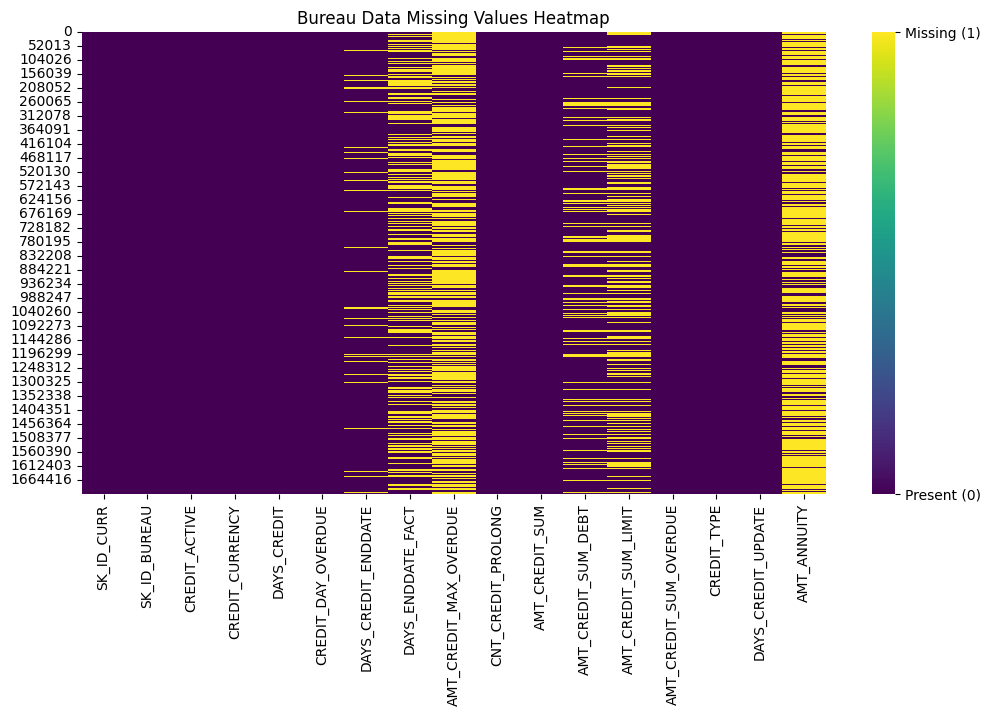

In [10]:
plt.figure(figsize=(12,6))
ax = sns.heatmap(bureau.isnull(), cbar=True, cmap="viridis", vmin=0, vmax=1)
colorbar = ax.collections[0].colorbar

colorbar.set_ticks([0, 1])
colorbar.set_ticklabels(['Present (0)', 'Missing (1)'])
plt.title("Bureau Data Missing Values Heatmap")
plt.show()

### Chi-squared test for missing values

From these charts, it is clear that the variables with the most missing values are related to the building where a client lives. In general, no patterns are seen with these missing values. Performing a chi-squared test with null values from each category compared to the TARGET variable will tell if a correlation is present or not in the training data. 

Here the **null hypothesis** is that there is no relationship between the TARGET variable and whether a value is missing or not in a given feature. 

The **alternate hypothesis** is that there is a statistically significant relationship between the TARGET variable and a feature's absence of values. 

In addition, if a relationship is found between the presence of missing values and the TARGET, an indicator column is added to a modified dataset (train_). The chi-squared tests are done at the 95% confidence level: 

In [11]:
bureau_indicator_cols = []

In [12]:
alpha = 0.05
train_ = bureau_train.copy()
for x in bureau_train.columns:
    contingency_table = pd.crosstab(bureau_train['TARGET'], bureau_train[f'{x}'].isnull())
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print('contingengy table \n', contingency_table)
    print(f"Chi-Squared Statistic: {chi2}")
    print(f"p-value: {p}")
    print(f"Degrees of Freedom: {dof}")
    if p < alpha:
        print(f"Reject the null hypothesis - There is a relationship between TARGET and missing {x} values.")
        train_[f'{x}_missing'] = train_[f'{x}'].isnull().astype(int)
        bureau_indicator_cols.append(f'{x}')
    else:
        print(f"Fail to reject the null hypothesis - There is no relationship between TARGET and missing {x} values.")
    print()


contingengy table 
 SK_ID_CURR    False
TARGET             
0           1350805
1            114520
Chi-Squared Statistic: 0.0
p-value: 1.0
Degrees of Freedom: 0
Fail to reject the null hypothesis - There is no relationship between TARGET and missing SK_ID_CURR values.

contingengy table 
 SK_ID_BUREAU    False
TARGET               
0             1350805
1              114520
Chi-Squared Statistic: 0.0
p-value: 1.0
Degrees of Freedom: 0
Fail to reject the null hypothesis - There is no relationship between TARGET and missing SK_ID_BUREAU values.

contingengy table 
 CREDIT_ACTIVE    False
TARGET                
0              1350805
1               114520
Chi-Squared Statistic: 0.0
p-value: 1.0
Degrees of Freedom: 0
Fail to reject the null hypothesis - There is no relationship between TARGET and missing CREDIT_ACTIVE values.

contingengy table 
 CREDIT_CURRENCY    False
TARGET                  
0                1350805
1                 114520
Chi-Squared Statistic: 0.0
p-value: 1.0
De

In [13]:
bureau_indicator_cols

['DAYS_CREDIT_ENDDATE',
 'DAYS_ENDDATE_FACT',
 'AMT_CREDIT_MAX_OVERDUE',
 'AMT_CREDIT_SUM_DEBT',
 'AMT_ANNUITY']

Quite a few of the variables with missing values seem to be correlated with the TARGET variable, as shown above with the bureau_indicator_cols variable. An indicator variable for these relationships is added to the train_ dataset where this relationship is present. The missing values will be analyzed in detail when looking at selected variables one by one. 

Looking at the modified training data: 

In [14]:
train_.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  ...  AMT_CREDIT_SUM_OVERDUE  \
0                     NaN                   0  ...                     0.0   
1                     NaN                   0  ...                     0.0   
2                     NaN                   0  ...                     0.0   
3                     NaN                   0  ...                     0.0   
4                 77674.5                   0  ...                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY TARGET  \
0  Consumer credit                -131          NaN      0   
1      Credit card                 -20          NaN      0   
2  Consumer credit                 -16          NaN      0   
3      Credit card                 -16          NaN      0   
4  Consumer credit                 -21          NaN      0   

   DAYS_CREDIT_ENDDATE_missing  DAYS_ENDDATE_FACT_missing  \
0                            0                          0   
1                            0                          1   
2                            0                          1   
3                            1                          1   
4                            0                          1   

   AMT_CREDIT_MAX_OVERDUE_missing  AMT_CREDIT_SUM_DEBT_missing  \
0                               1                            0   
1                               1                            0   
2                               1                            1   
3                               1                            1   
4                               0                            1   

   AMT_ANNUITY_missing  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  

[5 rows x 23 columns]

## Correlations: 

### Phi-k correlation: 

Correlations will now be examined, so as to identify important relationships with the target variable. Initially, phi-k correlation is used to look at correlation strength between variables. The loan identifier (SK_ID_CURR/BUREAU) is excluded from the phi-k correlation. First, data types are examined so as to identify interval columns: 

In [15]:
bureau_train.dtypes

SK_ID_CURR                  int64
SK_ID_BUREAU                int64
CREDIT_ACTIVE              object
CREDIT_CURRENCY            object
DAYS_CREDIT                 int64
CREDIT_DAY_OVERDUE          int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG          int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE                object
DAYS_CREDIT_UPDATE          int64
AMT_ANNUITY               float64
TARGET                      int64
dtype: object

In [16]:
phik_vars = bureau_train.drop(['SK_ID_CURR', 'SK_ID_BUREAU'], axis=1)
float_features = bureau_train.select_dtypes(include=['float64']).columns
interval_cols = float_features.union(['DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_UPDATE'])

In [17]:
phik_overview = phik_vars.phik_matrix(interval_cols=interval_cols)


Looking at correlations with the target variable: 

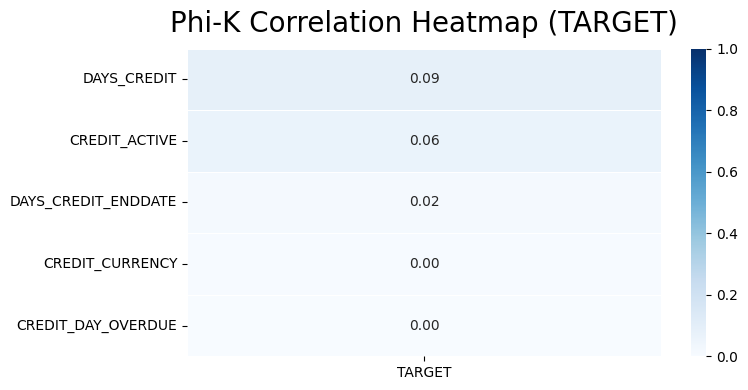

In [18]:
plt.figure(figsize=(8,4))
heatmap = sns.heatmap(phik_overview[['TARGET']].head(5).sort_values(by='TARGET', ascending=False), annot=True, cmap='Blues', vmin=0, vmax=1, cbar=True, fmt=".2f", linewidths=0.5)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=0, ha='center')
heatmap.set_title('Phi-K Correlation Heatmap (TARGET)', fontdict={'fontsize':20}, pad=12)
plt.tight_layout()
plt.show()

It seems like all variables have essentially no correlation with the target variable. Looking at a heatmap of all correlations: 

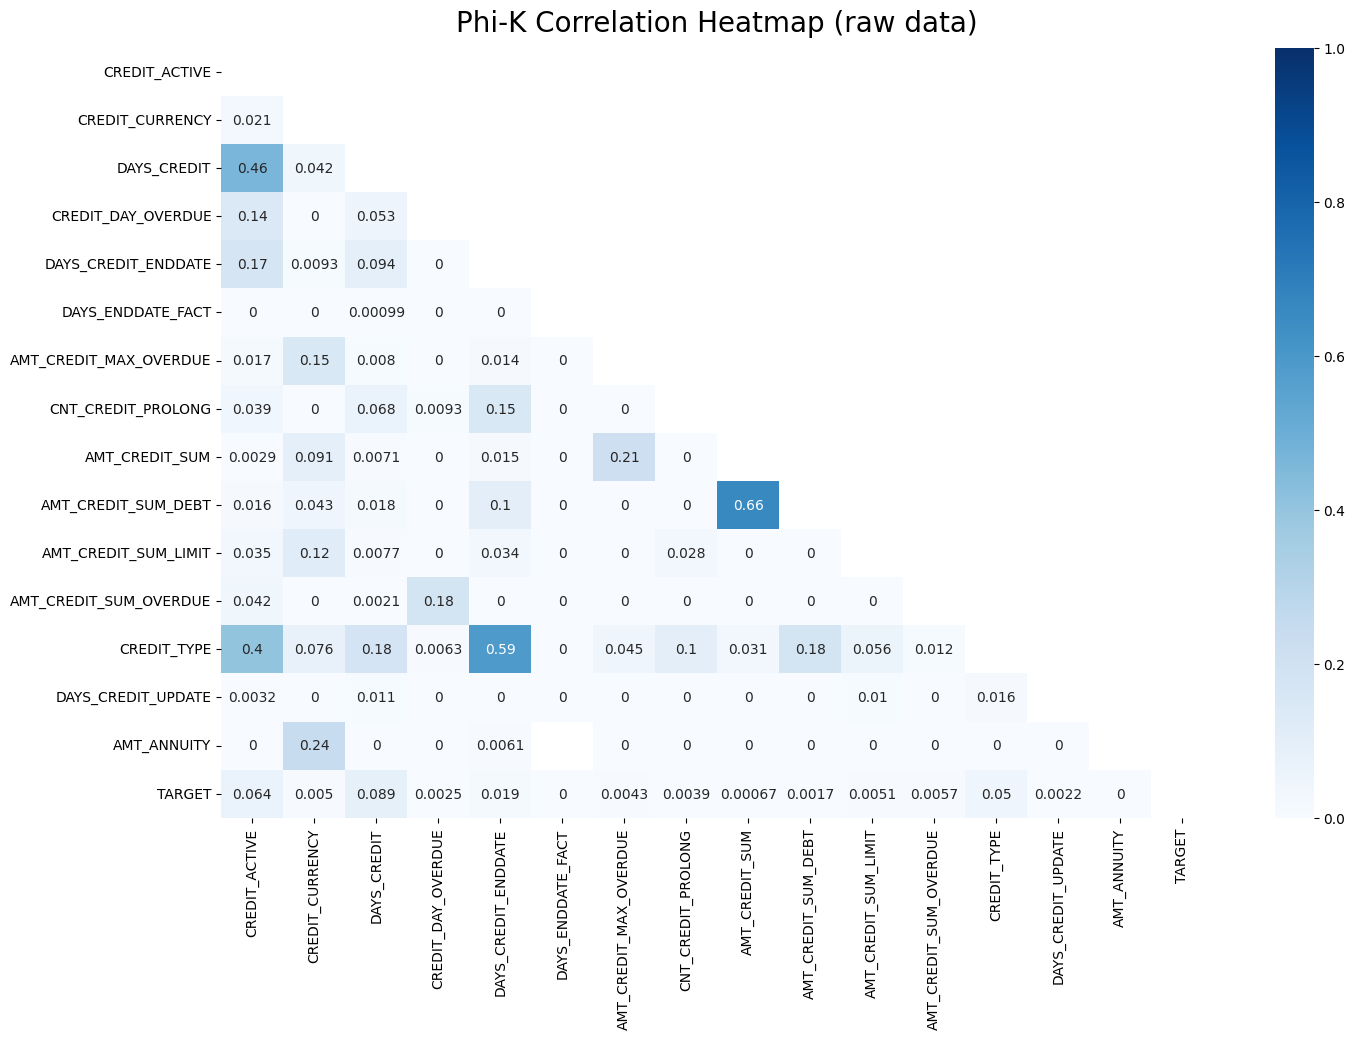

In [19]:
plt.figure(figsize=(16,10))
mask = np.triu(np.ones_like(phik_overview, dtype=bool))
heatmap = sns.heatmap(phik_overview, annot=True, mask=mask, cmap='Blues', vmin=0, vmax=1)
heatmap.set_title('Phi-K Correlation Heatmap (raw data)', fontdict={'fontsize':20}, pad=12)
plt.show()

Four correlations with coefficients over 0.4 are seen here: 

- Credit_type and credit_active 
- credit_active and days_credit
- days_credit_enddate and credit_type
- amt_credit_sum_debt and amt_credit_sum

### Spearman correlations: 

For numerical features, it is possible to look at strength and direction of the correlations. As nothing is known yet about feature distributions, Spearman correlation is used.

In [20]:
spearman_corr = bureau_train.drop(['SK_ID_CURR', 'SK_ID_BUREAU'], axis=1).corr(method='spearman', numeric_only=True)

Looking at correlations with the target variable: 

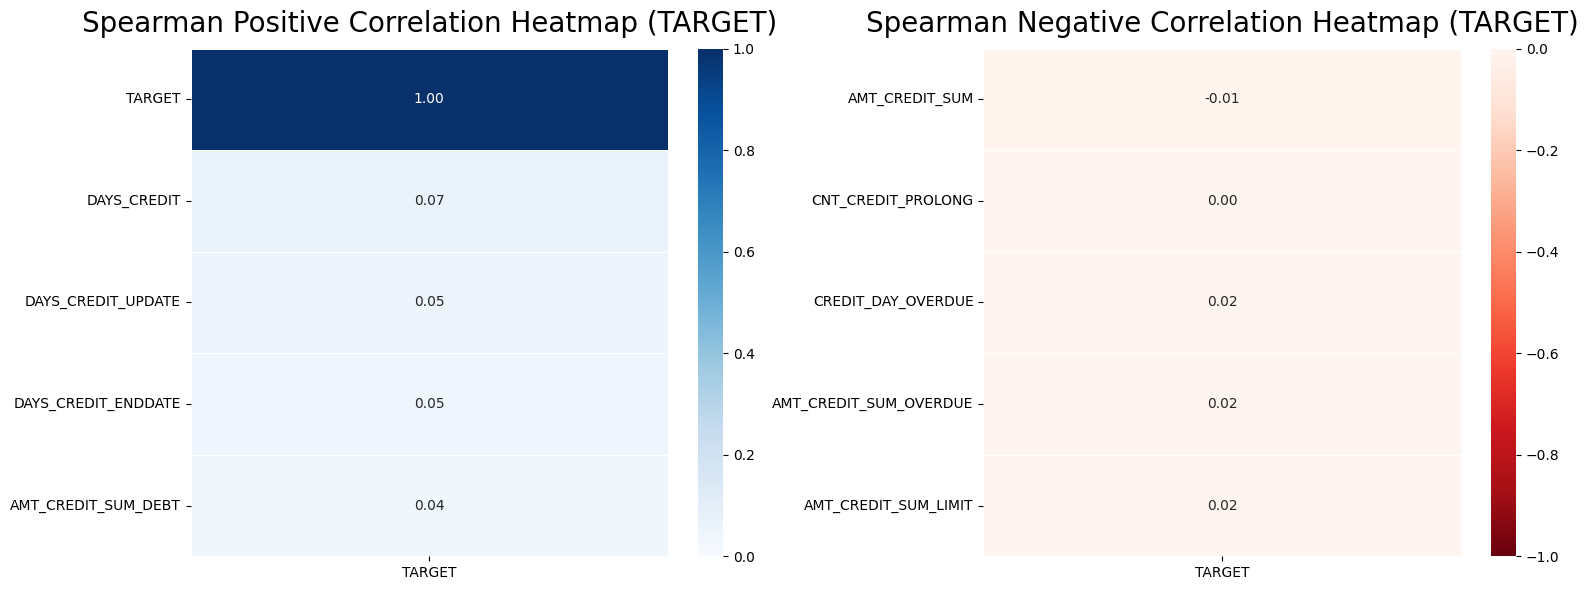

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

heatmap = sns.heatmap(spearman_corr[['TARGET']].sort_values(by='TARGET', ascending=False).head(5), annot=True, cmap='Blues', vmin=0, vmax=1, cbar=True, fmt=".2f", linewidths=0.5, ax=ax[0])
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=0, ha='center')
heatmap.set_title('Spearman Positive Correlation Heatmap (TARGET)', fontdict={'fontsize':20}, pad=12)

heatmap = sns.heatmap(spearman_corr[['TARGET']].sort_values(by='TARGET', ascending=True).head(5), annot=True, cmap='Reds_r', vmin=-1, vmax=0, cbar=True, fmt=".2f", linewidths=0.5, ax=ax[1])
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=0, ha='center')
heatmap.set_title('Spearman Negative Correlation Heatmap (TARGET)', fontdict={'fontsize':20}, pad=12)
plt.tight_layout()
plt.show()

Again, no correlations are seen between the target and any other variables. Looking at correlations between variables: 

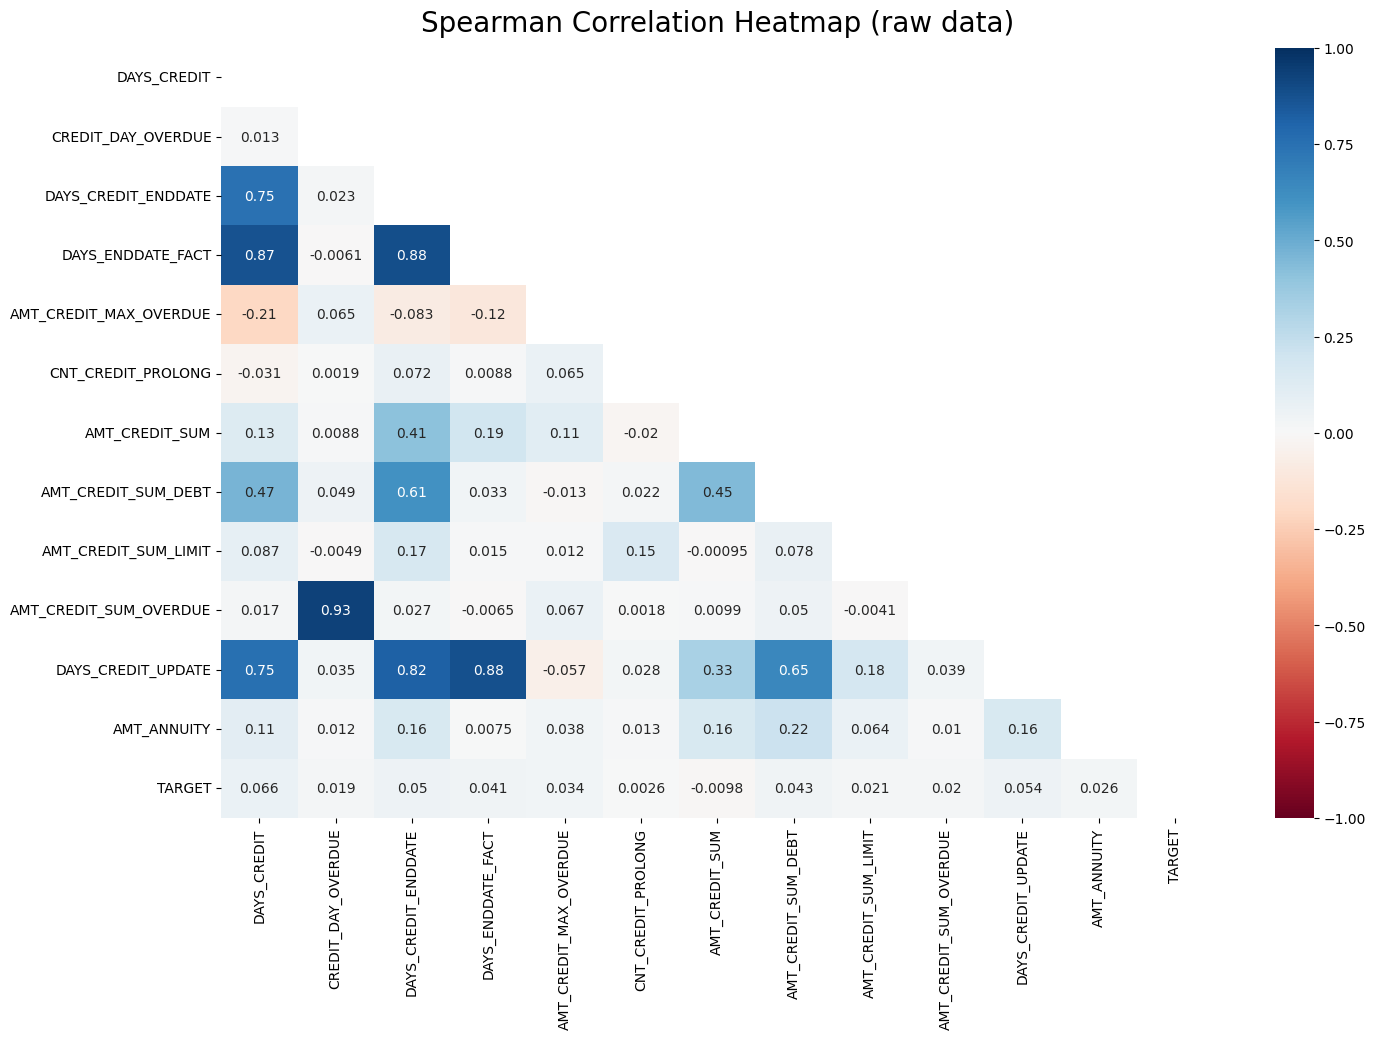

In [22]:
plt.figure(figsize=(16,10))
mask = np.triu(np.ones_like(spearman_corr, dtype=bool))
heatmap = sns.heatmap(spearman_corr, annot=True, mask=mask, cmap='RdBu', vmin=-1, vmax=1)
heatmap.set_title('Spearman Correlation Heatmap (raw data)', fontdict={'fontsize':20}, pad=12)
plt.show()

Strong positive correlations are seen between: 
- DAYS_CREDIT and DAYS_CREDIT_UPDATE (0.75), DAYS_CREDIT_ENDDATE (0.75), and DAYS_ENDDATE_FACT (0.87), 
- DAYS_CREDIT_UPDATE and DAYS_CREDIT_ENDDATE (0.82), and DAYS_ENDDATE_FACT (0.88), 
- CREDIT_DAY_OVERDUE and AMT_CREDIT_SUM_OVERDUE (0.93), 
- DAYS_CREDIT_ENDDATE and DAYS_ENDDATE_FACT (0.88), and 
- DAYS_ENDDATE_FACT and DAYS_CREDIT_UPDATE. 

These features could be combined to see if they increase a model's accuracy during feature engineering. 

## Explore_variables

Now, bureau variables can be explored one by one. All numerical variables are examined, and the categorical credit_active and credit_type variables are plotted. 

### Categorical features:

Credit_active variable: 

Exploring CREDIT_ACTIVE
No missing values


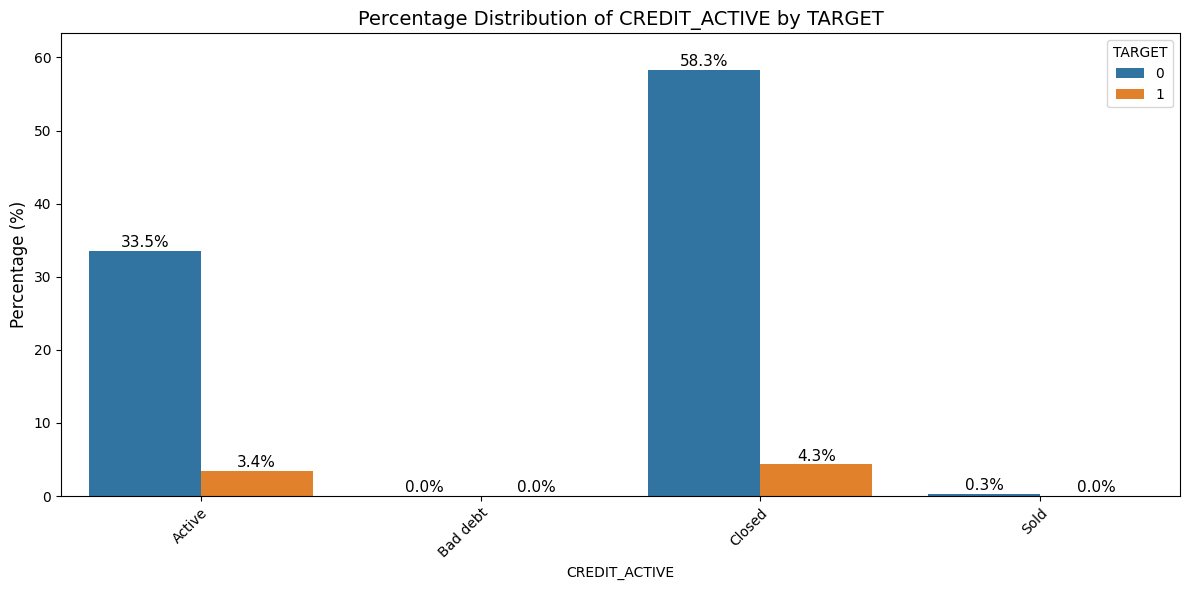

In [23]:
explore_category('CREDIT_ACTIVE', missing_bureau, bureau_train)

Customers generally have active or closed credit bureau credit. 

Exploring CREDIT_TYPE
No missing values


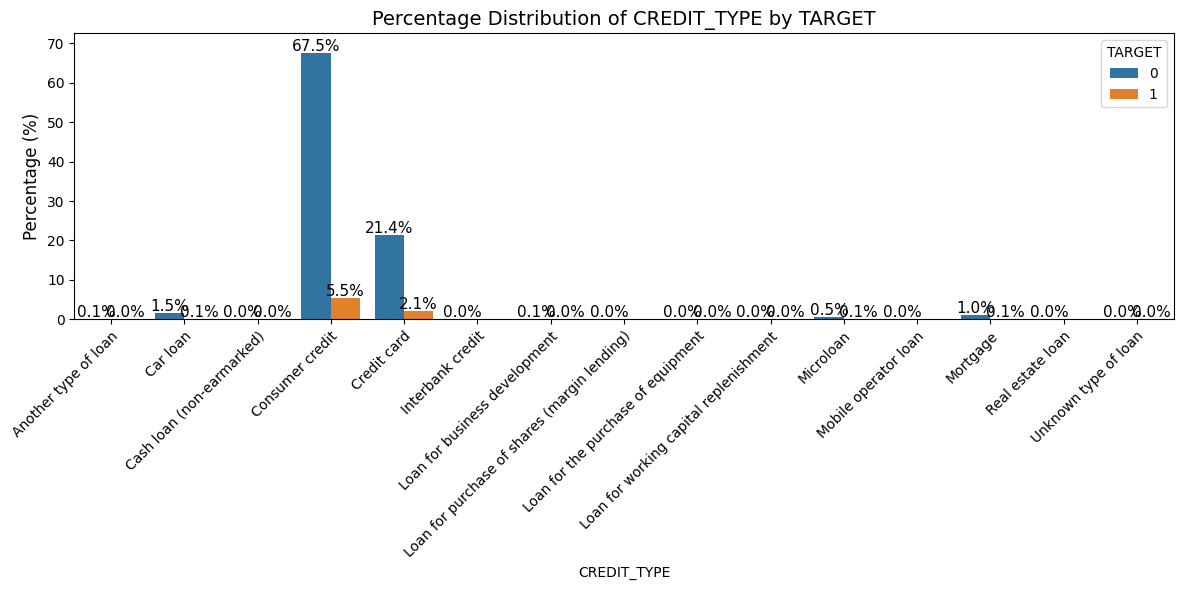

In [24]:
explore_category('CREDIT_TYPE', missing_bureau, bureau_train)

The credit_type categories can be grouped together for better visualization: 

In [25]:
group_map = {
    'Another type of loan': 'Other',
    'Interbank credit': 'Other',
    'Mobile operator loan': 'Other',
    'Loan for purchase of shares (marginal lending)': 'Other',
    'Loan for the purchase of equipment': 'Other',
    'Cash loan (non-earmarked)': 'Other',
    'Real estate loan': 'Other',
    'Loan for working capital replenishment': 'Other',
    'Unknown type of loan': 'Other',
    'Another type of loan': 'Other',
    'Loan for business development ': 'Loan for business development',
    'Microloan': 'Microloan',
    'Mortgage': 'Mortgage',
    'Car loan': 'Car loan',
    'Credit card': 'Credit card',
    'Consumer credit': 'Consumer credit'
}
    
bureau_train['CREDIT_TYPE_GROUPED'] = bureau_train['CREDIT_TYPE'].map(group_map)

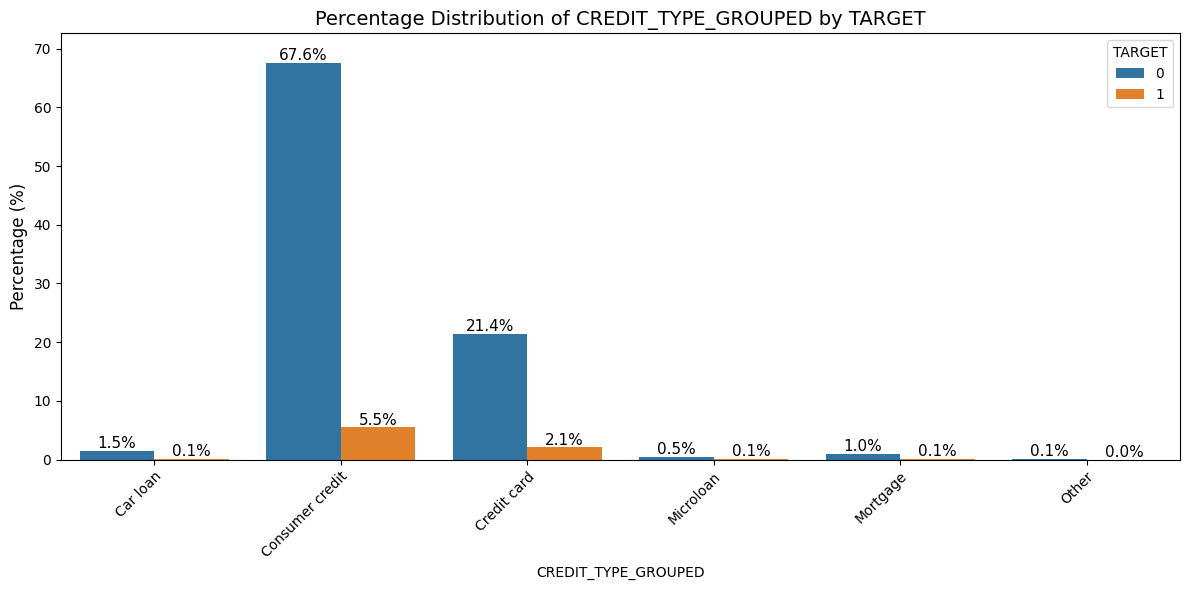

In [26]:
plot_category(bureau_train, 'CREDIT_TYPE_GROUPED')

Most customers have consumer credit or a credit card. 

### Numerical features: 

Now, looking at the days_credit variable: 

Exploring DAYS_CREDIT
No missing values


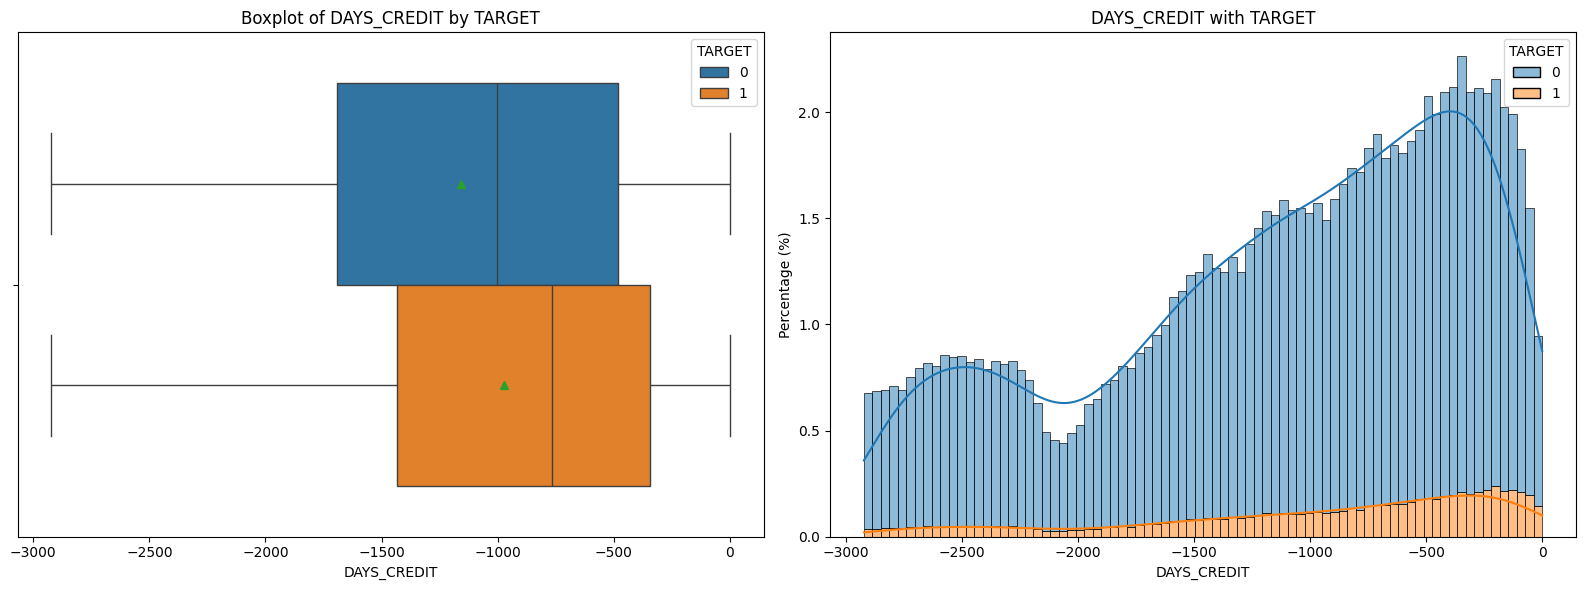

In [27]:
explore_numerical('DAYS_CREDIT', missing_bureau, bureau_train)

This distribution seems to be bimodal, and steadily increasing until 0. It seems that customers are more likely to default when they applied for a credit bureau credit close to their Home Credit application. 

#### Looking at days_credit_update: 

Exploring DAYS_CREDIT_UPDATE
No missing values


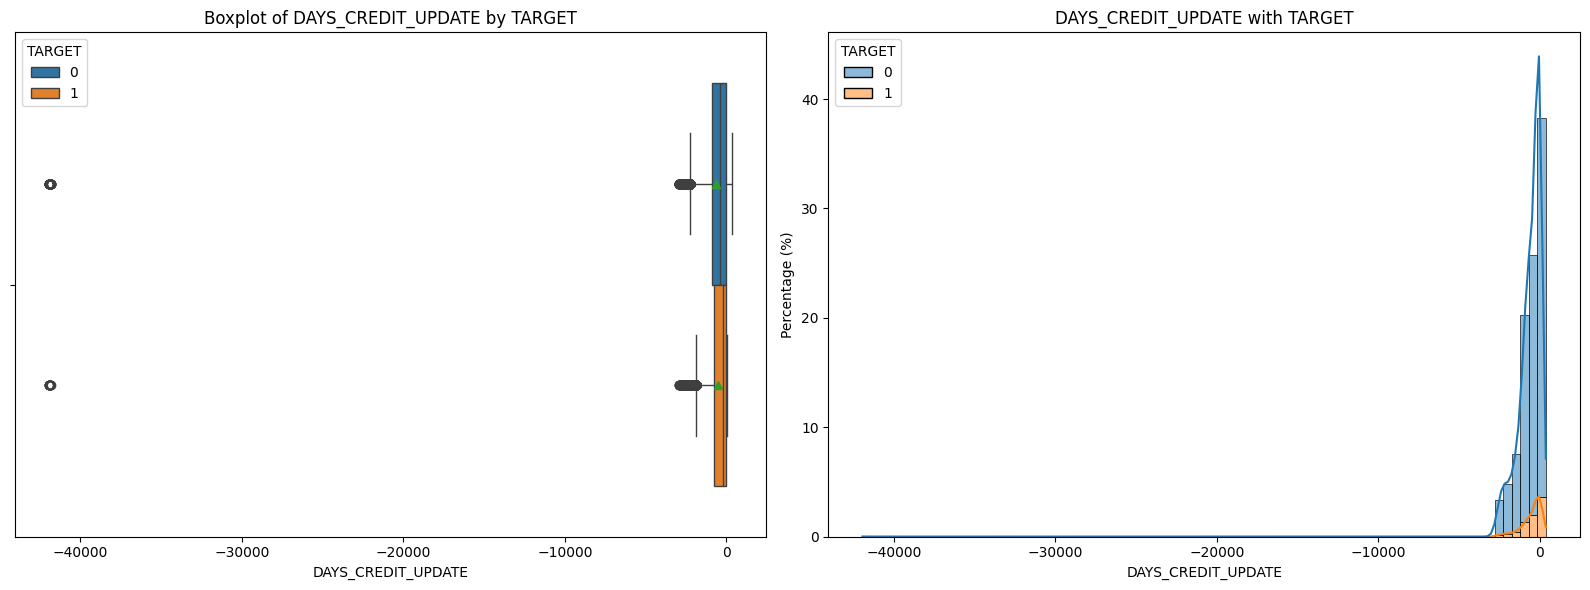

In [28]:
explore_numerical('DAYS_CREDIT_UPDATE', missing_bureau, bureau_train)

Clipping these outliers results in: 

In [29]:
upper_limit = bureau_train['DAYS_CREDIT_UPDATE'].quantile(0.01)
bureau_train['DAYS_CREDIT_UPDATE'] = bureau_train['DAYS_CREDIT_UPDATE'].clip(lower=upper_limit)


Exploring DAYS_CREDIT_UPDATE
No missing values


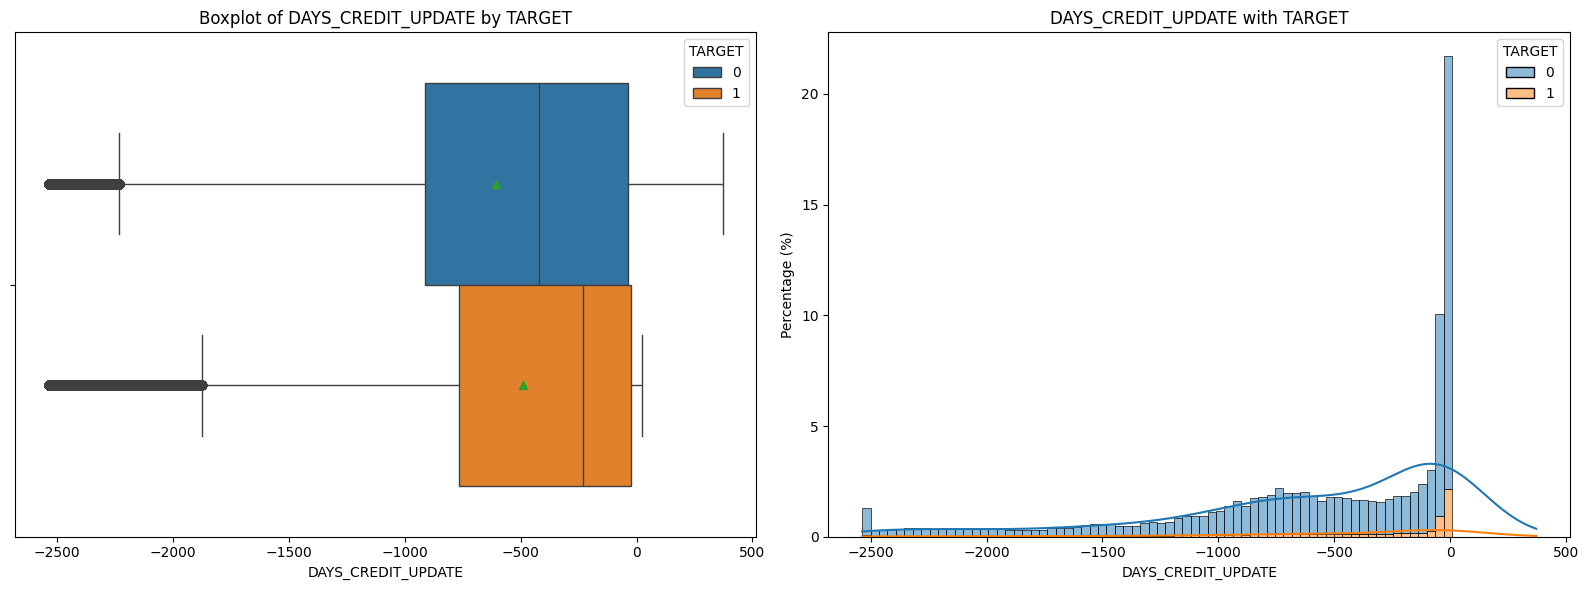

In [30]:
explore_numerical('DAYS_CREDIT_UPDATE', missing_bureau, bureau_train)

It seems like most credit bureau information came in the same day as a customer applied for a Home Credit loan. The distribution for defaulters seems more concentrated closer to a customer's Home Credit application date. 

#### Looking at the credit_day_overdue variable next: 

Exploring CREDIT_DAY_OVERDUE
No missing values


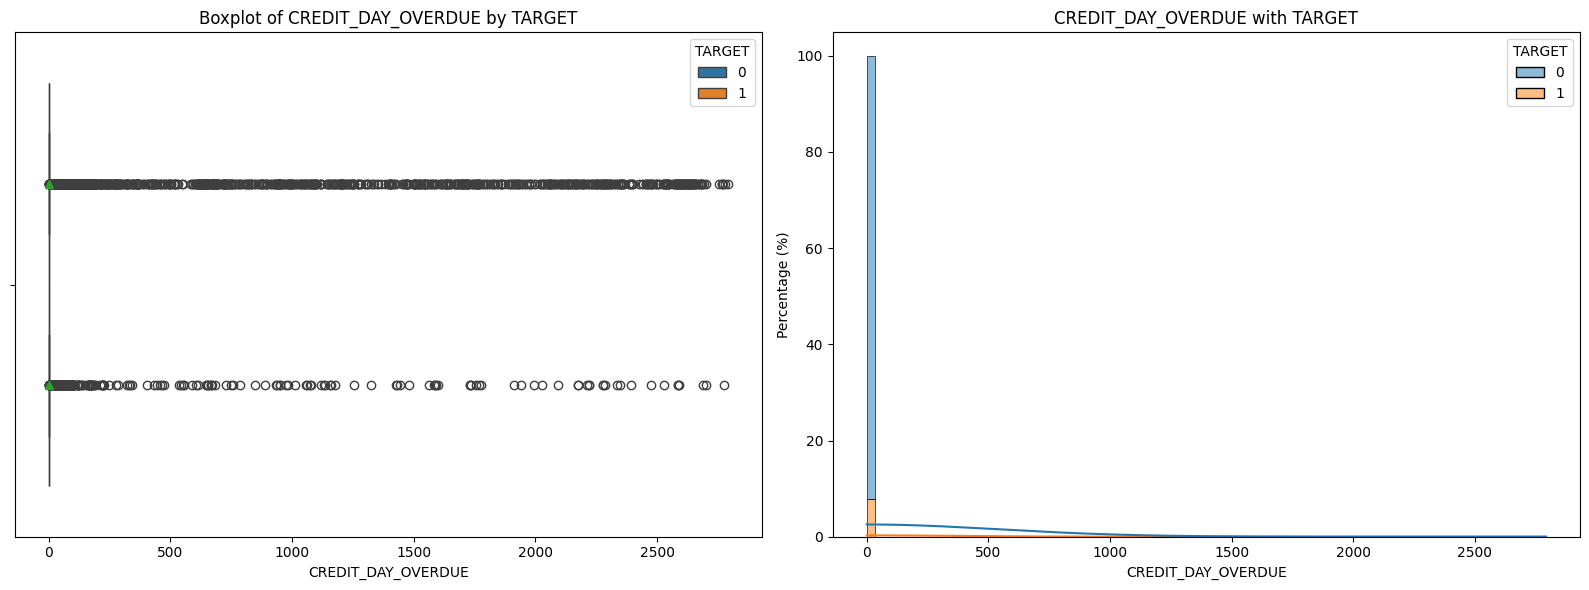

In [31]:
explore_numerical('CREDIT_DAY_OVERDUE', missing_bureau, bureau_train)

Most customers have zero days past due on their credit bureau credit when they apply for Home Credit. This could be transformed into an indicator variable: 

Exploring CREDIT_DAY_OVERDUE_NONZERO
No missing values


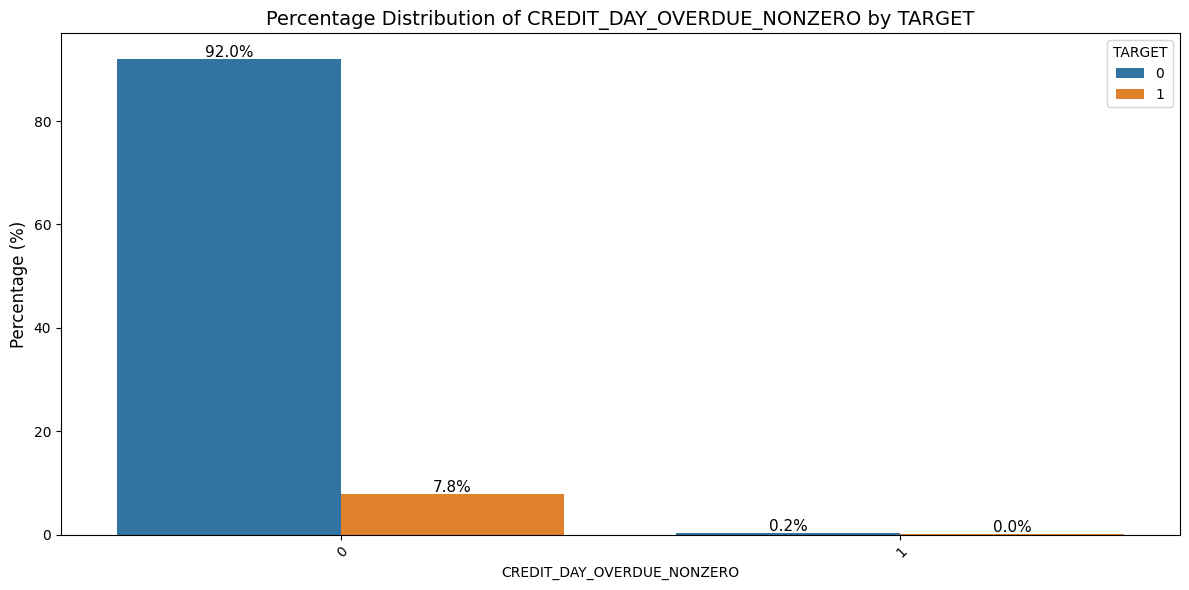

In [32]:
bureau_train['CREDIT_DAY_OVERDUE_NONZERO'] = (bureau_train['CREDIT_DAY_OVERDUE'] > 0).astype(int)
explore_category('CREDIT_DAY_OVERDUE_NONZERO', missing_bureau, bureau_train)

Only 0.2% of customers have any days past due on their Credit Bureau at the time of application.

#### Looking at the days_credit_enddate variable: 

Exploring DAYS_CREDIT_ENDDATE
Missing number        105553.000000
Missing percentage         6.149573
Name: DAYS_CREDIT_ENDDATE, dtype: float64 



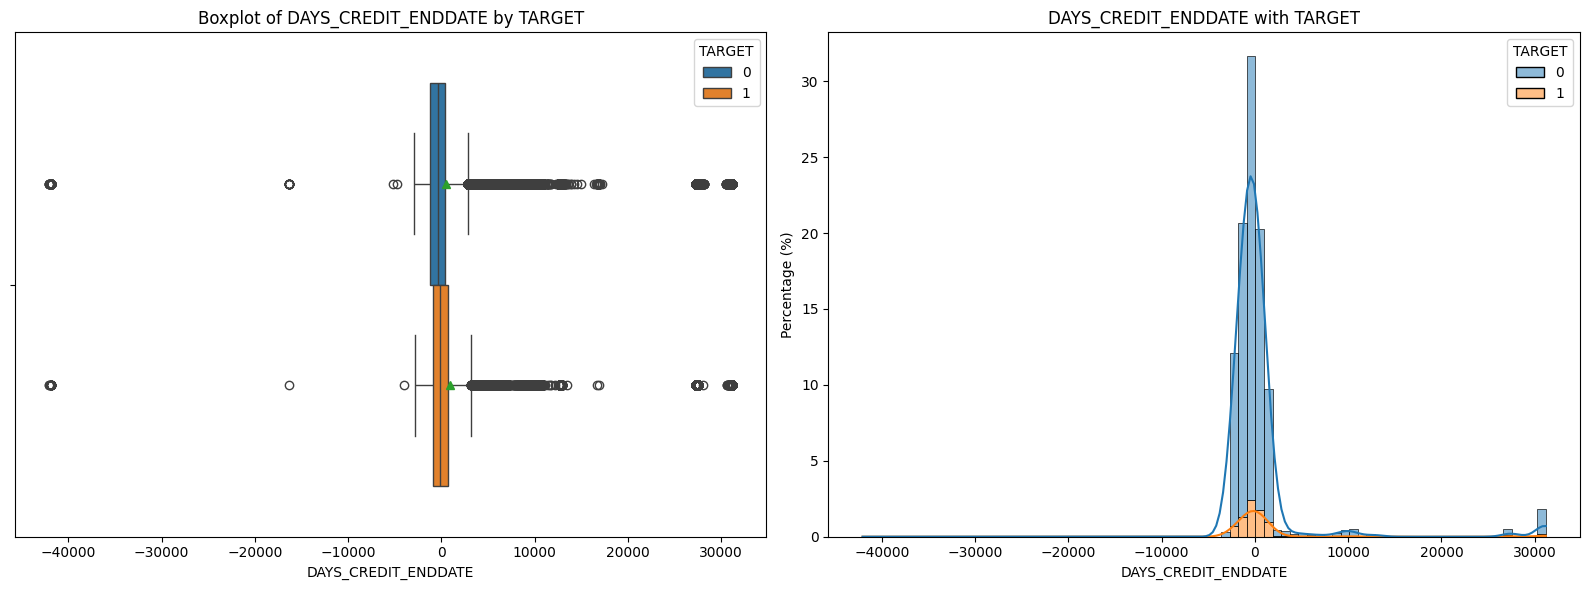

In [33]:
explore_numerical('DAYS_CREDIT_ENDDATE', missing_bureau, bureau_train)

No difference is seen here between defaulters and non-defaulting customers with Home Credit. Quite a few outliers are present in this variable, and the presence of positive variables indicates that these customers have active Credit Bureau loans when they apply for credit with Home Credit.

#### Looking at the amt_credit_max_overdue variable: 

Exploring AMT_CREDIT_MAX_OVERDUE
Missing number        1.124488e+06
Missing percentage    6.551326e+01
Name: AMT_CREDIT_MAX_OVERDUE, dtype: float64 



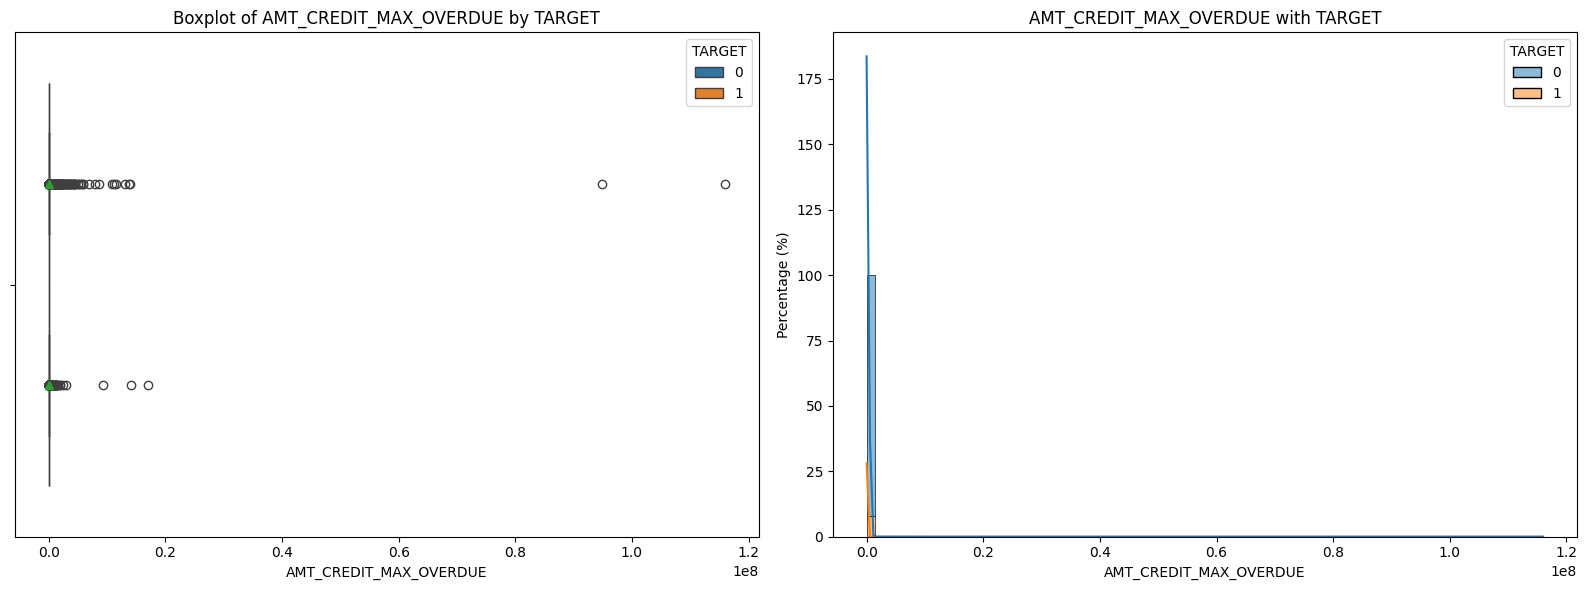

In [34]:
explore_numerical('AMT_CREDIT_MAX_OVERDUE', missing_bureau, bureau_train)

A couple extreme outliers are present in this variable, which can be clipped to look at the distribution: 

In [35]:
upper_limit = bureau_train['AMT_CREDIT_MAX_OVERDUE'].quantile(0.99)
bureau_train['AMT_CREDIT_MAX_OVERDUE'] = bureau_train['AMT_CREDIT_MAX_OVERDUE'].clip(upper=upper_limit)

Exploring AMT_CREDIT_MAX_OVERDUE
Missing number        1.124488e+06
Missing percentage    6.551326e+01
Name: AMT_CREDIT_MAX_OVERDUE, dtype: float64 



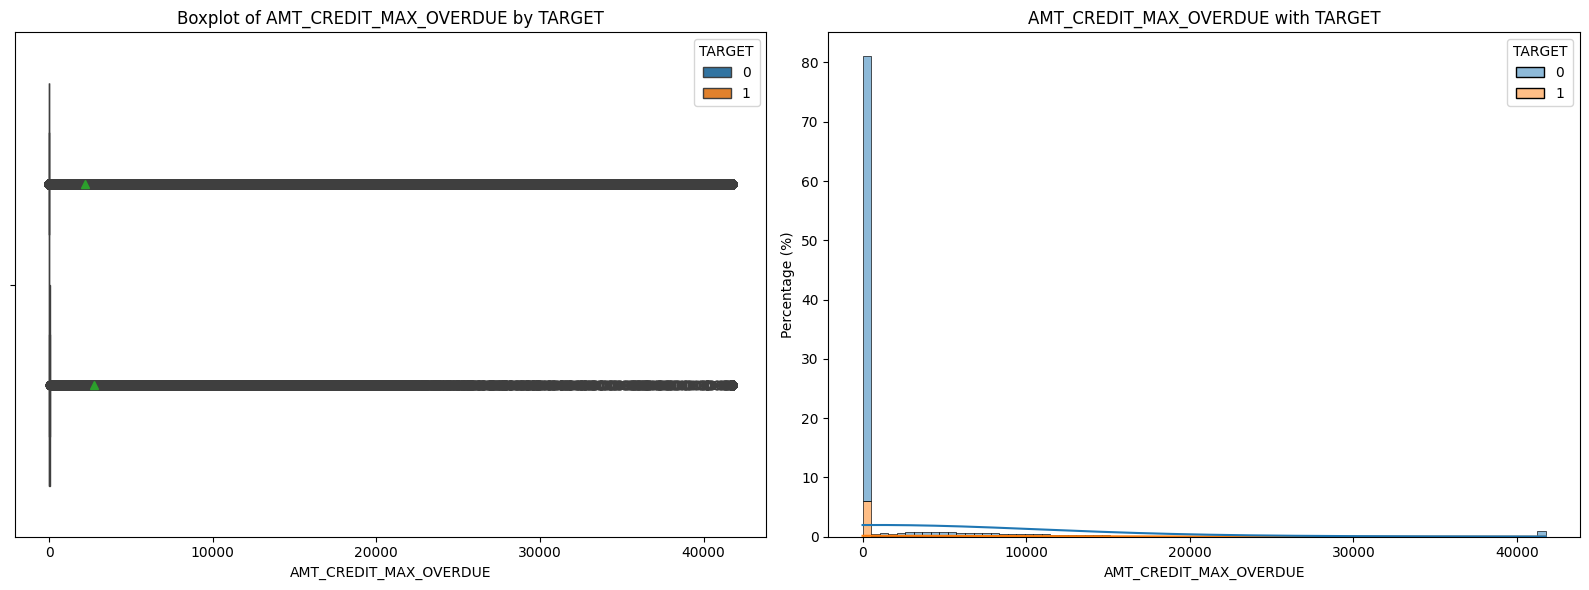

In [36]:
explore_numerical('AMT_CREDIT_MAX_OVERDUE', missing_bureau, bureau_train)

Most people do not have any amount overdue on the Credit bureau, though there are many outliers. This variable could be transformed into an indicator variable: 

Exploring AMT_CREDIT_MAX_OVERDUE_NONZERO
No missing values


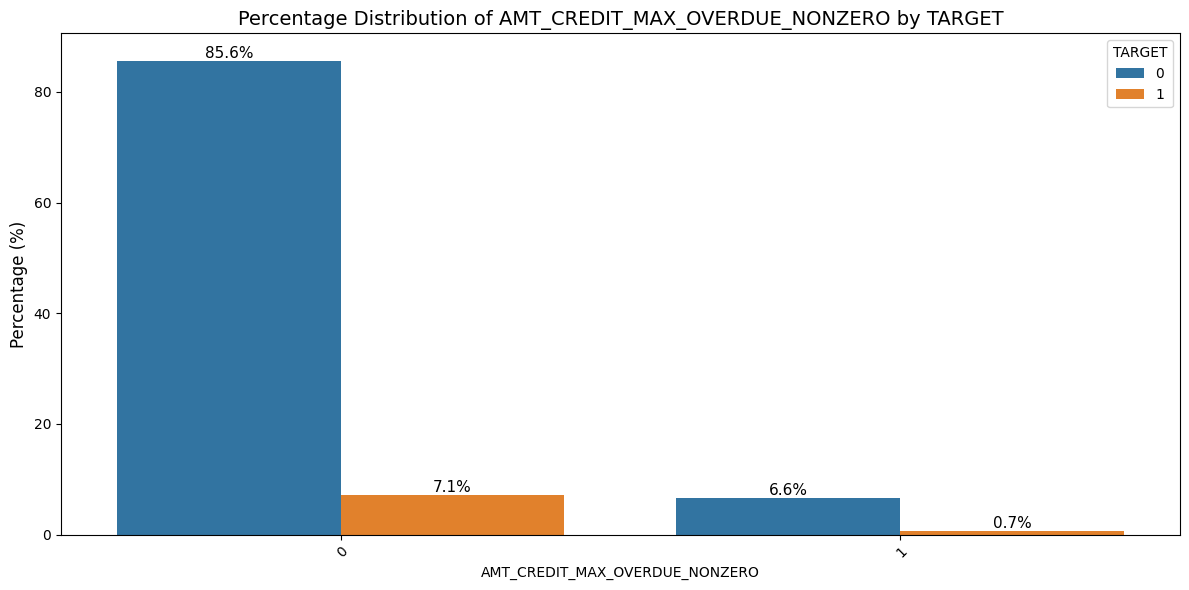

In [37]:
bureau_train['AMT_CREDIT_MAX_OVERDUE_NONZERO'] = (bureau_train['AMT_CREDIT_MAX_OVERDUE'] > 0).astype(int)
explore_category('AMT_CREDIT_MAX_OVERDUE_NONZERO', missing_bureau, bureau_train)

#### Looking at the amt_credit_sum variable: 

Exploring AMT_CREDIT_SUM
Missing number        13.000000
Missing percentage     0.000757
Name: AMT_CREDIT_SUM, dtype: float64 



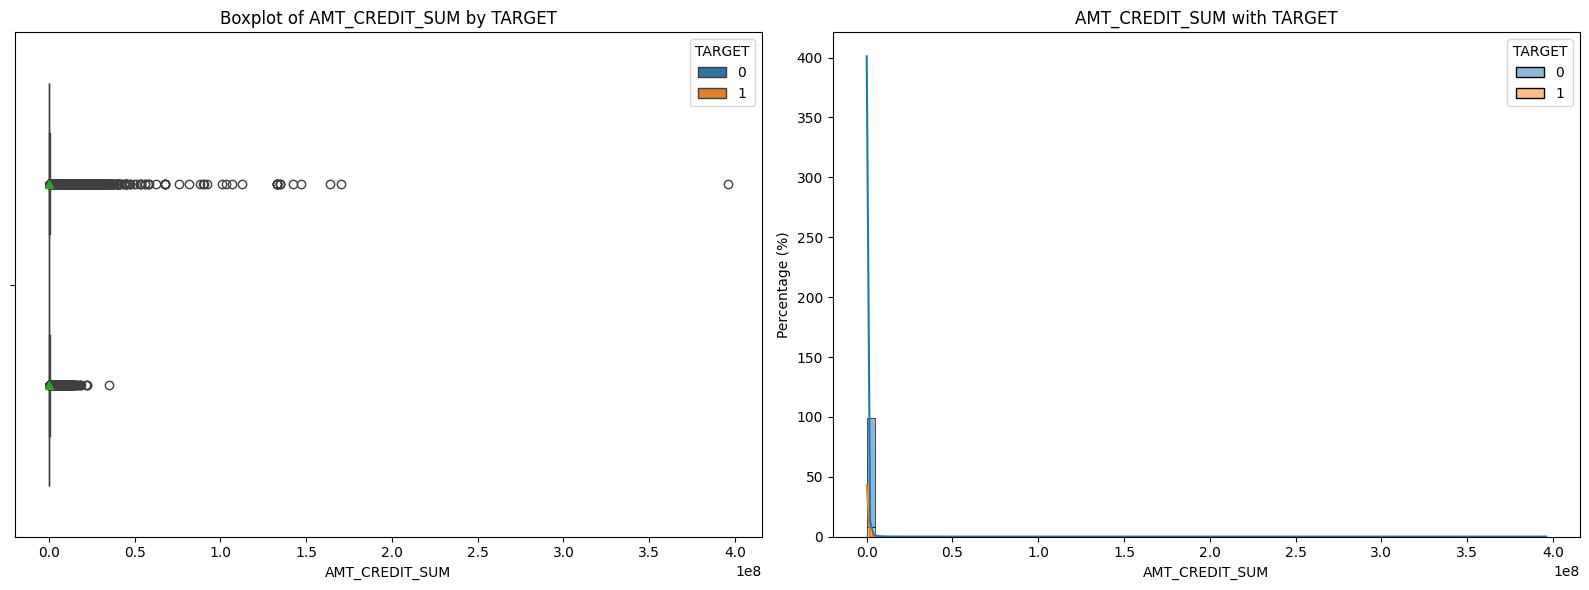

In [38]:
explore_numerical('AMT_CREDIT_SUM', missing_bureau, bureau_train)

The outlier present here could also be clipped: 

In [39]:
upper_limit = bureau_train['AMT_CREDIT_SUM'].quantile(0.999)
bureau_train['AMT_CREDIT_SUM'] = bureau_train['AMT_CREDIT_SUM'].clip(upper=upper_limit)

Exploring AMT_CREDIT_SUM
Missing number        13.000000
Missing percentage     0.000757
Name: AMT_CREDIT_SUM, dtype: float64 



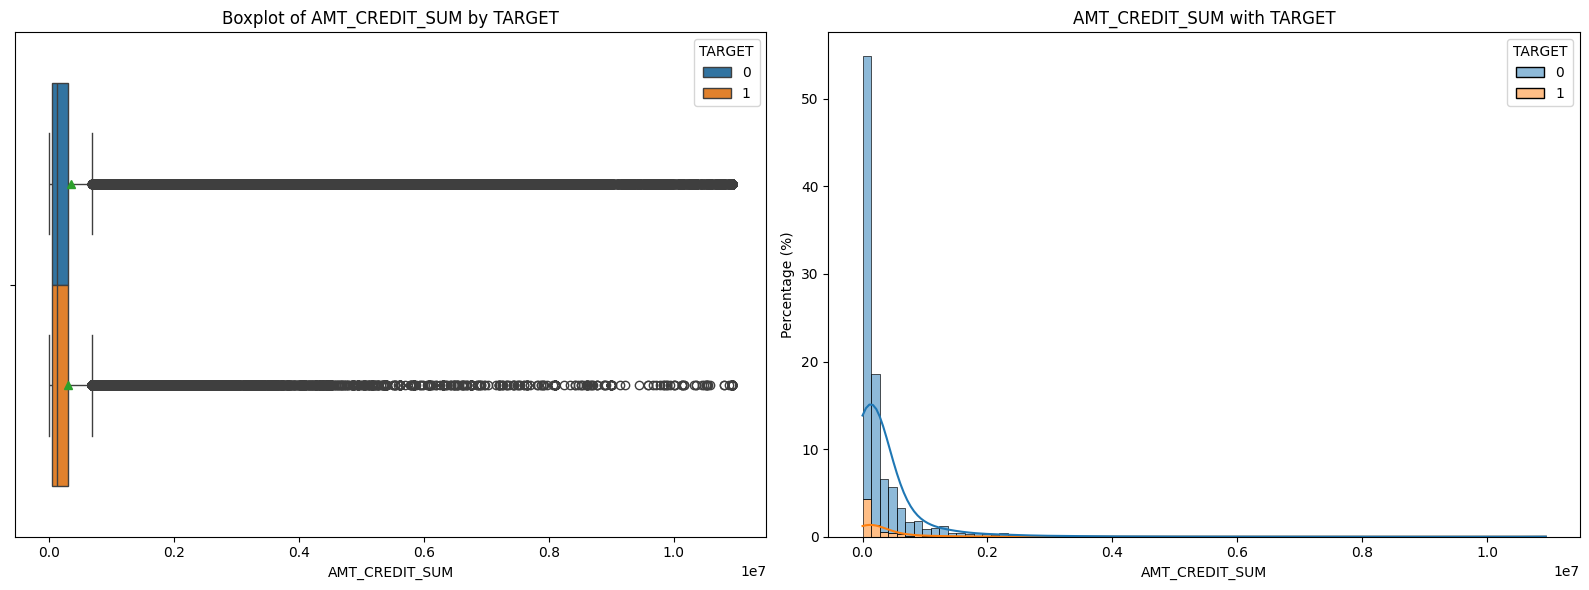

In [40]:
explore_numerical('AMT_CREDIT_SUM', missing_bureau, bureau_train)

This distribution has a long right tail, and could be a good candidate for a log transformation: 

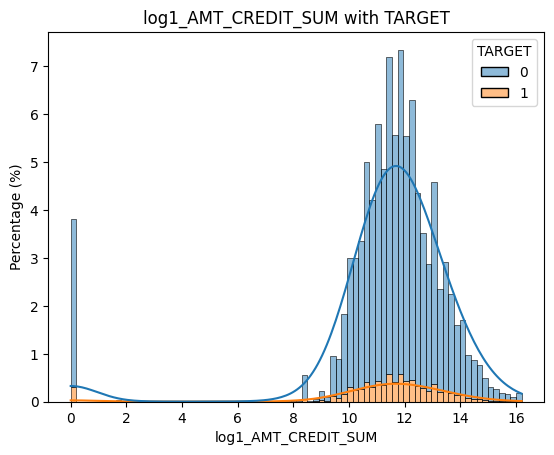

In [41]:
bureau_train['log1_AMT_CREDIT_SUM'] = np.log1p(bureau_train['AMT_CREDIT_SUM'])
plot_numerical(bureau_train, 'log1_AMT_CREDIT_SUM', 80, plt.gca(), 'log1_AMT_CREDIT_SUM')

No difference is seen here between target distributions for current credit bureau credit amount. 

#### Looking at the amt_credit_sum_debt variable: 

Exploring AMT_CREDIT_SUM_DEBT
Missing number        257669.000000
Missing percentage        15.011932
Name: AMT_CREDIT_SUM_DEBT, dtype: float64 



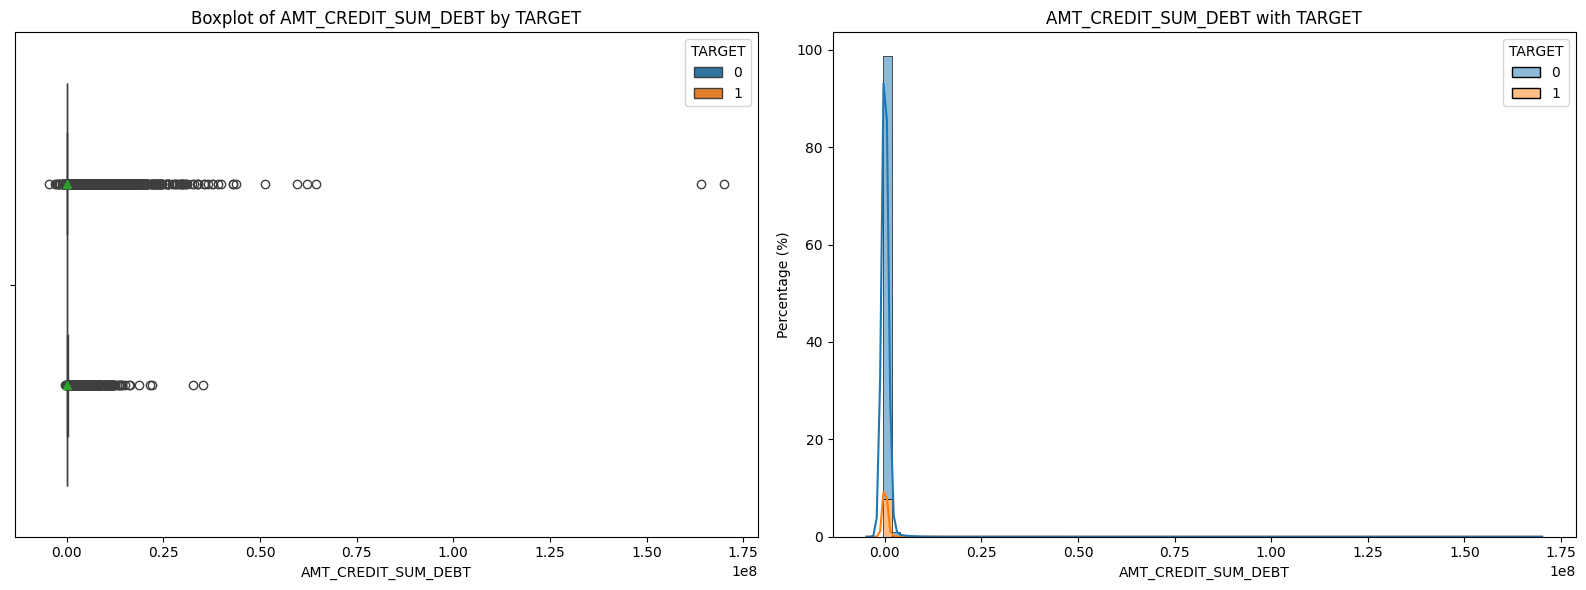

In [42]:
explore_numerical('AMT_CREDIT_SUM_DEBT', missing_bureau, bureau_train)

Most customers do not have any Credit Bureau debt, and another indicator variable can be added to the dataset: 

Exploring AMT_CREDIT_SUM_DEBT_OVER_ZERO
No missing values


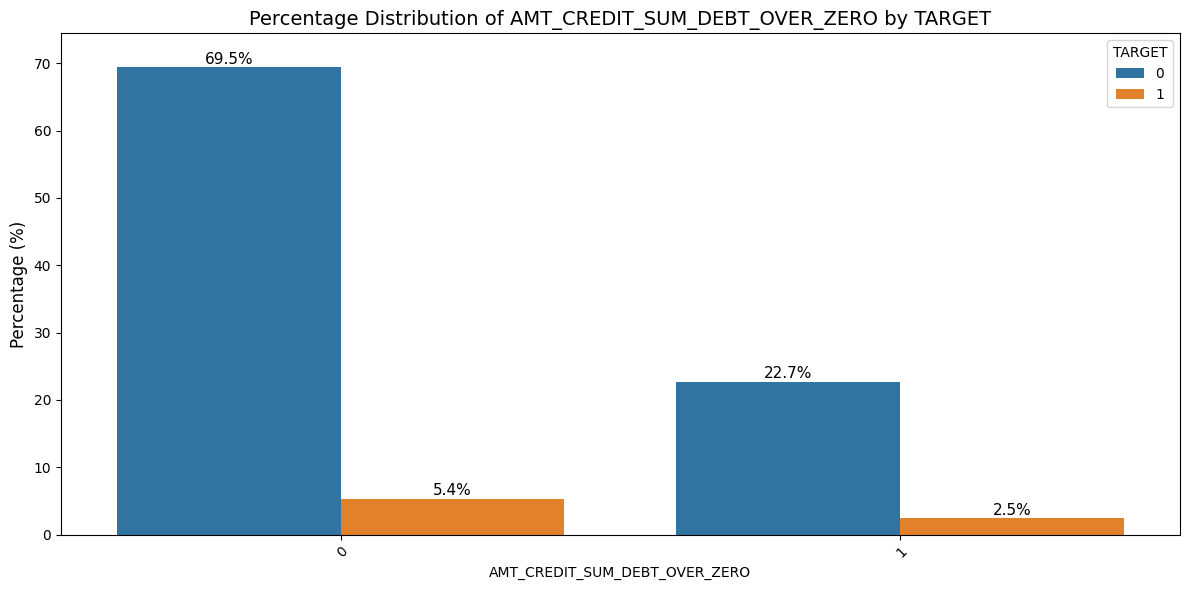

In [43]:
bureau_train['AMT_CREDIT_SUM_DEBT_OVER_ZERO'] = (bureau_train['AMT_CREDIT_SUM_DEBT'] > 0).astype(int)
explore_category('AMT_CREDIT_SUM_DEBT_OVER_ZERO', missing_bureau, bureau_train)


Here, it seems that people with Credit Bureau debt at the time of their Home Credit loan application could have a higher default rate. 

#### Looking at the amt_credit_sum_limit variable next: 

Exploring AMT_CREDIT_SUM_LIMIT
Missing number        591780.000000
Missing percentage        34.477415
Name: AMT_CREDIT_SUM_LIMIT, dtype: float64 



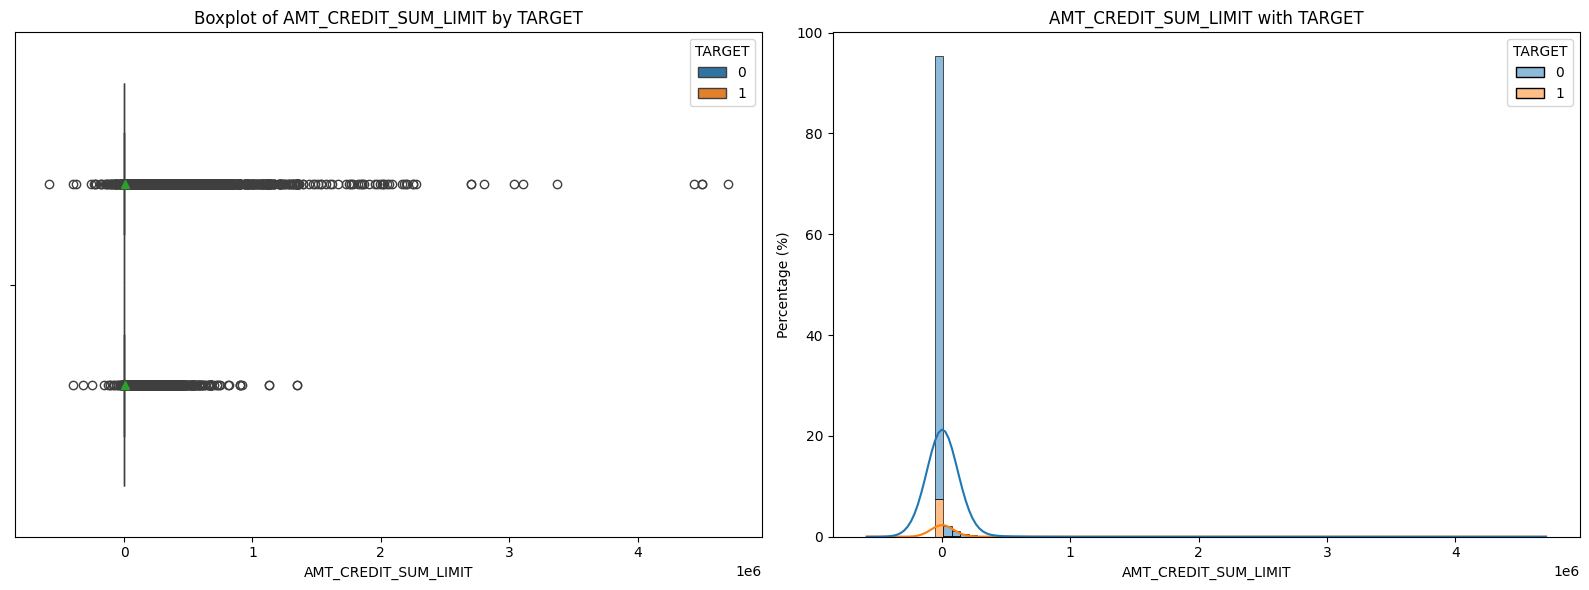

In [44]:
explore_numerical('AMT_CREDIT_SUM_LIMIT', missing_bureau, bureau_train)

Following a similar trend as to the previous numerical variables, adding an indicator variable when the creidt limit is over zero could be helpful: 

Exploring AMT_CREDIT_SUM_LIMIT_OVER_ZERO
No missing values


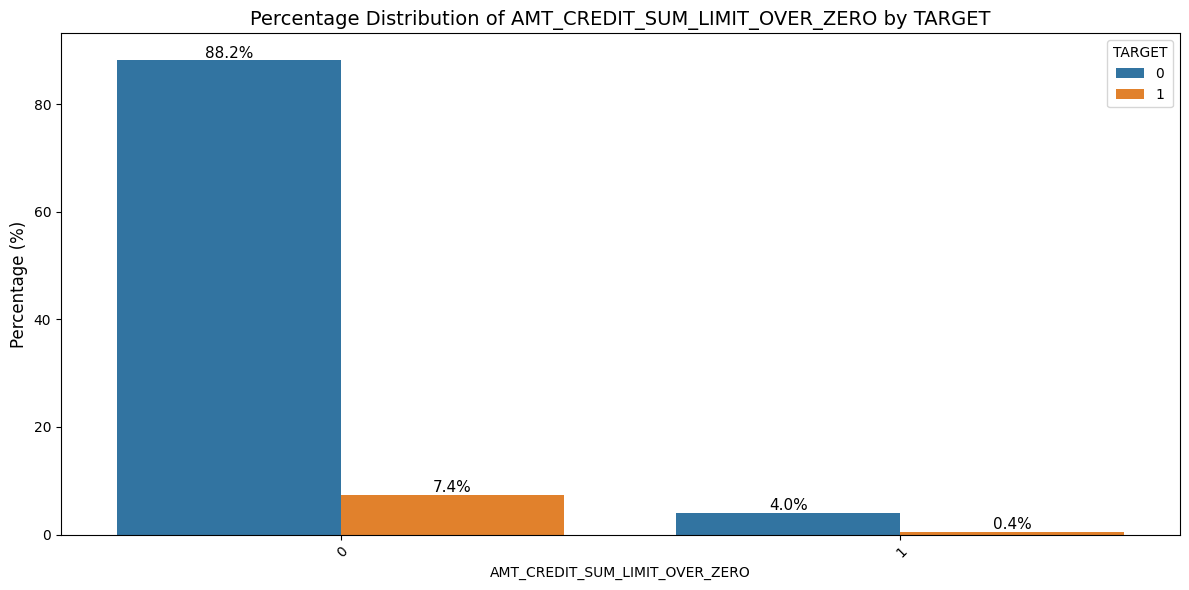

In [45]:
bureau_train['AMT_CREDIT_SUM_LIMIT_OVER_ZERO'] = (bureau_train['AMT_CREDIT_SUM_LIMIT'] > 0).astype(int)
explore_category('AMT_CREDIT_SUM_LIMIT_OVER_ZERO', missing_bureau, bureau_train)


Less than 5% of customers have a credit limit for credit bureau credit.

#### Looking at the amt_credit_sum_overdue variable: 

Exploring AMT_CREDIT_SUM_OVERDUE
No missing values


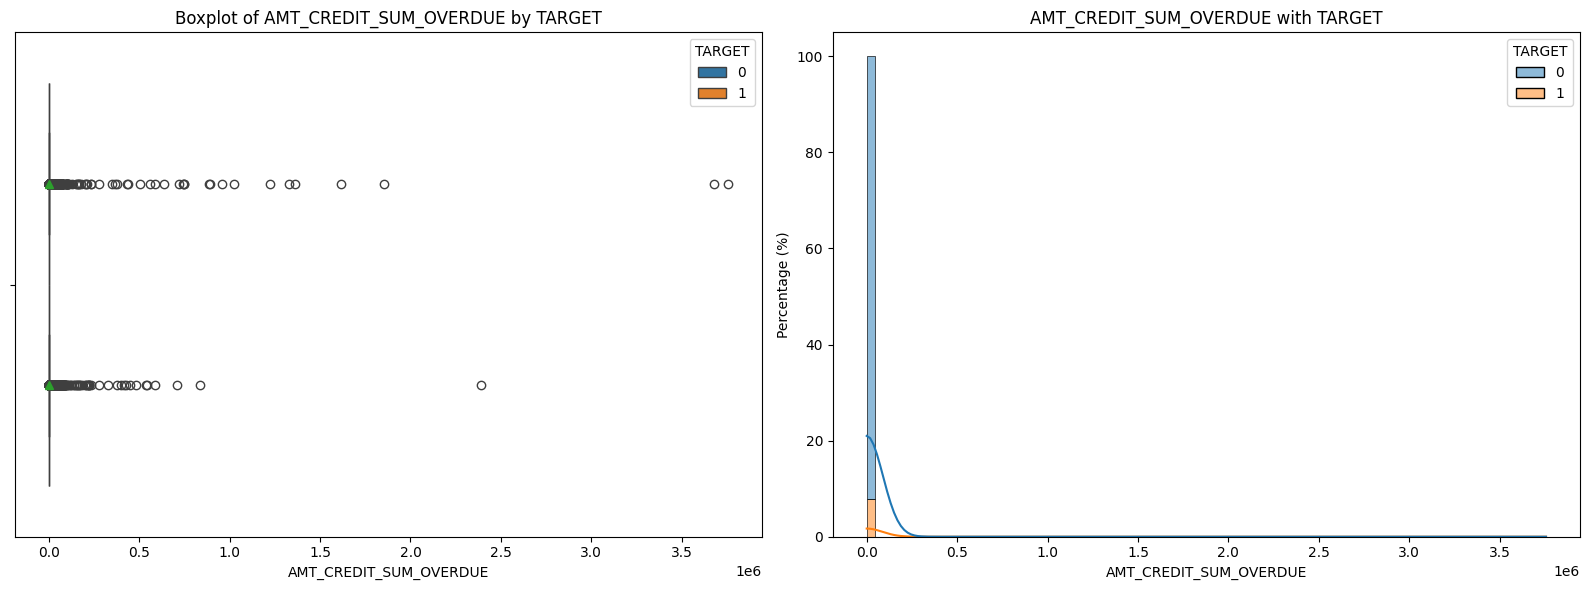

In [46]:
explore_numerical('AMT_CREDIT_SUM_OVERDUE', missing_bureau, bureau_train)

As a binary variable: 

Exploring AMT_CREDIT_SUM_OVERDUE_OVER_ZERO
No missing values


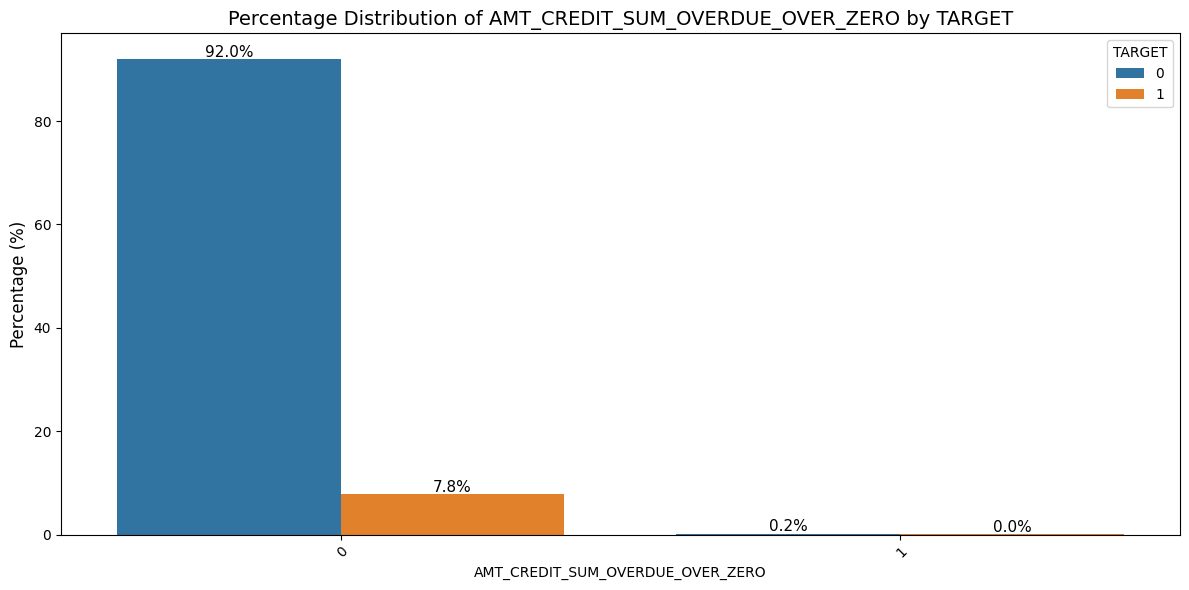

In [47]:
bureau_train['AMT_CREDIT_SUM_OVERDUE_OVER_ZERO'] = (bureau_train['AMT_CREDIT_SUM_OVERDUE'] > 0).astype(int)
explore_category('AMT_CREDIT_SUM_OVERDUE_OVER_ZERO', missing_bureau, bureau_train)


Barely any customers have an amount overdue on their Credit Bureau credit.

#### Looking at amt_annuity: 

Exploring AMT_ANNUITY
Missing number        1.226791e+06
Missing percentage    7.147349e+01
Name: AMT_ANNUITY, dtype: float64 



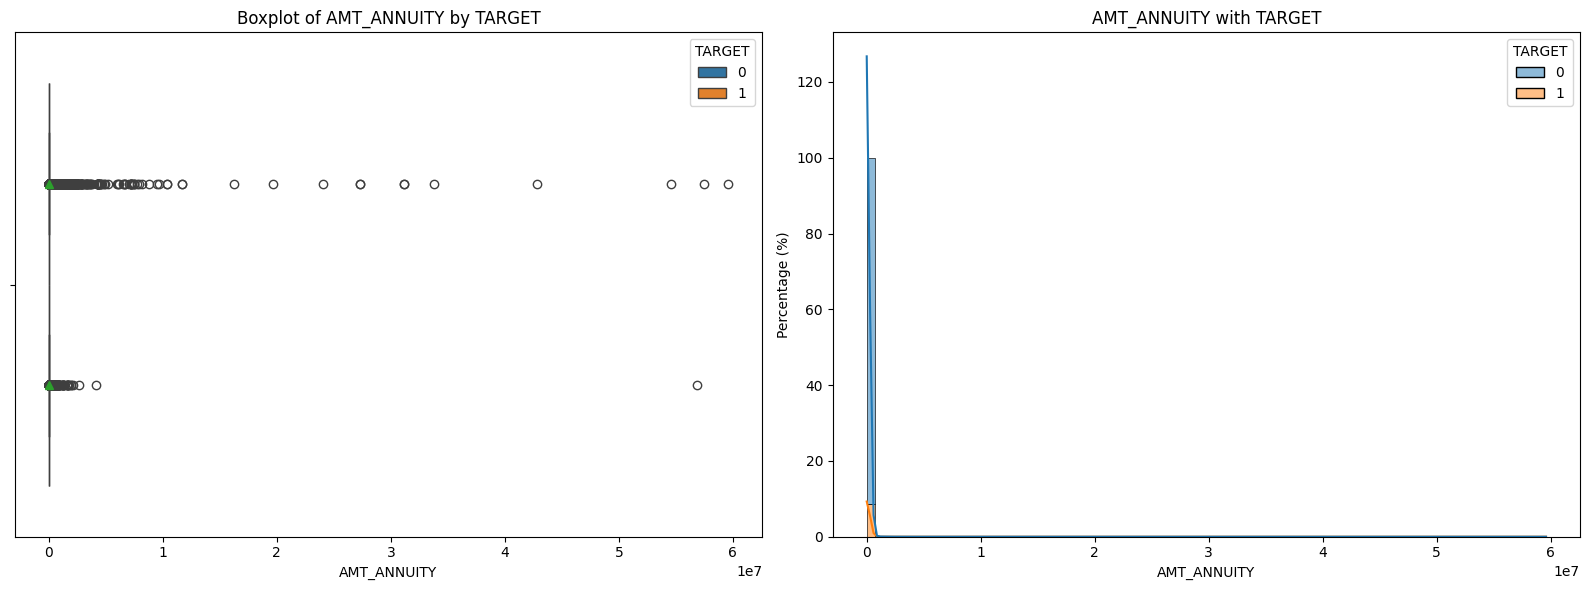

In [48]:
explore_numerical('AMT_ANNUITY', missing_bureau, bureau_train)

As a binary variable: 

Exploring AMT_ANNUITY_OVER_ZERO
No missing values


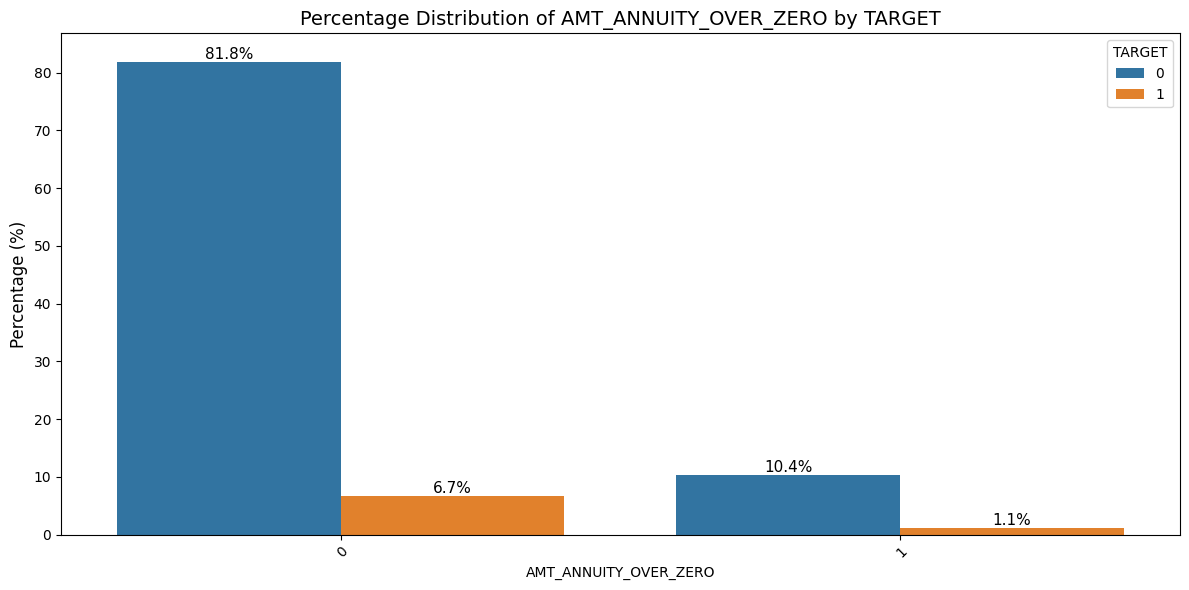

In [49]:
bureau_train['AMT_ANNUITY_OVER_ZERO'] = (bureau_train['AMT_ANNUITY'] > 0).astype(int)
explore_category('AMT_ANNUITY_OVER_ZERO', missing_bureau, bureau_train)


Most customers do not have credit bureau credit at the time of their Home Credit application, and therefore also have no annuity. 

# Bureau_balance

## Exploring bureau_balance table

This table shows information from the Credit Bureau regarding client's previous monthly credit balances. 

In [ ]:
bureau_balance = pd.read_csv('../tables/bureau_balance.csv', sep=',')
bureau_balance.head()

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

Adding in the target variable: 

In [51]:
target_train_bureau = bureau_train[['SK_ID_BUREAU', 'TARGET']].copy()
target_train_bureau.head()

SK_ID_BUREAU  TARGET
0       5714462       0
1       5714463       0
2       5714464       0
3       5714465       0
4       5714466       0

In [52]:
bureau_balance_train = bureau_balance.merge(target_train_bureau, on='SK_ID_BUREAU', how='inner')


In [53]:
bureau_balance_train.head()

SK_ID_BUREAU  MONTHS_BALANCE STATUS  TARGET
0       5715448               0      C       0
1       5715448              -1      C       0
2       5715448              -2      C       0
3       5715448              -3      C       0
4       5715448              -4      C       0

Looking at the basic information about this table: 

In [54]:
print_df_info(bureau_balance)

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None

Size of dataframe (rows, columns): (27299925, 3)


This table has about 27 million entries with 3 features. Of these features, 2 of them are of type int64, and 1 of them is of type object. 

### Duplicate values

In [55]:
print('Duplicated rows in bureau_balance:', bureau_balance.duplicated(keep=False).sum())
print('Duplicated ID_BUREAU in bureau_balance:', bureau_balance.duplicated(subset=['SK_ID_BUREAU']).sum())
print('Number of duplicate values present in bureau data excluding ID:', bureau_balance.drop(['SK_ID_BUREAU'], axis=1).duplicated(keep=False).sum())


Duplicated rows in bureau_balance: 0
Duplicated ID_BUREAU in bureau_balance: 26482530
Number of duplicate values present in bureau data excluding ID: 27299925


Many duplicate ID_BUREAU values are present here, because each credit reported to the Credit Bureau has multiple monthly balance statements associated with it. 

In [56]:
bureau_balance['MONTHS_BALANCE'].value_counts().sort_index(ascending=False).head(12)

MONTHS_BALANCE
 0     610965
-1     622601
-2     619243
-3     615080
-4     609138
-5     602663
-6     594277
-7     583794
-8     573566
-9     563804
-10    554414
-11    545221
Name: count, dtype: int64

In [57]:
bureau_balance['STATUS'].value_counts().sort_index(ascending=False).head(12)

STATUS
X     5810482
C    13646993
5       62406
4        5847
3        8924
2       23419
1      242347
0     7499507
Name: count, dtype: int64

This is a table with only three features. When the ID column is excluded, there are 12 possible values for the MONTHS_BALANCE column, as this represents a month, and 8 possible values for the STATUS feature (this is a binned variable indicating the status of the loan during a given month). Therefore, logically, many rows are repeated excluding the ID column. 

Looking at these duplicated rows gives: 

In [58]:
bureau_balance_features = bureau_balance.drop(['SK_ID_BUREAU'], axis=1)
add_dup_counts(bureau_balance_features)

MONTHS_BALANCE STATUS   count
766              -1      C  346806
774               0      C  345675
758              -2      C  341451
750              -3      C  336307
742              -4      C  331156
..              ...    ...     ...
20              -94      4      34
692             -10      4      33
12              -95      4      30
596             -22      4      27
4               -96      4      27

[776 rows x 3 columns]

The above dataframe shows a list of duplicate rows in the bureau_balance table with the number of times each row is present. A lot of recent month balances are duplicated with status C, which means that the loan in the Credit Bureau has been closed.

These duplicate values (not considering the ID column) will be kept, as it is probable that multiple customers have this same set of two features in a dataset this large.

### Missing values:

Now, missing values can be examined: 

In [59]:
missing_bureau_balance, no_missing_bureau_balance = get_missing_df_info(bureau_balance)
missing_bureau_balance

Empty strings: (array([], dtype=int64), array([], dtype=int64))
XNA strings: (array([], dtype=int64), array([], dtype=int64))
Percentage of total rows with missing values: 0.0


Empty DataFrame
Columns: [Missing number, Missing percentage]
Index: []

It seems that there are not missing values in this table.

Just to check, looking at the missing values heatmap gives: 

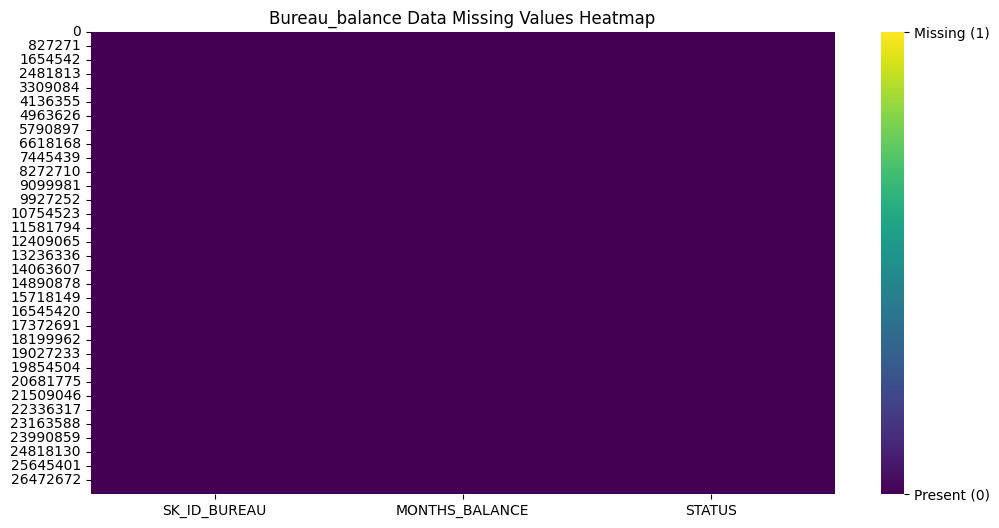

In [60]:
plt.figure(figsize=(12,6))
ax = sns.heatmap(bureau_balance.isnull(), cbar=True, cmap="viridis", vmin=0, vmax=1)
colorbar = ax.collections[0].colorbar

colorbar.set_ticks([0, 1])
colorbar.set_ticklabels(['Present (0)', 'Missing (1)'])
plt.title("Bureau_balance Data Missing Values Heatmap")
plt.show()

Indeed, no missing values are present in this table.

## Phi-k correlation: 

First, data types are examined so as to identify interval columns: 

In [61]:
bureau_balance_train.dtypes

SK_ID_BUREAU       int64
MONTHS_BALANCE     int64
STATUS            object
TARGET             int64
dtype: object

In [62]:
phik_vars = bureau_balance_train.drop(['SK_ID_BUREAU'], axis=1)

In [63]:
float_features = bureau_balance_train.select_dtypes(include=['float64']).columns
interval_cols = float_features.union(['MONTHS_BALANCE'])

In [64]:
phik_overview = phik_vars.phik_matrix(interval_cols=interval_cols)


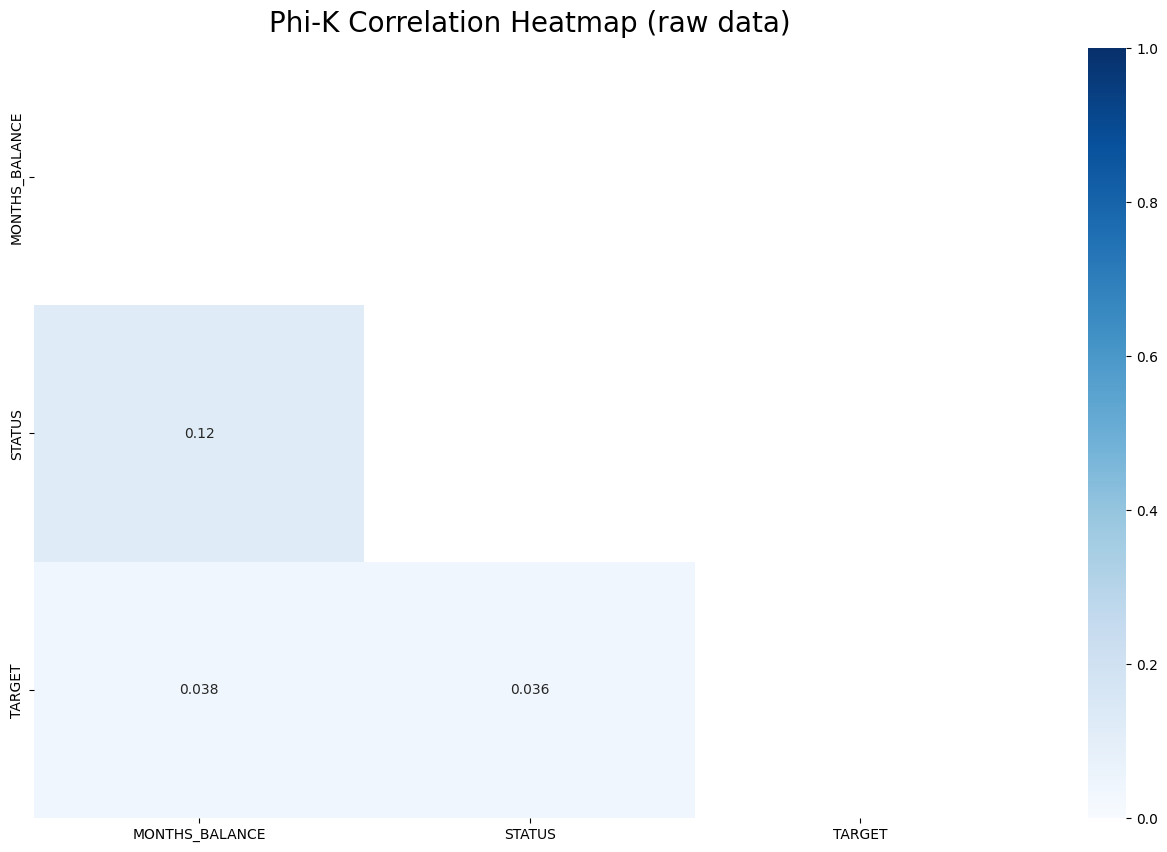

In [65]:
plt.figure(figsize=(16,10))
mask = np.triu(np.ones_like(phik_overview, dtype=bool))
heatmap = sns.heatmap(phik_overview, annot=True, mask=mask, cmap='Blues', vmin=0, vmax=1)
heatmap.set_title('Phi-K Correlation Heatmap (raw data)', fontdict={'fontsize':20}, pad=12)
plt.show()

It seems like all variables have essentially no correlation with the target variable or with each other. 

## Explore variables: 

Now, individual variables can be explored: 

Exploring STATUS
No missing values


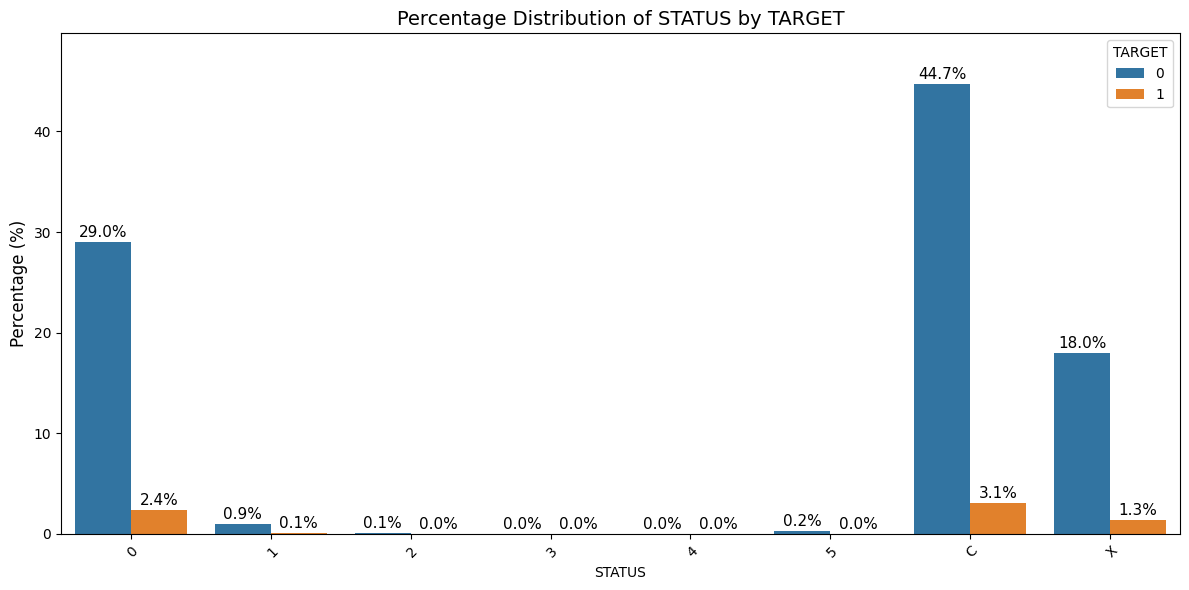

In [66]:
explore_category('STATUS', missing_bureau_balance, bureau_balance_train)

Most Credit Bureau statusses do not have any days past due, are closed, or unknown. 

Looking at the months_balance variable: 

Exploring MONTHS_BALANCE
No missing values


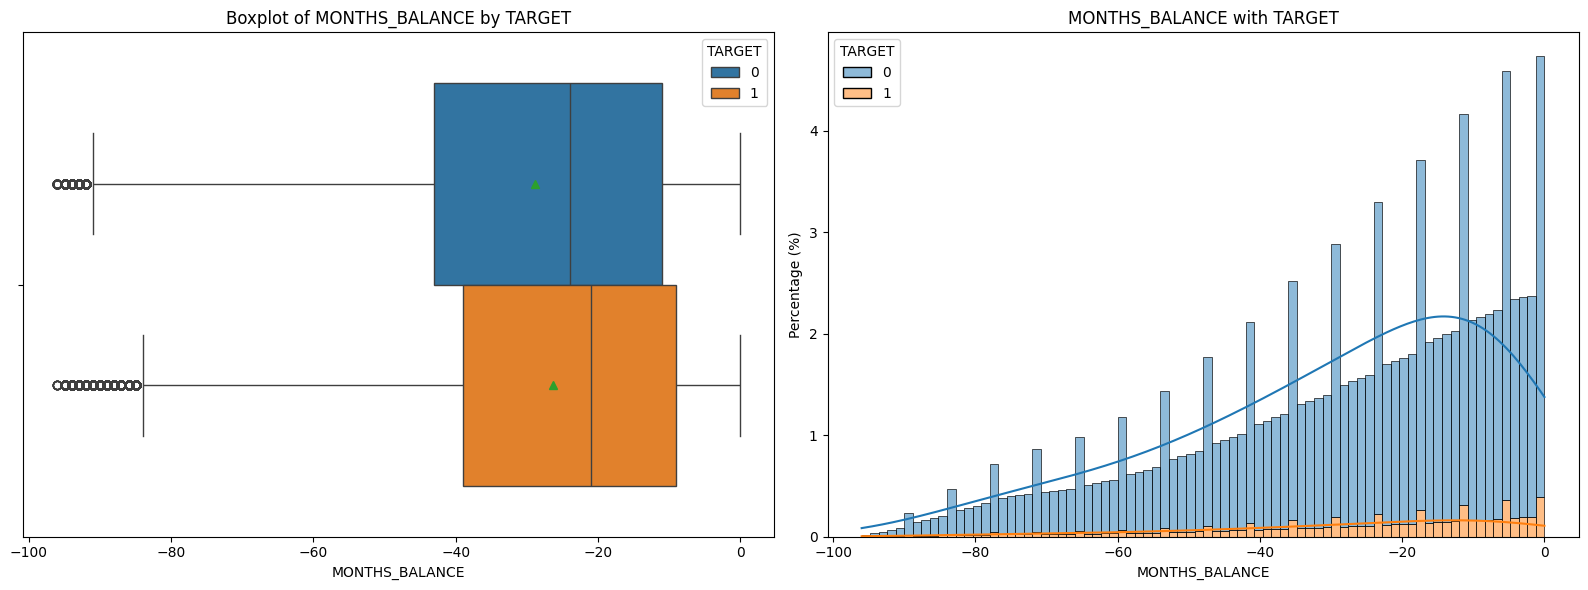

In [67]:
explore_numerical('MONTHS_BALANCE', missing_bureau_balance, bureau_balance_train)

Generally, the distribution for monthly balances for defaulting customers tends towards slightly more recent values than for non defaulting customers. 

# POS_CASH_balance

This table shows information about the point of sales and cash loan monthly balance information from a customer's previous Home Credit loans.

## Initial table exploration

In [ ]:
POS_CASH_balance = pd.read_csv('../tables/POS_CASH_balance.csv', sep=',')
POS_CASH_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

Adding the target variable to this table: 

In [69]:
POS_CASH_balance_train = POS_CASH_balance.merge(target_train, on='SK_ID_CURR', how='inner')
POS_CASH_balance_train.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  TARGET  
0                   45.0               Active       0           0       0  
1                   35.0               Active       0           0       0  
2                    9.0               Active       0           0       0  
3                   42.0               Active       0           0       0  
4                   35.0               Active       0           0       0

Now, the SK_ID_CURR column links this table to the application_train or _test tables, and the SK_ID_PREV column is an identifier for the ID of previous credits. These ID columns can be used to link tables as shown in the table connections image. 

Looking at the basic information about this table: 

In [70]:
print_df_info(POS_CASH_balance)

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None

Size of dataframe (rows, columns): (10001358, 8)


This table has about 10 million entries with 8 features. Of these features, 5 of them are of type int64, 2 of them are of type float64, and 1 of them is of type object. 

### Duplicate values

In [71]:
print_dup_info(POS_CASH_balance, 'SK_ID_PREV', 'SK_ID_CURR')

Duplicated rows in dataframe: 0
Duplicated 'SK_ID_PREV' in dataframe: 9065033
Duplicated 'SK_ID_CURR' in dataframe: 9664106
Number of duplicate values present in dataframe excluding 'SK_ID_PREV' and 'SK_ID_CURR': 9803006


Many ID values are duplicated in this table, as this is a time series dataset. Many monthly balances can be associated with a previous loan, and a current loan can be associated with many previous loans. 

Many duplicate values are present excluding the ID columns. Looking at these: 

In [72]:
POS_CASH_balance_features = POS_CASH_balance.drop(['SK_ID_PREV', 'SK_ID_CURR'], axis=1)
add_dup_counts(POS_CASH_balance_features)

MONTHS_BALANCE  CNT_INSTALMENT  CNT_INSTALMENT_FUTURE  \
265040             -12            12.0                   12.0   
267773             -11            12.0                   11.0   
270537             -10            12.0                   10.0   
270557             -10            12.0                   11.0   
267791             -11            12.0                   12.0   
...                ...             ...                    ...   
188194             -40            24.0                    7.0   
40197              -80             6.0                    0.0   
40196              -80             6.0                    0.0   
188213             -40            24.0                    9.0   
204361             -34            24.0                   23.0   

       NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  count  
265040               Active       0           0   6883  
267773               Active       0           0   6870  
270537               Active       0           0   6575  
270557               Active       0           0   6384  
267791               Active       0           0   6309  
...                     ...     ...         ...    ...  
188194               Active       6           6      2  
40197                Active     456           0      2  
40196                Active     454           0      2  
188213               Active      13          13      2  
204361               Active       1           1      2  

[96821 rows x 7 columns]

The above dataframe shows a list of duplicate rows in the bureau table with the number of times each row is present. Most popular MONTHS_BALANCE are from -10 to -12 (about a year before this dataset was published), a lot of duplicate rows also have the time of previous credit equal to 12 months with an active contract status, and no credit days past due.

These duplicate values (not considering the ID columns) will be kept, as it is probable that multiple customers have this same set of features in a dataset this large.

### Missing values:

Now, missing values can be examined: 

In [73]:
missing_POS_CASH, no_missing_POS_CASH = get_missing_df_info(POS_CASH_balance)
missing_POS_CASH

Empty strings: (array([], dtype=int64), array([], dtype=int64))
XNA strings: (array([1614508, 1614509]), array([5, 5]))
Percentage of total rows with missing values: 0.2618044469561034


Missing number  Missing percentage
CNT_INSTALMENT_FUTURE           26087            0.260835
CNT_INSTALMENT                  26071            0.260675

Two features in this table have a small amount of missing values.

Looking at the missing values heatmap gives: 

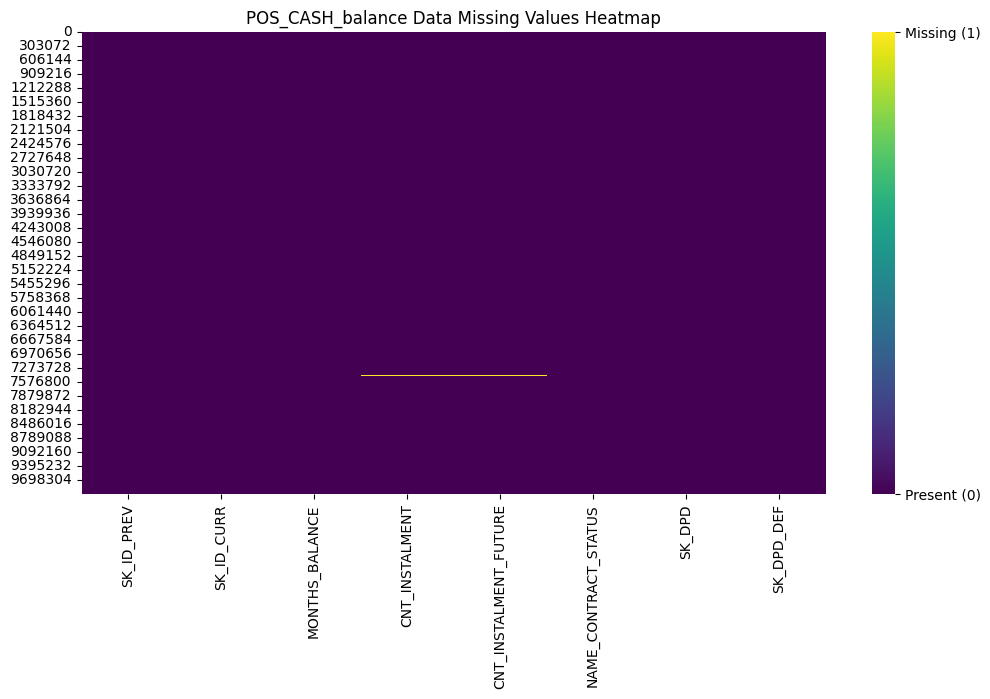

In [74]:
plt.figure(figsize=(12,6))
ax = sns.heatmap(POS_CASH_balance.isnull(), cbar=True, cmap="viridis", vmin=0, vmax=1)
colorbar = ax.collections[0].colorbar

colorbar.set_ticks([0, 1])
colorbar.set_ticklabels(['Present (0)', 'Missing (1)'])
plt.title("POS_CASH_balance Data Missing Values Heatmap")
plt.show()

CNT_INSTALMENT and CNT_INSTALMENT_FUTURE both have missing values in the same place. These variables will be examined futher in the explore_variable section.

### Chi-squared test for missing values

From these charts, it is clear that the variables with the most missing values are related to the building where a client lives. In general, no patterns are seen with these missing values. Performing a chi-squared test with null values from each category compared to the TARGET variable will tell if a correlation is present or not in the training data. 

Here the **null hypothesis** is that there is no relationship between the TARGET variable and whether a value is missing or not in a given feature. 

The **alternate hypothesis** is that there is a statistically significant relationship between the TARGET variable and a feature's absence of values. 

In addition, if a relationship is found between the presence of missing values and the TARGET, an indicator column is added to a modified dataset (train_). The chi-squared tests are done at the 95% confidence level: 

In [75]:
pos_indicator_cols = []

In [76]:
alpha = 0.05
train_ = POS_CASH_balance_train.copy()
for x in POS_CASH_balance_train.columns:
    contingency_table = pd.crosstab(POS_CASH_balance_train['TARGET'], POS_CASH_balance_train[f'{x}'].isnull())
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print('contingengy table \n', contingency_table)
    print(f"Chi-Squared Statistic: {chi2}")
    print(f"p-value: {p}")
    print(f"Degrees of Freedom: {dof}")
    if p < alpha:
        print(f"Reject the null hypothesis - There is a relationship between TARGET and missing {x} values.")
        train_[f'{x}_missing'] = train_[f'{x}'].isnull().astype(int)
        pos_indicator_cols.append(f'{x}')
    else:
        print(f"Fail to reject the null hypothesis - There is no relationship between TARGET and missing {x} values.")
    print()


contingengy table 
 SK_ID_PREV    False
TARGET             
0           7914789
1            628586
Chi-Squared Statistic: 0.0
p-value: 1.0
Degrees of Freedom: 0
Fail to reject the null hypothesis - There is no relationship between TARGET and missing SK_ID_PREV values.

contingengy table 
 SK_ID_CURR    False
TARGET             
0           7914789
1            628586
Chi-Squared Statistic: 0.0
p-value: 1.0
Degrees of Freedom: 0
Fail to reject the null hypothesis - There is no relationship between TARGET and missing SK_ID_CURR values.

contingengy table 
 MONTHS_BALANCE    False
TARGET                 
0               7914789
1                628586
Chi-Squared Statistic: 0.0
p-value: 1.0
Degrees of Freedom: 0
Fail to reject the null hypothesis - There is no relationship between TARGET and missing MONTHS_BALANCE values.

contingengy table 
 CNT_INSTALMENT    False  True 
TARGET                        
0               7895026  19763
1                626486   2100
Chi-Squared Statistic: 

Both variables with missing values seem to have a relationship with the target variable: 

In [77]:
pos_indicator_cols

['CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE']

 An indicator variable for these relationships is added to the train_ dataset where this relationship is present. The missing values will be analyzed in detail when looking at selected variables one by one. 

Looking at the modified training data: 

In [78]:
train_.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  TARGET  \
0                   45.0               Active       0           0       0   
1                   35.0               Active       0           0       0   
2                    9.0               Active       0           0       0   
3                   42.0               Active       0           0       0   
4                   35.0               Active       0           0       0   

   CNT_INSTALMENT_missing  CNT_INSTALMENT_FUTURE_missing  
0                       0                              0  
1                       0                              0  
2                       0                              0  
3                       0                              0  
4                       0                              0

## Correlations: 

### Phi-k correlation: 

First, data types are examined so as to identify interval columns: 


In [79]:
POS_CASH_balance_train.dtypes

SK_ID_PREV                 int64
SK_ID_CURR                 int64
MONTHS_BALANCE             int64
CNT_INSTALMENT           float64
CNT_INSTALMENT_FUTURE    float64
NAME_CONTRACT_STATUS      object
SK_DPD                     int64
SK_DPD_DEF                 int64
TARGET                     int64
dtype: object

In [80]:
phik_vars = POS_CASH_balance_train.drop(['SK_ID_CURR', 'SK_ID_PREV'], axis=1)
float_features = POS_CASH_balance_train.select_dtypes(include=['float64']).columns
interval_cols = float_features.union(['SK_DPD', 'SK_DPD_DEF'])

Now, the phi-k correlation matrix can be calculated and visualized: 

In [81]:
phik_overview = phik_vars.phik_matrix(interval_cols=interval_cols, njobs=1)


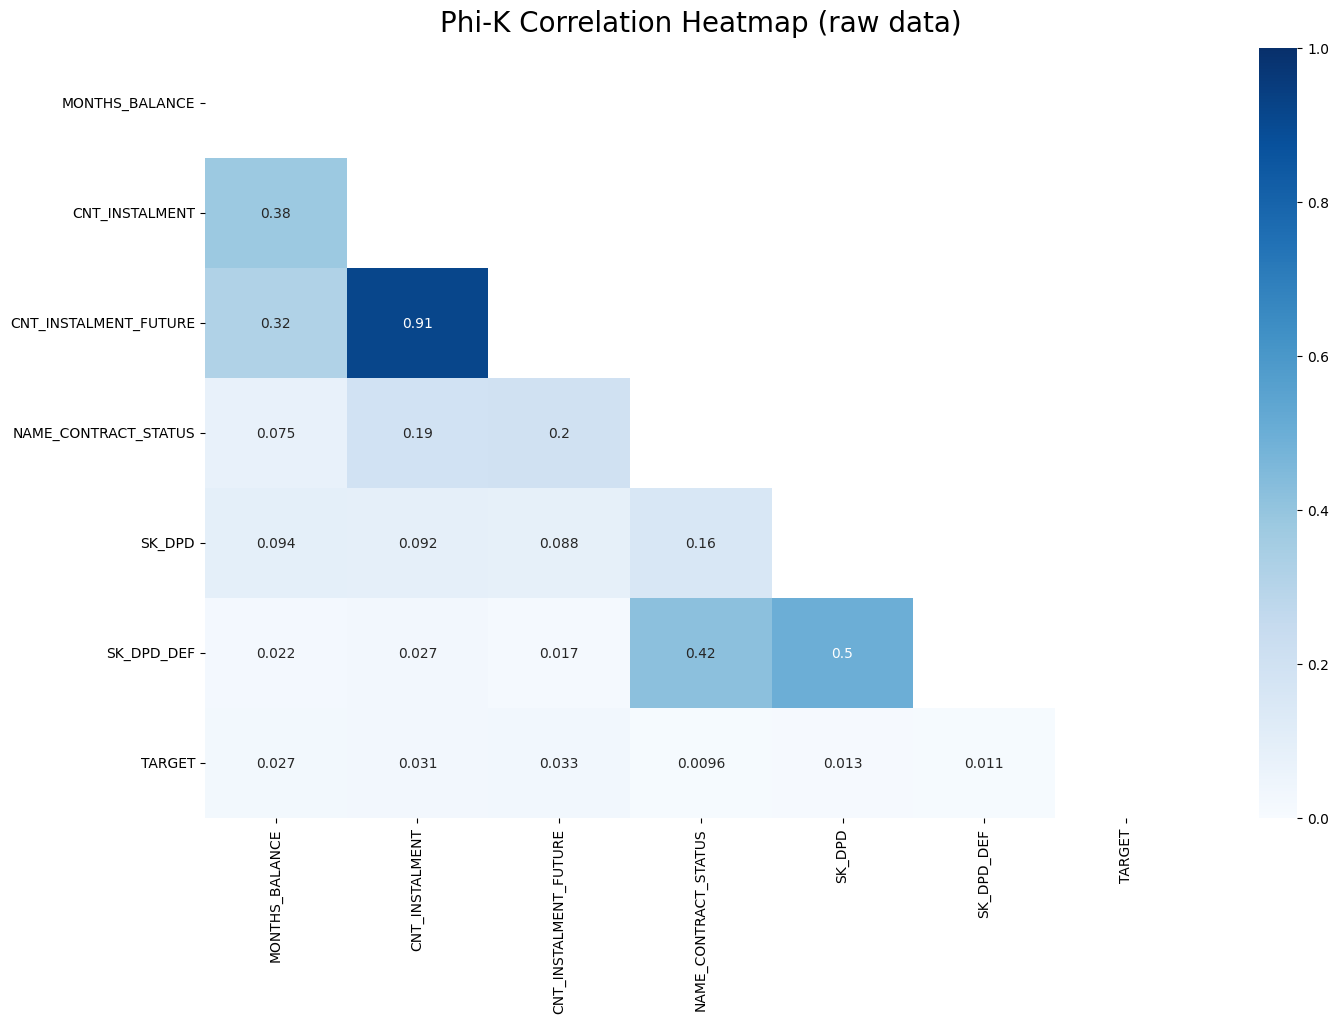

In [82]:
plt.figure(figsize=(16,10))
mask = np.triu(np.ones_like(phik_overview, dtype=bool))
heatmap = sns.heatmap(phik_overview, annot=True, mask=mask, cmap='Blues', vmin=0, vmax=1)
heatmap.set_title('Phi-K Correlation Heatmap (raw data)', fontdict={'fontsize':20}, pad=12)
plt.show()

No correlations are seen between the target variable and other variables. A strong correlation is evident between CNT_INSTALMENT and CNT_INSTALMENT_FUTURE (0.91), and a moderate correlation is seen with SK_DPD and SK_DPD_DEF (0.5).

### Spearman correlation: 

Looking at the spearman correlation heatmap can tell the correlation direction between variables.

In [83]:
spearman_corr = POS_CASH_balance_train.drop(['SK_ID_PREV', 'SK_ID_CURR'], axis=1).corr(method='spearman', numeric_only=True)

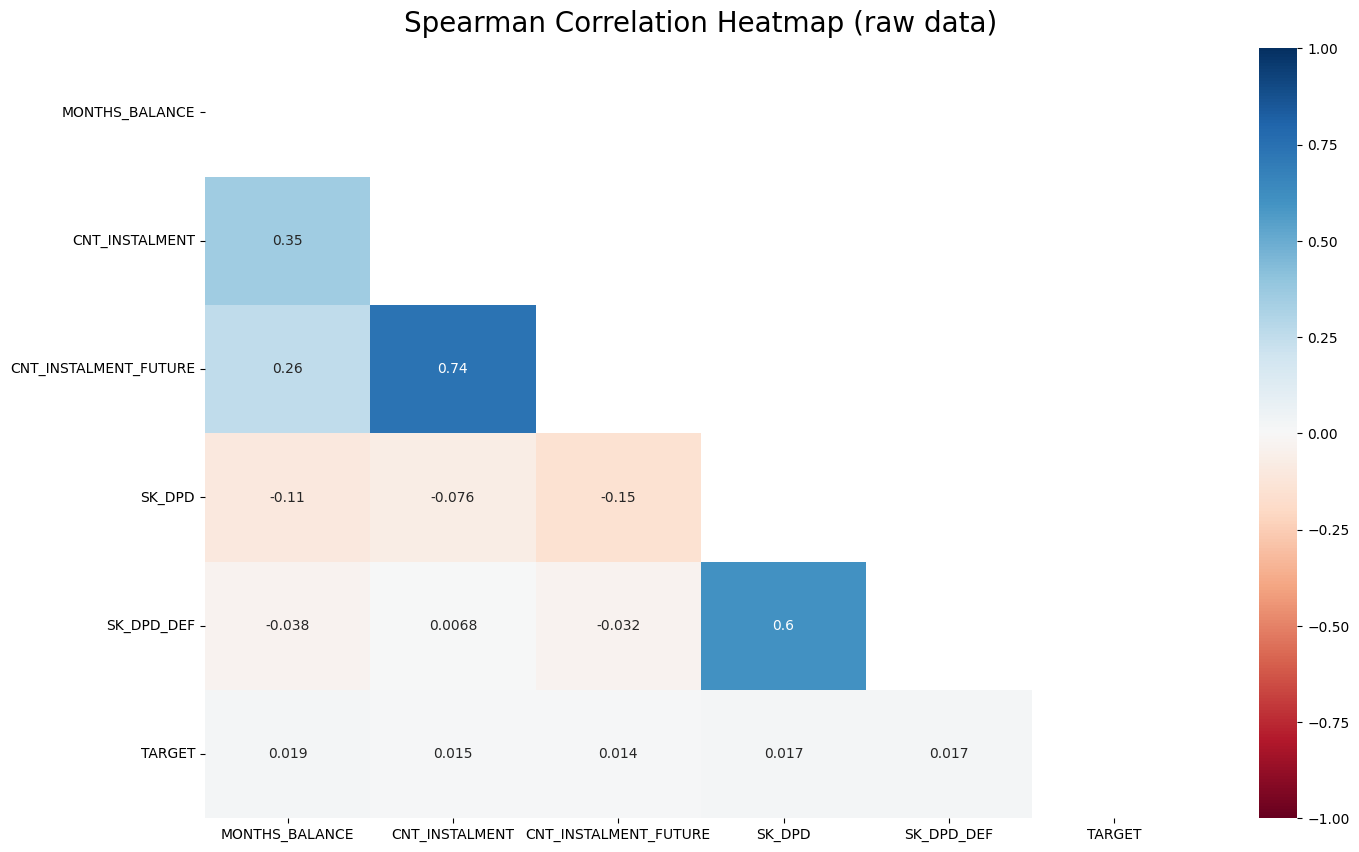

In [84]:
plt.figure(figsize=(16,10))
mask = np.triu(np.ones_like(spearman_corr, dtype=bool))
heatmap = sns.heatmap(spearman_corr, annot=True, mask=mask, cmap='RdBu', vmin=-1, vmax=1)
heatmap.set_title('Spearman Correlation Heatmap (raw data)', fontdict={'fontsize':20}, pad=12)
plt.show()

Both identified correlations (CNT_INSTALMENT and CNT_INSTALMENT_FUTURE (0.74), and SK_DPD and SK_DPD_DEF (0.6)) are shown to be positive. 

## Explore_variables

### Categorical variables

The only categorical variable is name_contract_status.

Exploring NAME_CONTRACT_STATUS
No missing values


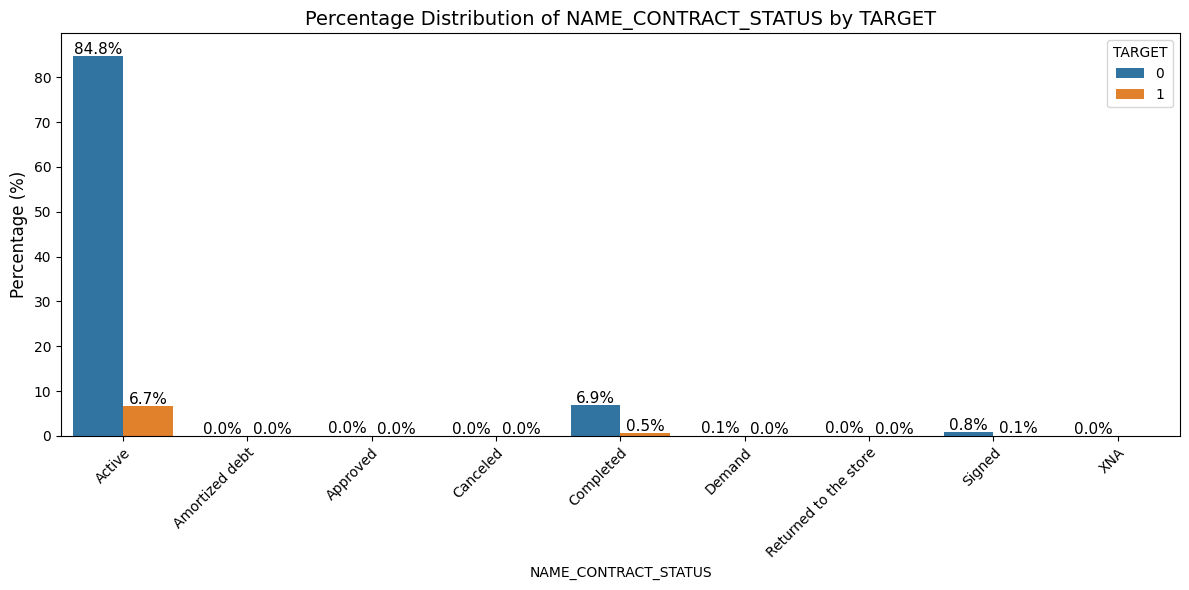

In [85]:
explore_category('NAME_CONTRACT_STATUS', missing_POS_CASH, POS_CASH_balance_train)

Only two categories have significant amounts of data, so this variable's grouping can be simplified: 

In [86]:
group_map = {
    'Active': 'Active',
    'Completed': 'Completed',
    'Signed': 'other',
    'Demand': 'other',
    'Returned to the store': 'other',
    'Approved': 'other',
    'Amortized debt': 'other',
    'Canceled': 'other',
    'XNA': 'other'
}
    
POS_CASH_balance_train['NAME_CONTRACT_STATUS_GROUPED'] = POS_CASH_balance_train['NAME_CONTRACT_STATUS'].map(group_map)

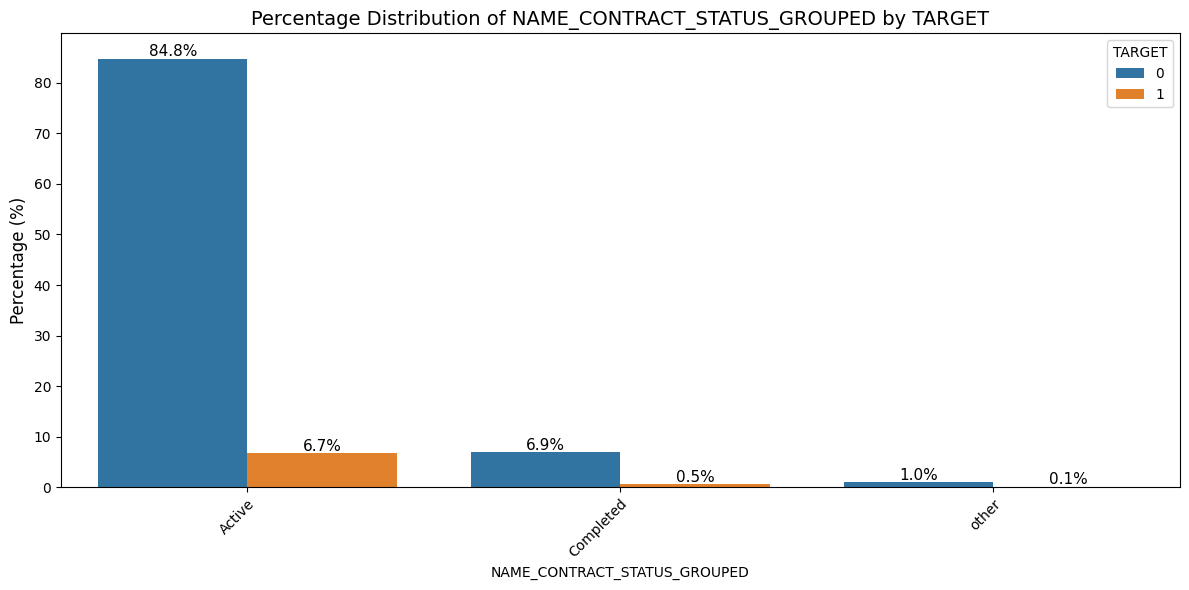

In [87]:
plot_category(POS_CASH_balance_train, 'NAME_CONTRACT_STATUS_GROUPED')

Most contract statuses for each month are active.

### Numerical variables

Variables to be examined here are: 
- months_balance,
- cnt_instalment_future, and
- sk_dpd


#### Examining months_balance: 

Exploring MONTHS_BALANCE
No missing values


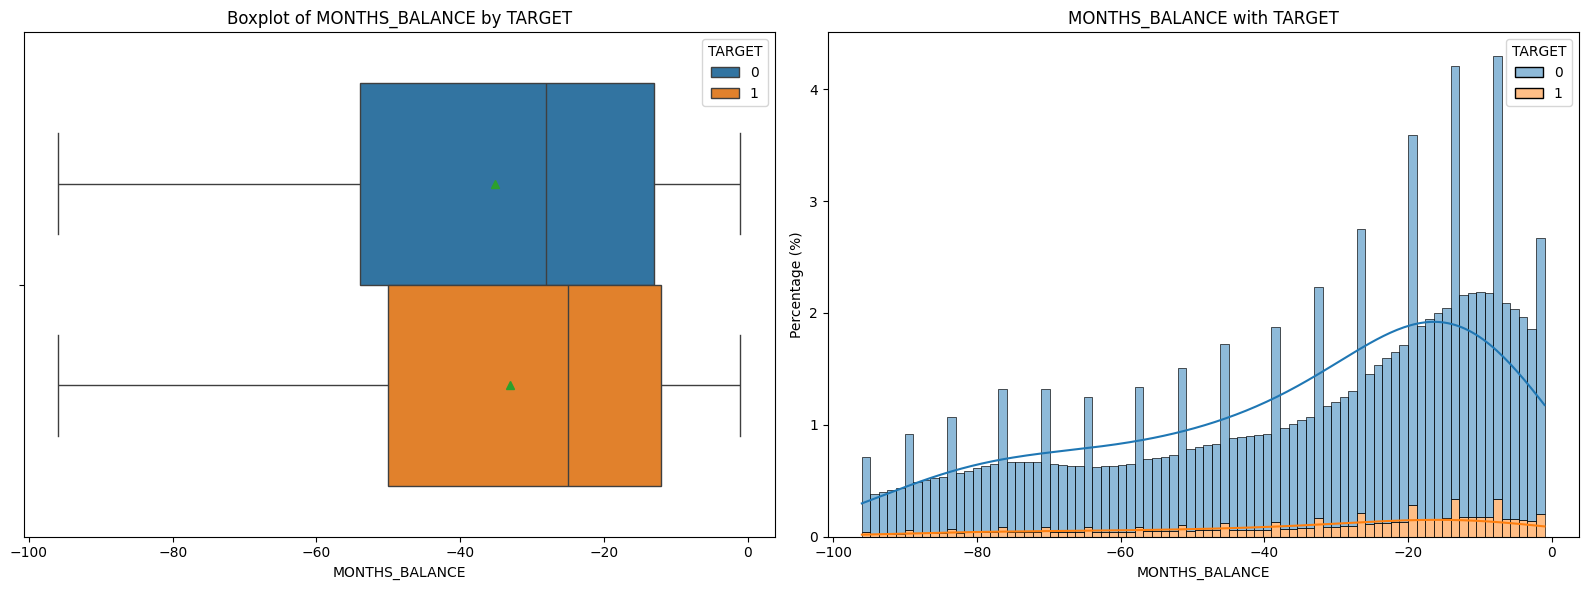

In [88]:
explore_numerical('MONTHS_BALANCE', missing_POS_CASH, POS_CASH_balance_train)

About half of monthly balances have been recorded in the 30 months before the Home Credit application was submitted. No significant difference is seen between the target distributions.

#### CNT_INSTALMENT_FUTURE

Exploring CNT_INSTALMENT_FUTURE
Missing number        26087.000000
Missing percentage        0.260835
Name: CNT_INSTALMENT_FUTURE, dtype: float64 



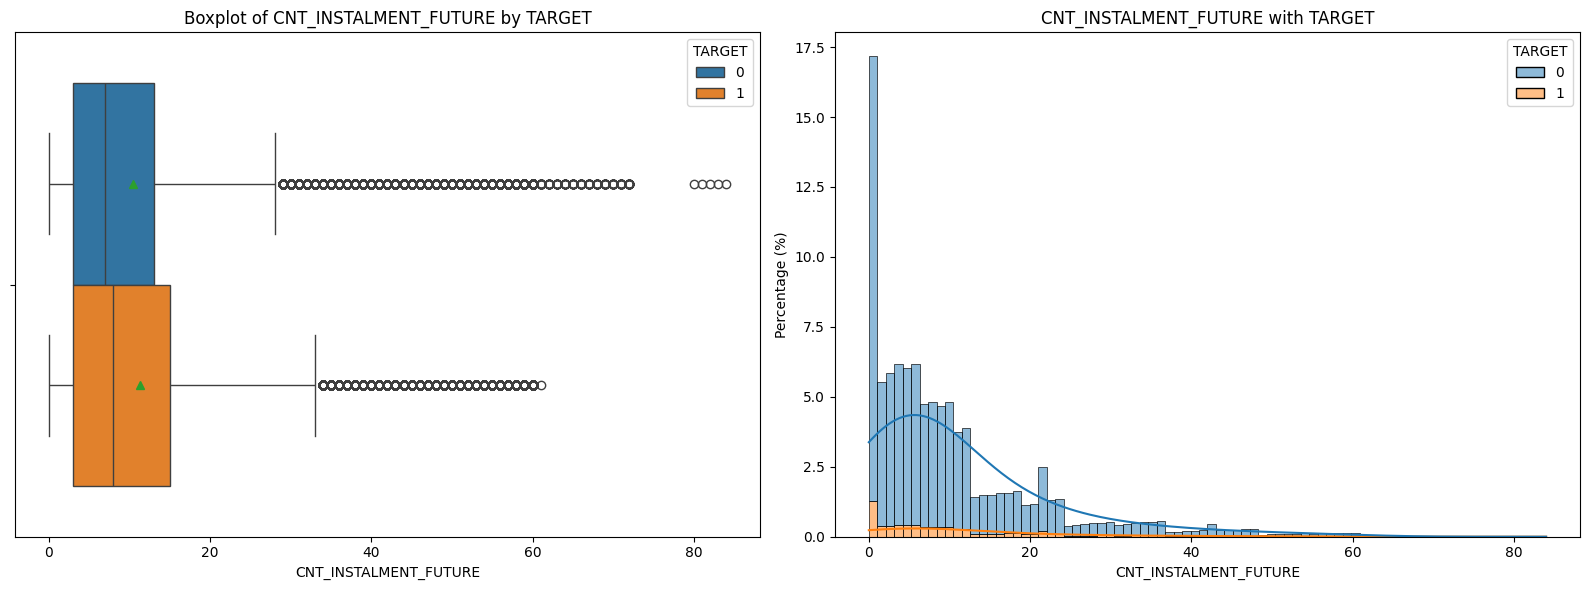

In [89]:
explore_numerical('CNT_INSTALMENT_FUTURE', missing_POS_CASH, POS_CASH_balance_train)

About 17% of customers have no installments left to pay on their previous Home Credit loan. It seems that the 25-75th percentile range for non defaulting customers is more narrow (about 5-15 installments) than that for defaulting customers (about 5-18 installments). 

#### SK_DPD

Exploring SK_DPD
No missing values


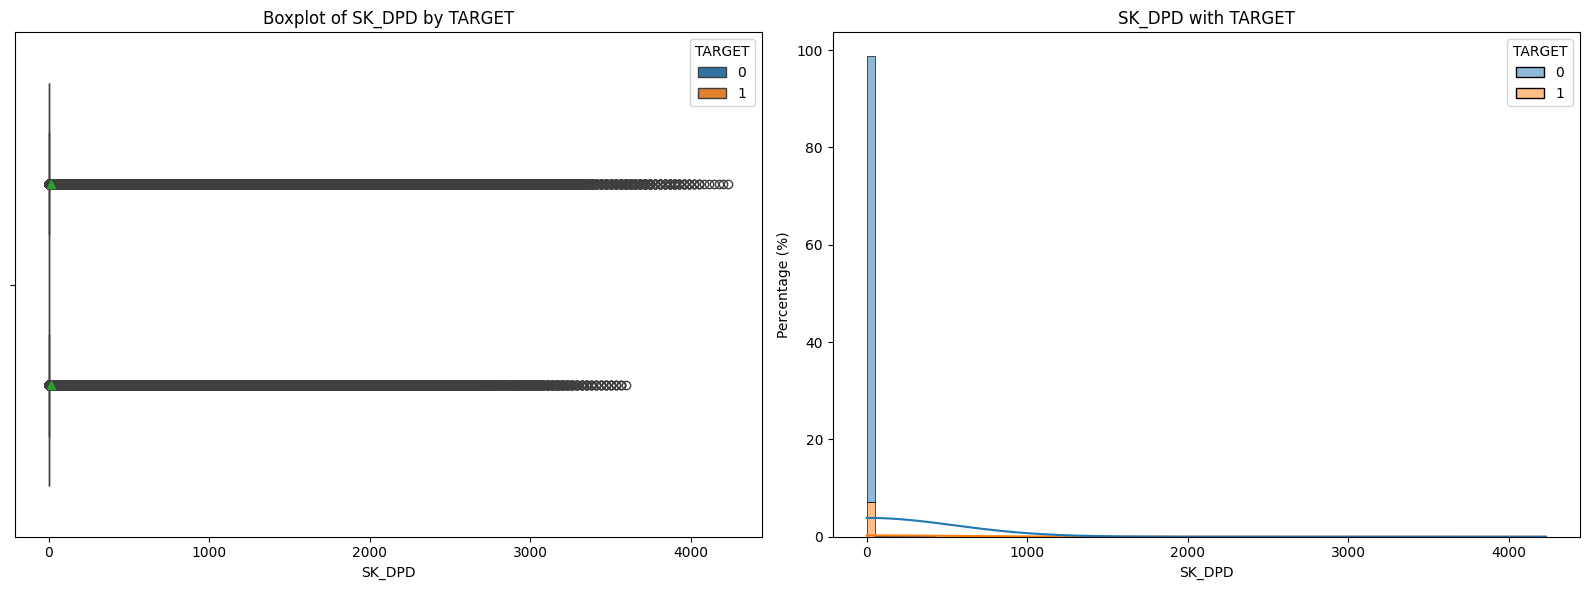

In [90]:
explore_numerical('SK_DPD', missing_POS_CASH, POS_CASH_balance_train)

Most customers have no days past due on previous credits, and so an indicator variable is added here: 

Exploring SK_DPD_NONZERO
No missing values


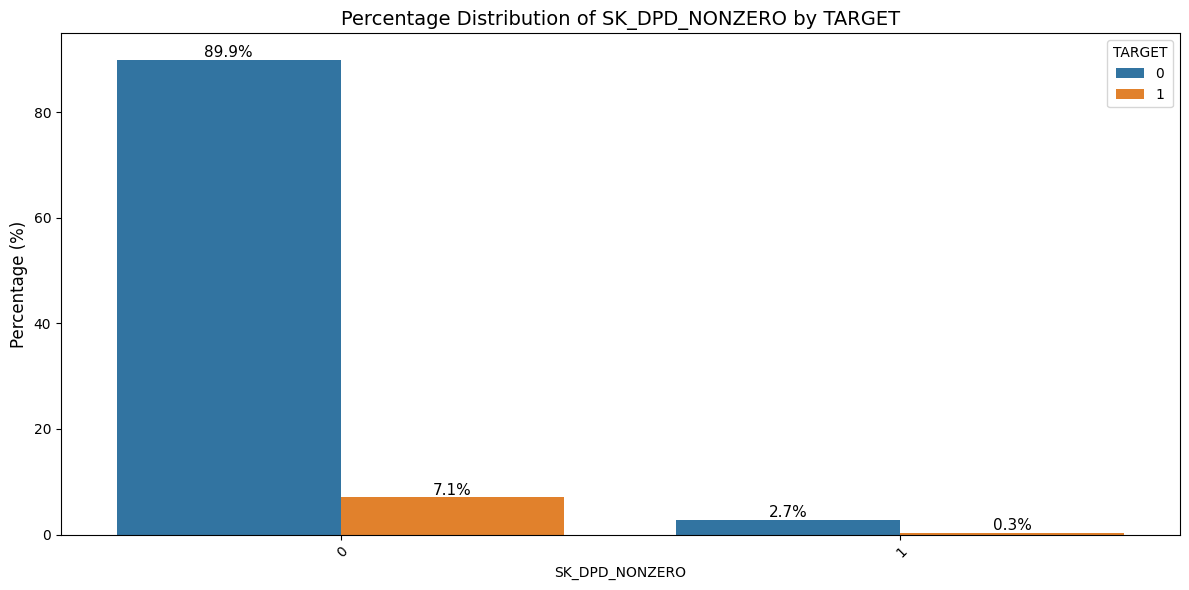

In [91]:
POS_CASH_balance_train['SK_DPD_NONZERO'] = (POS_CASH_balance_train['SK_DPD'] > 0).astype(int)
explore_category('SK_DPD_NONZERO', missing_POS_CASH, POS_CASH_balance_train)


Only 3% of customers have any days past due for previous credit. 

# Credit_card_balance

This table shows information about a customer's previous Home Credit montly credit card balances. 

## Initial table examination: 

In [ ]:
credit_card_balance = pd.read_csv('../tables/credit_card_balance.csv', sep=',')
credit_card_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

Adding the target column to the table: 

In [93]:
credit_card_balance_train = credit_card_balance.merge(target_train, on='SK_ID_CURR', how='inner')


In [94]:
credit_card_balance_train

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0           2582071      363914              -1    63975.555   
1           1389973      337855              -4   236572.110   
2           1891521      126868              -1   453919.455   
3           2181852      367360              -4   291543.075   
4           1235299      203885              -5   201261.195   
...             ...         ...             ...          ...   
3227960     1036507      328243              -9        0.000   
3227961     1714892      347207              -9        0.000   
3227962     1302323      215757              -9   275784.975   
3227963     1624872      430337             -10        0.000   
3227964     2411345      236760             -10        0.000   

         AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
0                          45000                    2250.0   
1                         225000                    2250.0   
2                         450000                       0.0   
3                         292500                   90000.0   
4                         225000                   76500.0   
...                          ...                       ...   
3227960                    45000                       NaN   
3227961                    45000                       0.0   
3227962                   585000                  270000.0   
3227963                   450000                       NaN   
3227964                   157500                       0.0   

         AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  \
0                    2250.000                         0.0   
1                    2250.000                         0.0   
2                   11547.000                         0.0   
3                  289339.425                         0.0   
4                  111026.700                         0.0   
...                       ...                         ...   
3227960                 0.000                         NaN   
3227961                 0.000                         0.0   
3227962            270000.000                         0.0   
3227963                 0.000                         NaN   
3227964                 0.000                         0.0   

         AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  ...  \
0                           0.000                  2250.00  ...   
1                           0.000                 11795.76  ...   
2                       11547.000                 22924.89  ...   
3                      199339.425                   130.50  ...   
4                       34526.700                  6338.34  ...   
...                           ...                      ...  ...   
3227960                       NaN                     0.00  ...   
3227961                     0.000                     0.00  ...   
3227962                     0.000                  2250.00  ...   
3227963                       NaN                     0.00  ...   
3227964                     0.000                     0.00  ...   

         AMT_TOTAL_RECEIVABLE  CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  \
0                   64875.555                       1.0                     1   
1                  233048.970                       1.0                     1   
2                  453919.455                       0.0                     1   
3                  286831.575                       3.0                     8   
4                  197224.695                       3.0                     9   
...                       ...                       ...                   ...   
3227960                 0.000                       NaN                     0   
3227961                 0.000                       0.0                     0   
3227962            273093.975                       2.0                     2   
3227963                 0.000                       NaN                     0   
3227964                 0.000                       0.0           

As before, the SK_ID_CURR column links this table to the application_train or _test tables, and the SK_ID_PREV column is an identifier for the ID of previous credits. These ID columns can be used to link tables as shown in the table connections image. 

Looking at the basic information about this table: 

In [95]:
print_df_info(credit_card_balance)

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_I

This table has about 3.8 million entries with 23 features. Of these features, 15 of them are of type float64, 7 of them are of type int64, and 1 of them is of type object. 

### Duplicate values

In [96]:
print_dup_info(credit_card_balance, 'SK_ID_PREV', 'SK_ID_CURR')

Duplicated rows in dataframe: 0
Duplicated 'SK_ID_PREV' in dataframe: 3736005
Duplicated 'SK_ID_CURR' in dataframe: 3736754
Number of duplicate values present in dataframe excluding 'SK_ID_PREV' and 'SK_ID_CURR': 1001430


Many ID values are duplicated in this table, as this is also a dataset showing time series data. Many monthly balances can be associated with a previous loan, and a current loan can be associated with many previous loans. 

Many duplicate values are present excluding the ID columns. Looking at these: 

In [97]:
credit_card_balance_features = credit_card_balance.drop(['SK_ID_PREV', 'SK_ID_CURR'], axis=1)
add_dup_counts(credit_card_balance_features)

MONTHS_BALANCE  AMT_BALANCE  AMT_CREDIT_LIMIT_ACTUAL  \
2448464              -8          0.0                    45000   
2393559              -9          0.0                    45000   
2505776              -7          0.0                    45000   
2340884             -10          0.0                    45000   
2565682              -6          0.0                    45000   
...                 ...          ...                      ...   
1960746             -18          0.0                        0   
1960782             -18          0.0                        0   
1960805             -18          0.0                        0   
1960816             -18          0.0                        0   
2                   -96          0.0                    45000   

         AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
2448464                       NaN                   0.0   
2393559                       NaN                   0.0   
2505776                       NaN                   0.0   
2340884                       NaN                   0.0   
2565682                       NaN                   0.0   
...                           ...                   ...   
1960746                       0.0                   0.0   
1960782                       0.0                   0.0   
1960805                       0.0                   0.0   
1960816                       0.0                   0.0   
2                             0.0                   0.0   

         AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
2448464                         NaN                       NaN   
2393559                         NaN                       NaN   
2505776                         NaN                       NaN   
2340884                         NaN                       NaN   
2565682                         NaN                       NaN   
...                             ...                       ...   
1960746                         0.0                       0.0   
1960782                         0.0                       0.0   
1960805                         0.0                       0.0   
1960816                         0.0                       0.0   
2                               0.0                       0.0   

         AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  \
2448464                      0.0                  NaN   
2393559                      0.0                  NaN   
2505776                      0.0                  NaN   
2340884                      0.0                  NaN   
2565682                      0.0                  NaN   
...                          ...                  ...   
1960746                      0.0                3.285   
1960782                      0.0                3.690   
1960805                      0.0                3.915   
1960816                      0.0                4.050   
2                            NaN                0.000   

         AMT_PAYMENT_TOTAL_CURRENT  ...  AMT_TOTAL_RECEIVABLE  \
2448464                        0.0  ...                   0.0   
2393559                        0.0  ...                   0.0   
2505776                        0.0  ...                   0.0   
2340884                        0.0  ...                   0.0   
2565682                        0.0  ...                   0.0   
...                            ...  ...                   ...   
1960746                        0.0  ...                   0.0   
1960782                        0.0  ...                   0.0   
1960805                        0.0  ...                   0.0   
1960816                        0.0  ...                   0.0   
2                              0.0  ...                   0.0   

         CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  \
2448464                       NaN                     0   
2393559                       NaN                     0   
2505776                       NaN                     0   
2340884                       NaN   

The above dataframe shows a list of duplicate rows in the bureau table with the number of times each row is present. Here, most customers also seem to have zero for most balances with credit limit of 45000 and an active credit status from 6-10 months before the publication of this dataset. 

These duplicate values (not considering the ID columns) will be kept, as it is probable that multiple customers have this same set of features in a dataset this large.

### Missing values:

Now, missing values can be examined: 

In [98]:
missing_credit_card, no_missing_credit_card = get_missing_df_info(credit_card_balance)
missing_credit_card

Empty strings: (array([], dtype=int64), array([], dtype=int64))
XNA strings: (array([], dtype=int64), array([], dtype=int64))
Percentage of total rows with missing values: 21.509606511137637


Missing number  Missing percentage
AMT_PAYMENT_CURRENT                 767988           19.998063
AMT_DRAWINGS_ATM_CURRENT            749816           19.524872
CNT_DRAWINGS_POS_CURRENT            749816           19.524872
AMT_DRAWINGS_OTHER_CURRENT          749816           19.524872
AMT_DRAWINGS_POS_CURRENT            749816           19.524872
CNT_DRAWINGS_OTHER_CURRENT          749816           19.524872
CNT_DRAWINGS_ATM_CURRENT            749816           19.524872
CNT_INSTALMENT_MATURE_CUM           305236            7.948208
AMT_INST_MIN_REGULARITY             305236            7.948208

9 of these have missing values, ranging from about 8-20% of data.

Looking at the missing values heatmap gives: 

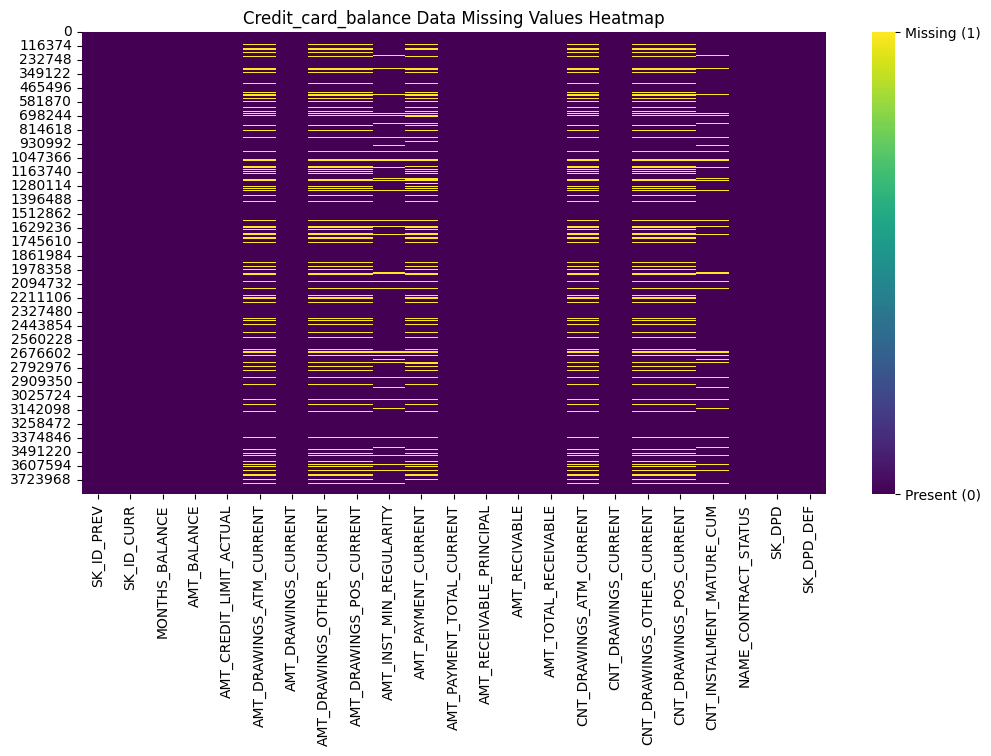

In [99]:
plt.figure(figsize=(12,6))
ax = sns.heatmap(credit_card_balance.isnull(), cbar=True, cmap="viridis", vmin=0, vmax=1)
colorbar = ax.collections[0].colorbar

colorbar.set_ticks([0, 1])
colorbar.set_ticklabels(['Present (0)', 'Missing (1)'])
plt.title("Credit_card_balance Data Missing Values Heatmap")
plt.show()

No clear trends are seen here.

### Chi-squared test for missing values

From these charts, it is clear that the variables with the most missing values are related to the building where a client lives. In general, no patterns are seen with these missing values. Performing a chi-squared test with null values from each category compared to the TARGET variable will tell if a correlation is present or not in the training data. 

Here the **null hypothesis** is that there is no relationship between the TARGET variable and whether a value is missing or not in a given feature. 

The **alternate hypothesis** is that there is a statistically significant relationship between the TARGET variable and a feature's absence of values. 

In addition, if a relationship is found between the presence of missing values and the TARGET, an indicator column is added to a modified dataset (train_). The chi-squared tests are done at the 95% confidence level: 

In [100]:
credit_card_indicator_cols = []

In [101]:
alpha = 0.05
train_ = credit_card_balance_train.copy()
for x in credit_card_balance_train.columns:
    contingency_table = pd.crosstab(credit_card_balance_train['TARGET'], credit_card_balance_train[f'{x}'].isnull())
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print('contingengy table \n', contingency_table)
    print(f"Chi-Squared Statistic: {chi2}")
    print(f"p-value: {p}")
    print(f"Degrees of Freedom: {dof}")
    if p < alpha:
        print(f"Reject the null hypothesis - There is a relationship between TARGET and missing {x} values.")
        train_[f'{x}_missing'] = train_[f'{x}'].isnull().astype(int)
        credit_card_indicator_cols.append(f'{x}')
    else:
        print(f"Fail to reject the null hypothesis - There is no relationship between TARGET and missing {x} values.")
    print()


contingengy table 
 SK_ID_PREV    False
TARGET             
0           2997964
1            230001
Chi-Squared Statistic: 0.0
p-value: 1.0
Degrees of Freedom: 0
Fail to reject the null hypothesis - There is no relationship between TARGET and missing SK_ID_PREV values.

contingengy table 
 SK_ID_CURR    False
TARGET             
0           2997964
1            230001
Chi-Squared Statistic: 0.0
p-value: 1.0
Degrees of Freedom: 0
Fail to reject the null hypothesis - There is no relationship between TARGET and missing SK_ID_CURR values.

contingengy table 
 MONTHS_BALANCE    False
TARGET                 
0               2997964
1                230001
Chi-Squared Statistic: 0.0
p-value: 1.0
Degrees of Freedom: 0
Fail to reject the null hypothesis - There is no relationship between TARGET and missing MONTHS_BALANCE values.

contingengy table 
 AMT_BALANCE    False
TARGET              
0            2997964
1             230001
Chi-Squared Statistic: 0.0
p-value: 1.0
Degrees of Freedom: 0
F

The variables with missing value relationships with the target variable are: 

In [102]:
credit_card_indicator_cols

['AMT_DRAWINGS_ATM_CURRENT',
 'AMT_DRAWINGS_OTHER_CURRENT',
 'AMT_DRAWINGS_POS_CURRENT',
 'AMT_INST_MIN_REGULARITY',
 'AMT_PAYMENT_CURRENT',
 'CNT_DRAWINGS_ATM_CURRENT',
 'CNT_DRAWINGS_OTHER_CURRENT',
 'CNT_DRAWINGS_POS_CURRENT',
 'CNT_INSTALMENT_MATURE_CUM']

Quite a few of the variables with missing values seem to be correlated with the TARGET variable. An indicator variable for these relationships is added to the train_ dataset where this relationship is present. The missing values will be analyzed in detail when looking at selected variables one by one. 

Looking at the modified training data: 

In [103]:
train_.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2582071      363914              -1    63975.555   
1     1389973      337855              -4   236572.110   
2     1891521      126868              -1   453919.455   
3     2181852      367360              -4   291543.075   
4     1235299      203885              -5   201261.195   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                    45000                    2250.0              2250.000   
1                   225000                    2250.0              2250.000   
2                   450000                       0.0             11547.000   
3                   292500                   90000.0            289339.425   
4                   225000                   76500.0            111026.700   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     0.000   
1                         0.0                     0.000   
2                         0.0                 11547.000   
3                         0.0                199339.425   
4                         0.0                 34526.700   

   AMT_INST_MIN_REGULARITY  ...  TARGET  AMT_DRAWINGS_ATM_CURRENT_missing  \
0                  2250.00  ...       1                                 0   
1                 11795.76  ...       0                                 0   
2                 22924.89  ...       0                                 0   
3                   130.50  ...       0                                 0   
4                  6338.34  ...       0                                 0   

   AMT_DRAWINGS_OTHER_CURRENT_missing  AMT_DRAWINGS_POS_CURRENT_missing  \
0                                   0                                 0   
1                                   0                                 0   
2                                   0                                 0   
3                                   0                                 0   
4                                   0                                 0   

   AMT_INST_MIN_REGULARITY_missing  AMT_PAYMENT_CURRENT_missing  \
0                                0                            0   
1                                0                            0   
2                                0                            0   
3                                0                            0   
4                                0                            0   

   CNT_DRAWINGS_ATM_CURRENT_missing  CNT_DRAWINGS_OTHER_CURRENT_missing  \
0                                 0                                   0   
1                                 0                                   0   
2                                 0                                   0   
3                                 0                                   0   
4                                 0                                   0   

   CNT_DRAWINGS_POS_CURRENT_missing  CNT_INSTALMENT_MATURE_CUM_missing  
0                                 0                                  0  
1                                 0                                  0  
2                                 0                                  0  
3                                 0                                  0  
4                                 0                                  0  

[5 rows x 33 columns]

## Correlation: 

### Phi-k correlation

Looking at the data types of this table again to identify interval columns: 

In [104]:
credit_card_balance_train.dtypes

SK_ID_PREV                      int64
SK_ID_CURR                      int64
MONTHS_BALANCE                  int64
AMT_BALANCE                   float64
AMT_CREDIT_LIMIT_ACTUAL         int64
AMT_DRAWINGS_ATM_CURRENT      float64
AMT_DRAWINGS_CURRENT          float64
AMT_DRAWINGS_OTHER_CURRENT    float64
AMT_DRAWINGS_POS_CURRENT      float64
AMT_INST_MIN_REGULARITY       float64
AMT_PAYMENT_CURRENT           float64
AMT_PAYMENT_TOTAL_CURRENT     float64
AMT_RECEIVABLE_PRINCIPAL      float64
AMT_RECIVABLE                 float64
AMT_TOTAL_RECEIVABLE          float64
CNT_DRAWINGS_ATM_CURRENT      float64
CNT_DRAWINGS_CURRENT            int64
CNT_DRAWINGS_OTHER_CURRENT    float64
CNT_DRAWINGS_POS_CURRENT      float64
CNT_INSTALMENT_MATURE_CUM     float64
NAME_CONTRACT_STATUS           object
SK_DPD                          int64
SK_DPD_DEF                      int64
TARGET                          int64
dtype: object

In [105]:
phik_vars = credit_card_balance_train.drop(['SK_ID_CURR', 'SK_ID_PREV'], axis=1)
float_features = credit_card_balance_train.select_dtypes(include=['float64']).columns
interval_cols = float_features.union(['SK_DPD_DEF', 'SK_DPD', 'CNT_DRAWINGS_CURRENT', 'AMT_CREDIT_LIMIT_ACTUAL', 'MONTHS_BALANCE'])

Calculating and visualizing the phi-k matrix: 

In [106]:
phik_overview = phik_vars.phik_matrix(interval_cols=interval_cols)


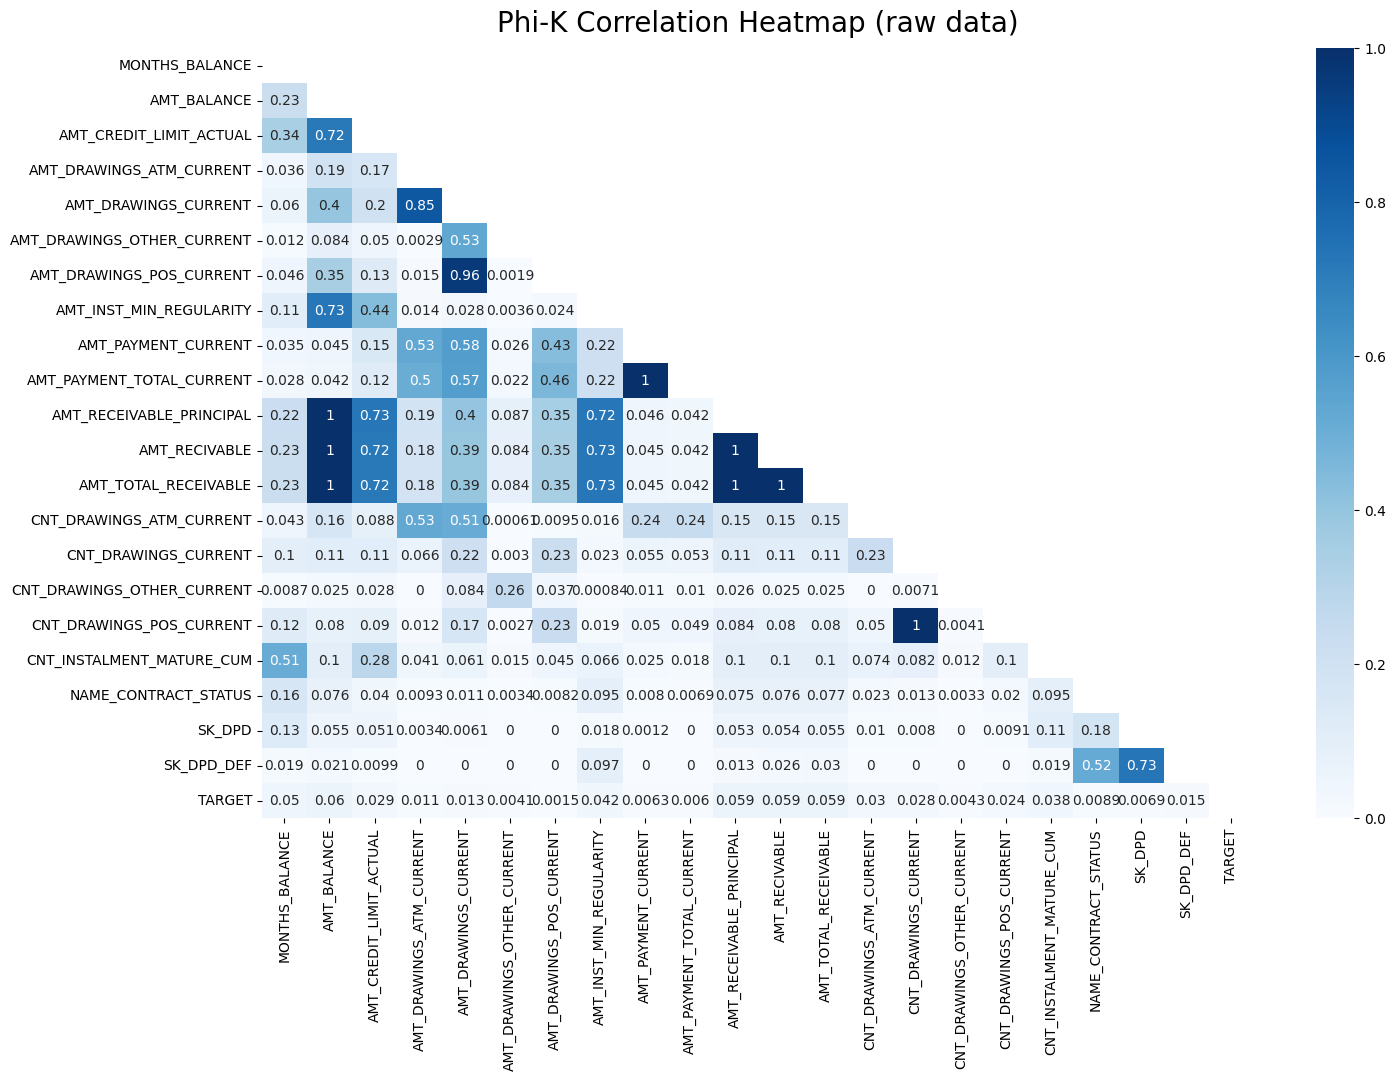

In [107]:
plt.figure(figsize=(16,10))
mask = np.triu(np.ones_like(phik_overview, dtype=bool))
heatmap = sns.heatmap(phik_overview, annot=True, mask=mask, cmap='Blues', vmin=0, vmax=1)
heatmap.set_title('Phi-K Correlation Heatmap (raw data)', fontdict={'fontsize':20}, pad=12)
plt.show()

Once again, no correlations are seen between the target variable and other variables. Some variables are completely correlated with each other: 
- CNT_DRAWINGS_CURRENT and CNT_DRAWINGS_POS_CURRENT, 
- AMT_RECIVABLE and AMT_TOTAL_RECEIVABLE, 
- AMT_RECEIVABLE_PRINCIPAL and AMT_TOTAL_RECEIVABLE, 
- AMT_RECEIVABLE_PRINCIPAL and AMT_RECIVABLE, 
- AMT_PAYMENT_TOTAL_CURRENT and AMT_PAYMENT_CURRENT, 
- AMT_BALANCE and AMT_TOTAL_RECEIVABLE, AMT_RECIVABLE, and AMT_RECEIVABLE_PRINCIPAL. 

Other strong correlations of over 0.7 include: 
- SK_DPD and SK_DPD_DEF (0.73), 
- AMT_BALANCE and AMT_INST_MIN_REGULARITY (0.73),
- AMT_BALANCE and AMT_CREDIT_LIMIT_ACTUAL (0.72),
- AMT_CREDIT_LIMIT_ACTUAL and AMT_RECEIVABLE_PRINCIPAL (0.73),
- AMT_CREDIT_LIMIT_ACTUAL and AMT_RECEIVABLE (0.72),
- AMT_CREDIT_LIMIT_ACTUAL and AMT_TOTAL_RECEIVABLE (0.72),
- AMT_DRAWINGS_CURRENT and AMT_DRAWINGS_ATM_CURRENT (0.85),
- AMT_DRAWINGS_POS_CURRENT and AMT_DRAWINGS_CURRENT (0.96),
- AMT_INST_MIN_REGULARITY and AMT_TOTAL_RECEIVABLE (0.73), 
- AMT_INST_MIN_REGULARITY and AMT_RECEIVABLE (0.73), and
- AMT_INST_MIN_REGULARITY and AMT_RECEIVABLE_PRINCIPAL (0.72).



### Spearman correlation: 

In [108]:
spearman_corr = credit_card_balance_train.drop(['SK_ID_CURR', 'SK_ID_PREV'], axis=1).corr(method='spearman', numeric_only=True)

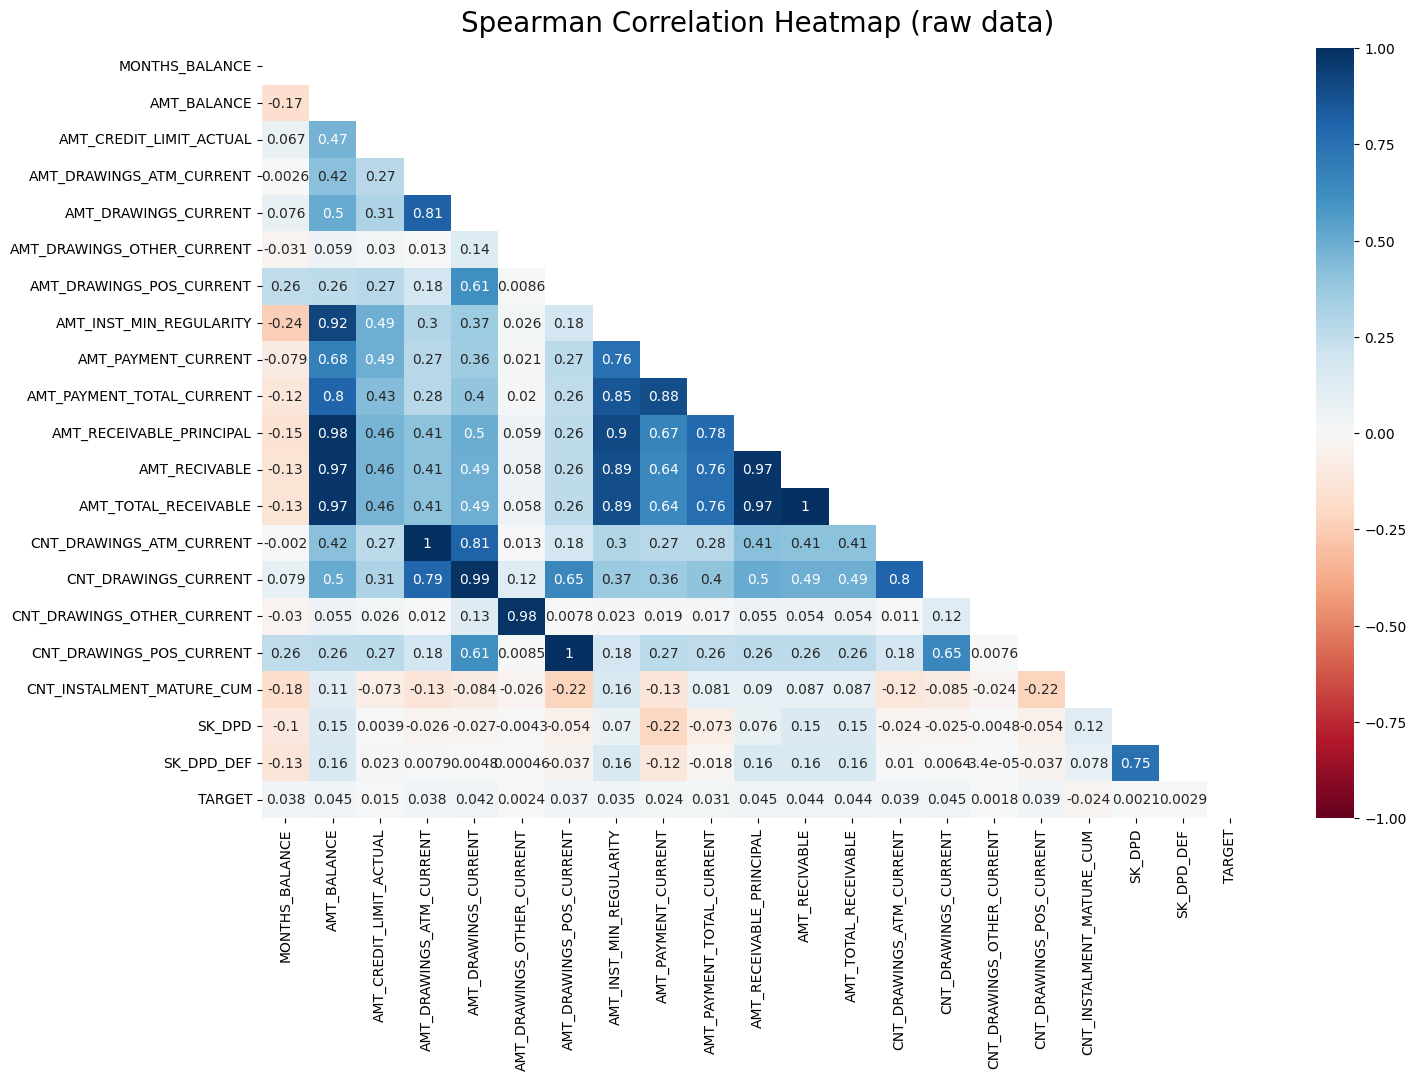

In [109]:
plt.figure(figsize=(16,10))
mask = np.triu(np.ones_like(spearman_corr, dtype=bool))
heatmap = sns.heatmap(spearman_corr, annot=True, mask=mask, cmap='RdBu', vmin=-1, vmax=1)
heatmap.set_title('Spearman Correlation Heatmap (raw data)', fontdict={'fontsize':20}, pad=12)
plt.show()

All the strong correlations that were observed with the phi-k correlation are found to be positive here. Again, no correlations are seen with the target variable. 

## Exploring variables: 

Variables chosen to be explored are: 
- months_balance, 
- amt_balance, 
- amt_credit_limit_actual,
- amt_drawings_current,
- amt_inst_min_regularity
- amt_payment_total_current
- amt_total_receivable, 
- cnt_instalment_mature_cum,
- sk_dpd, and
- name_contract_status.

## Numerical variables: 

#### MONTHS_BALANCE: 

Exploring MONTHS_BALANCE
No missing values


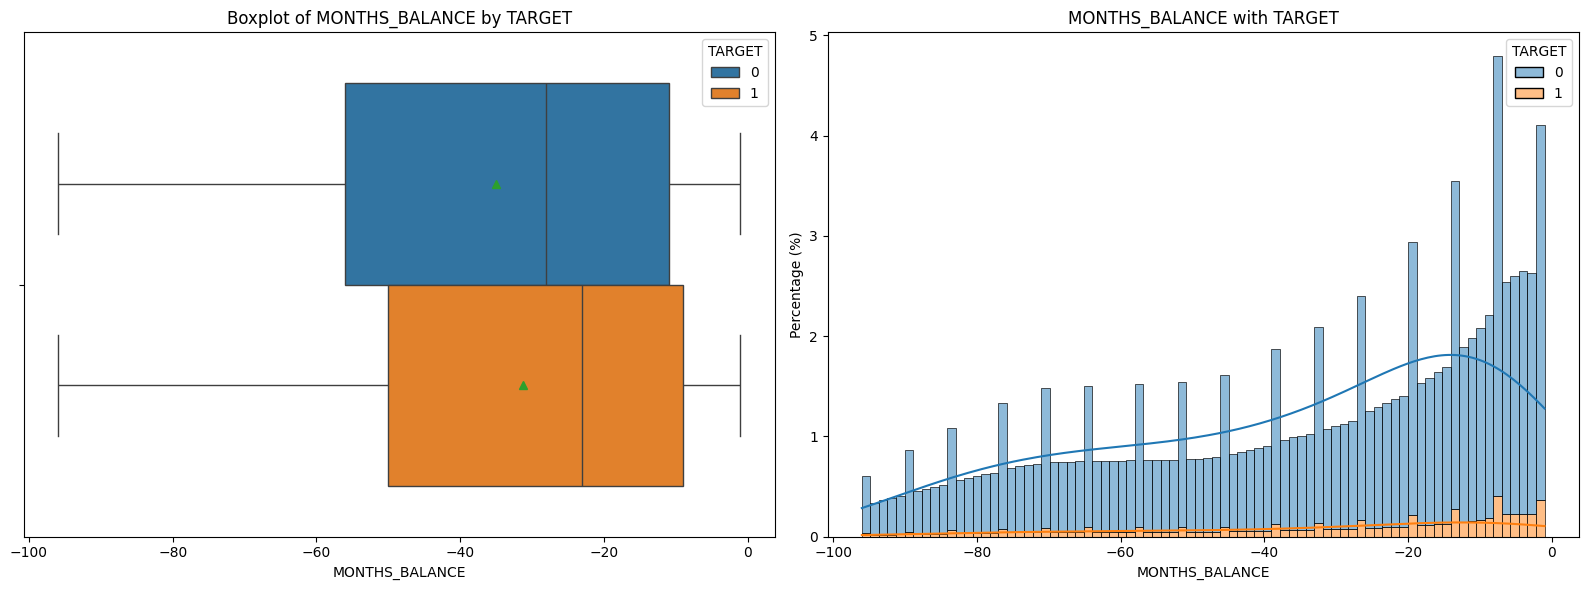

In [110]:
explore_numerical('MONTHS_BALANCE', missing_credit_card, credit_card_balance_train)

A similar distribution to previous monthly balance variables in other tables is seen here, where more monthly balance data is available closer to the application date. 

#### AMT_BALANCE: 

Exploring AMT_BALANCE
No missing values


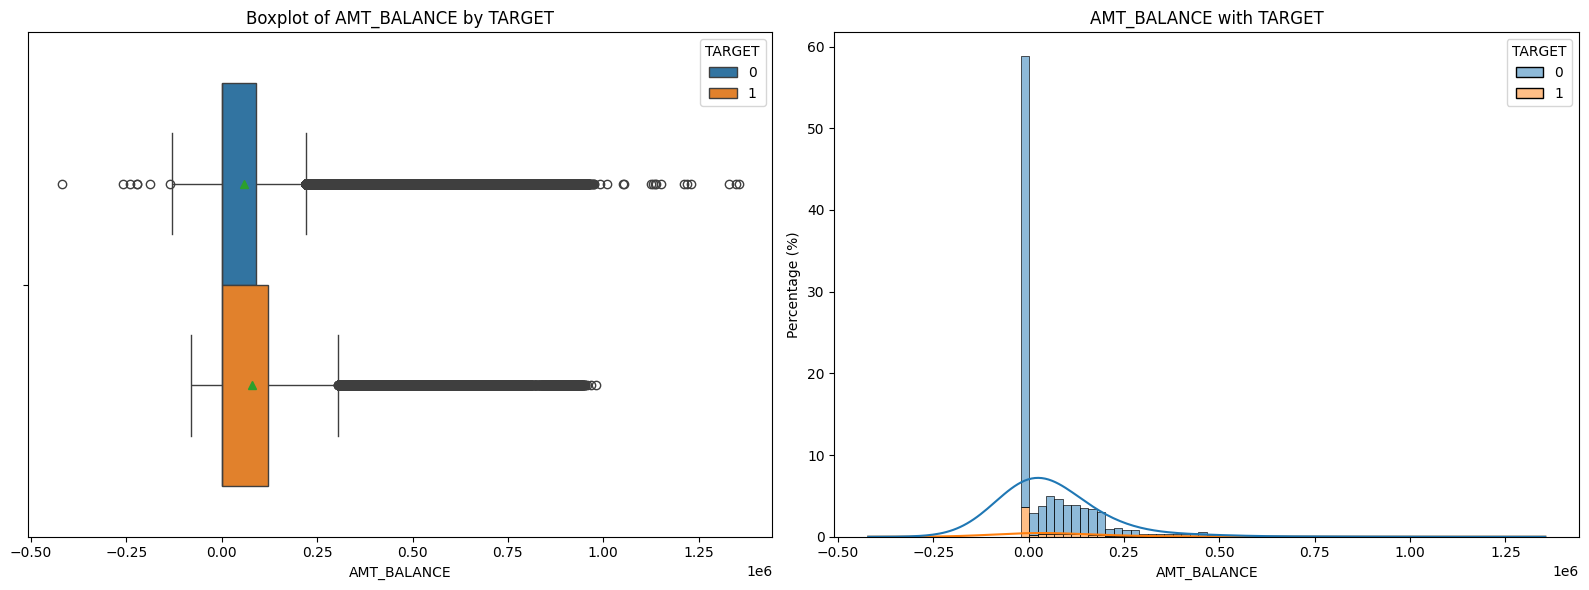

In [111]:
explore_numerical('AMT_BALANCE', missing_credit_card, credit_card_balance_train)

Quite a few monthly balances are 0, so an indicator variable can be added: 

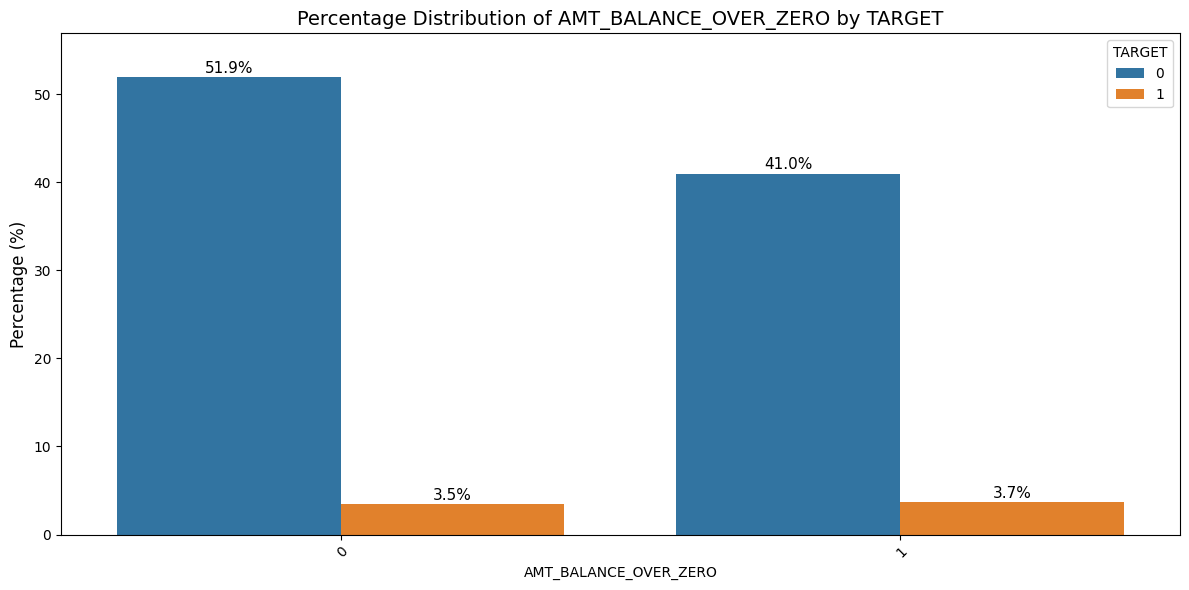

In [112]:
credit_card_balance_train['AMT_BALANCE_OVER_ZERO'] = (credit_card_balance_train['AMT_BALANCE'] > 0).astype(int)
plot_category(credit_card_balance_train, 'AMT_BALANCE_OVER_ZERO')

Slightly more customers with amt_balance greater than zero have defaulted as compared to the other group.

#### AMT_CREDIT_LIMIT_ACTUAL

Exploring AMT_CREDIT_LIMIT_ACTUAL
No missing values


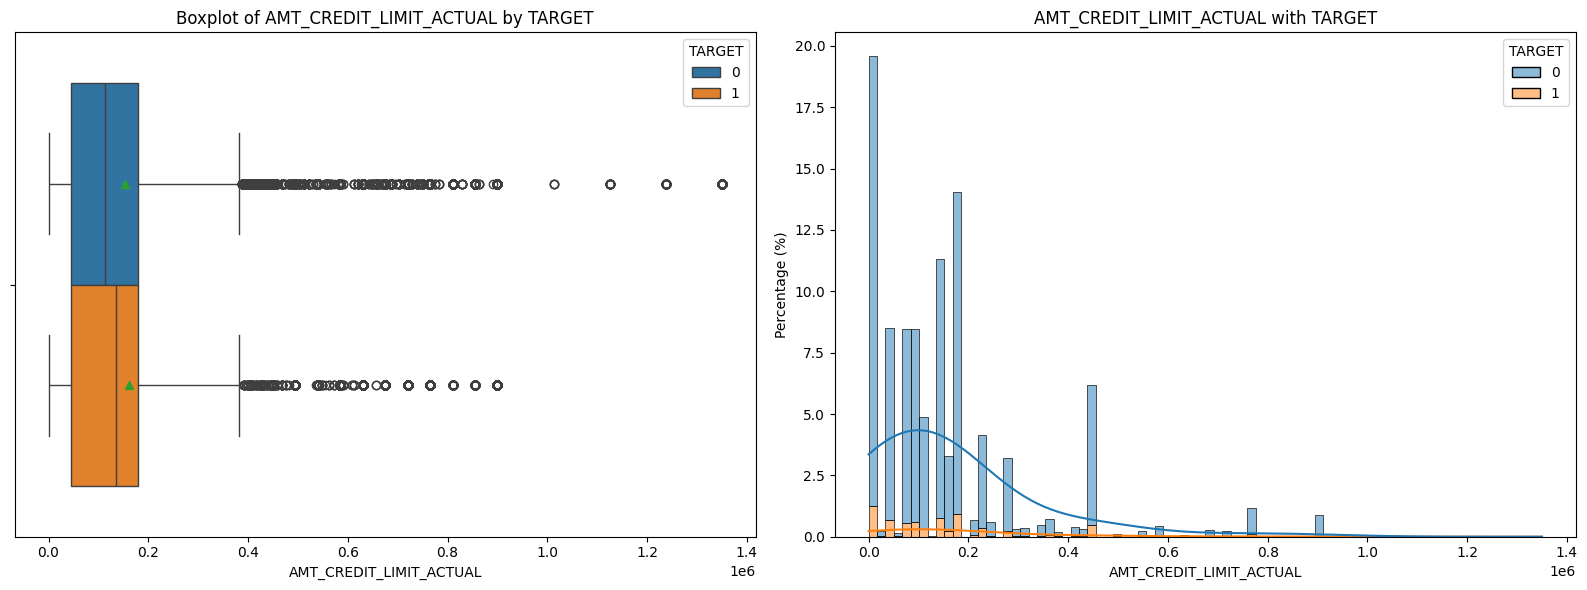

In [113]:
explore_numerical('AMT_CREDIT_LIMIT_ACTUAL', missing_credit_card, credit_card_balance_train)

Higher outliers are present for non-defaulting customers. The distribution is right tailed with quite a few outliers.

#### AMT_DRAWINGS_CURRENT

Exploring AMT_DRAWINGS_CURRENT
No missing values


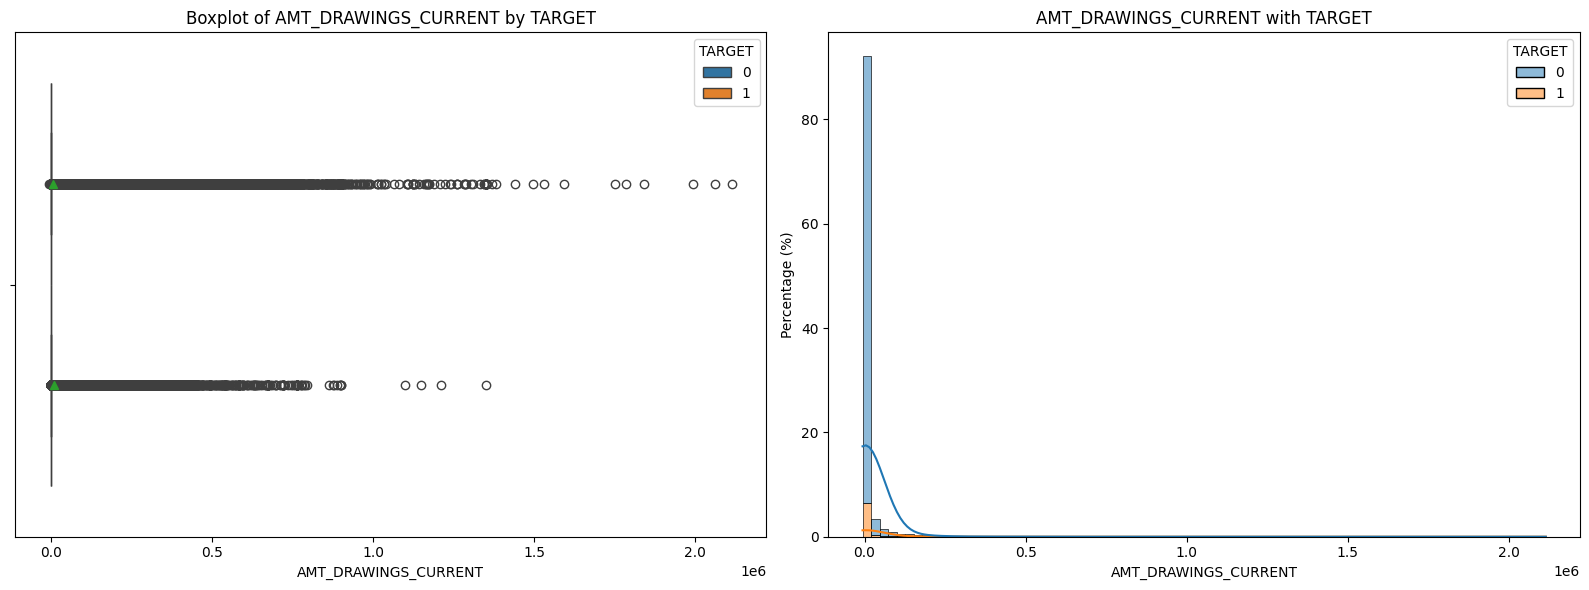

In [114]:
explore_numerical('AMT_DRAWINGS_CURRENT', missing_credit_card, credit_card_balance_train)

Over 80% of this variable is equal to zero, so an indicator variable is added: 

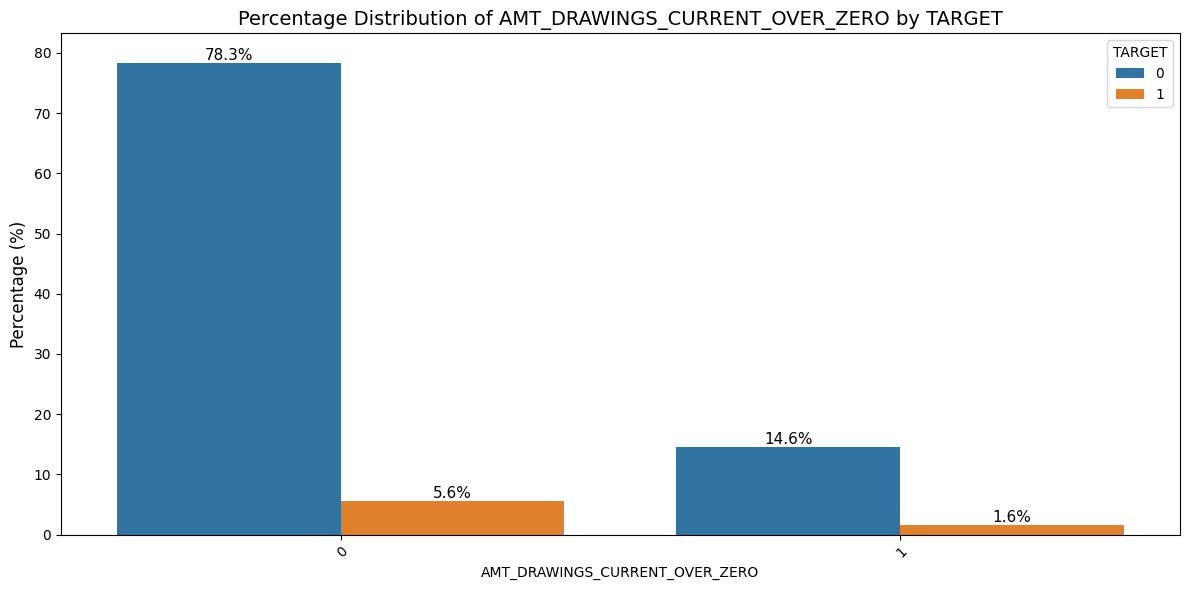

In [115]:
credit_card_balance_train['AMT_DRAWINGS_CURRENT_OVER_ZERO'] = (credit_card_balance_train['AMT_DRAWINGS_CURRENT'] > 0).astype(int)
plot_category(credit_card_balance_train, 'AMT_DRAWINGS_CURRENT_OVER_ZERO')

No obvious difference is seen between the target groups. 

#### AMT_INST_MIN_REGULARITY

Exploring AMT_INST_MIN_REGULARITY
Missing number        305236.000000
Missing percentage         7.948208
Name: AMT_INST_MIN_REGULARITY, dtype: float64 



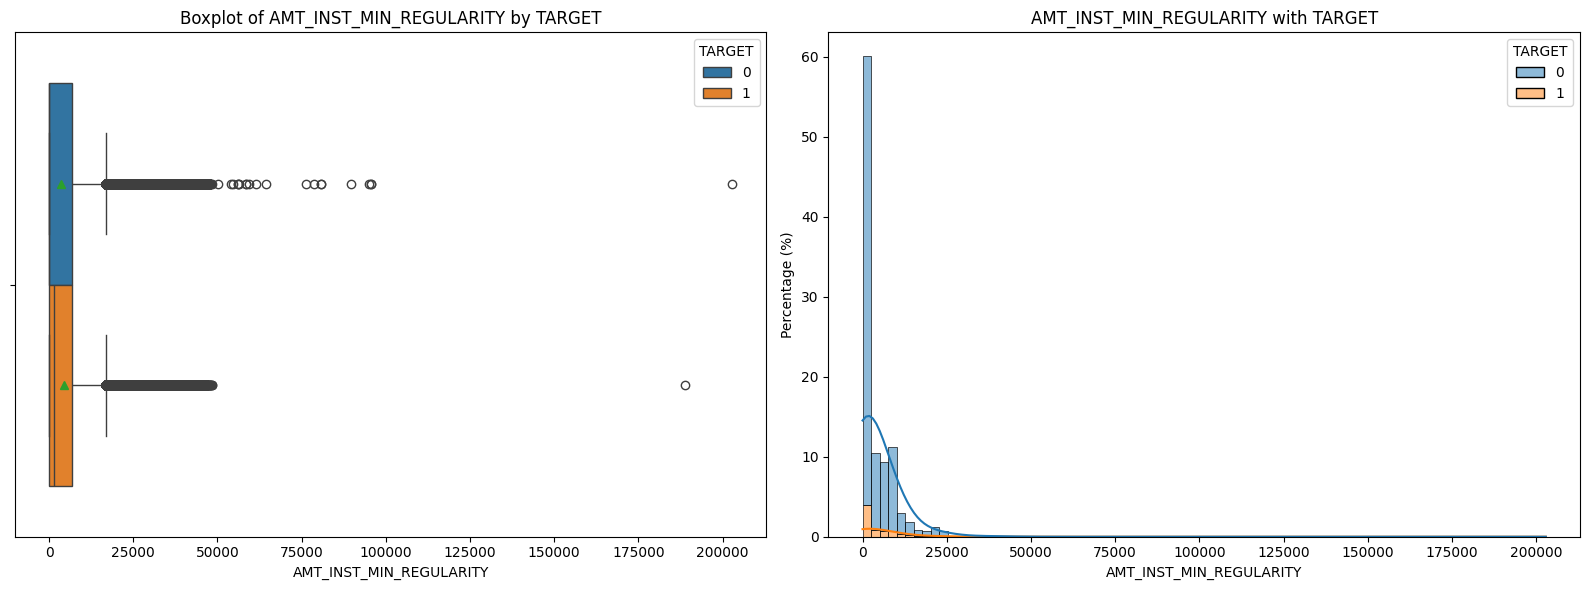

In [116]:
explore_numerical('AMT_INST_MIN_REGULARITY', missing_credit_card, credit_card_balance_train)

This distribution is also right tailed with many outliers. Again, quite a few values of this variable are equal to zero, and an indicator column is added: 

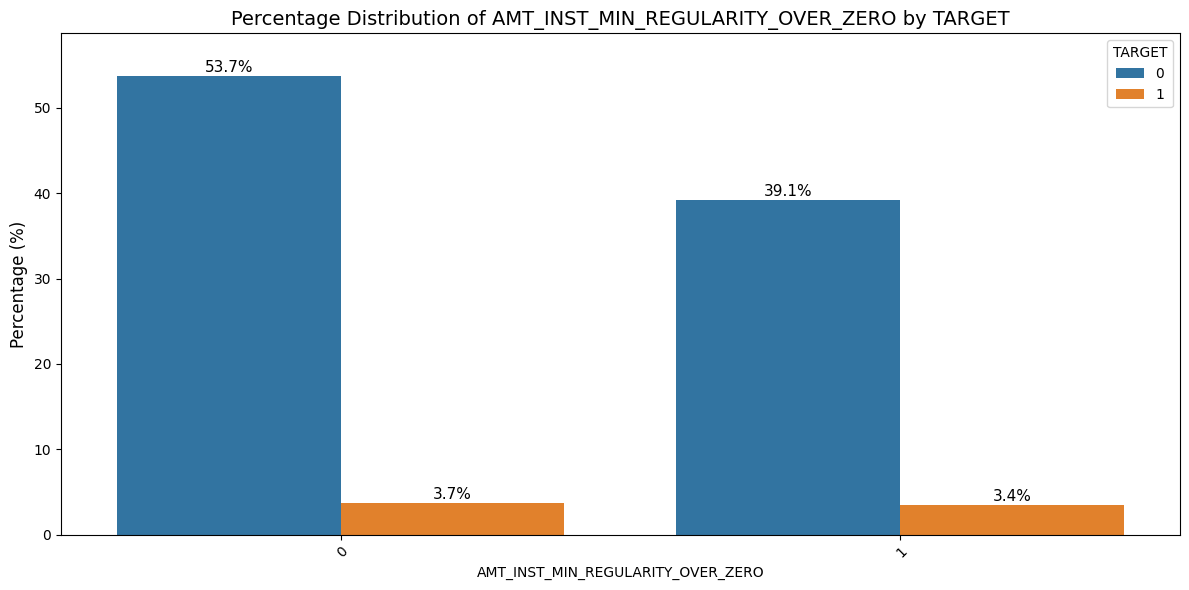

In [117]:
credit_card_balance_train['AMT_INST_MIN_REGULARITY_OVER_ZERO'] = (credit_card_balance_train['AMT_INST_MIN_REGULARITY'] > 0).astype(int)
plot_category(credit_card_balance_train, 'AMT_INST_MIN_REGULARITY_OVER_ZERO')

No clear difference is seen between defaulters and non defaulters.

#### AMT_PAYMENT_CURRENT

Exploring AMT_PAYMENT_CURRENT
Missing number        767988.000000
Missing percentage        19.998063
Name: AMT_PAYMENT_CURRENT, dtype: float64 



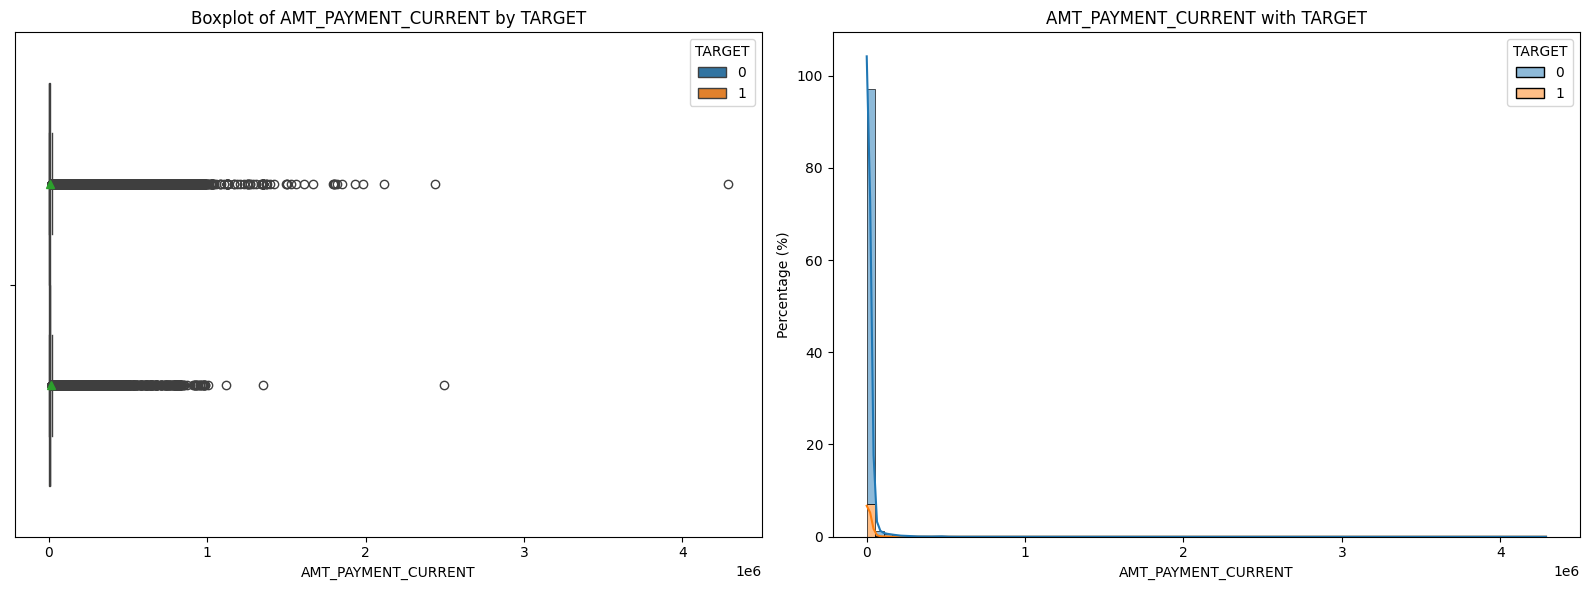

In [118]:
explore_numerical('AMT_PAYMENT_CURRENT', missing_credit_card, credit_card_balance_train)

To have a better look at the distribution, the largest outlier can be clipped and the whole distribution log-transformed: 

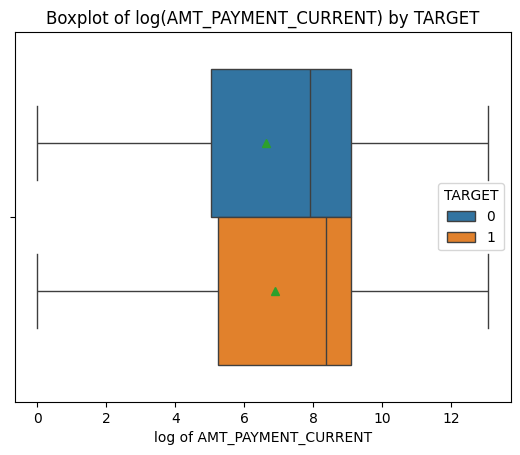

In [119]:
upper_limit = credit_card_balance_train['AMT_PAYMENT_CURRENT'].quantile(0.999)
credit_card_balance_train['AMT_PAYMENT_CURRENT'] = credit_card_balance_train['AMT_PAYMENT_CURRENT'].clip(upper=upper_limit)
credit_card_balance_train['log1_AMT_PAYMENT_CURRENT'] = np.log1p(credit_card_balance_train['AMT_PAYMENT_CURRENT'])
sns.boxplot(data=credit_card_balance_train, x='log1_AMT_PAYMENT_CURRENT', hue='TARGET', showmeans=True).set(title=f'Boxplot of log(AMT_PAYMENT_CURRENT) by TARGET', xlabel='log of AMT_PAYMENT_CURRENT');

No significant difference is seen between the target distributions.

#### AMT_TOTAL_RECEIVABLE

Exploring AMT_TOTAL_RECEIVABLE
No missing values


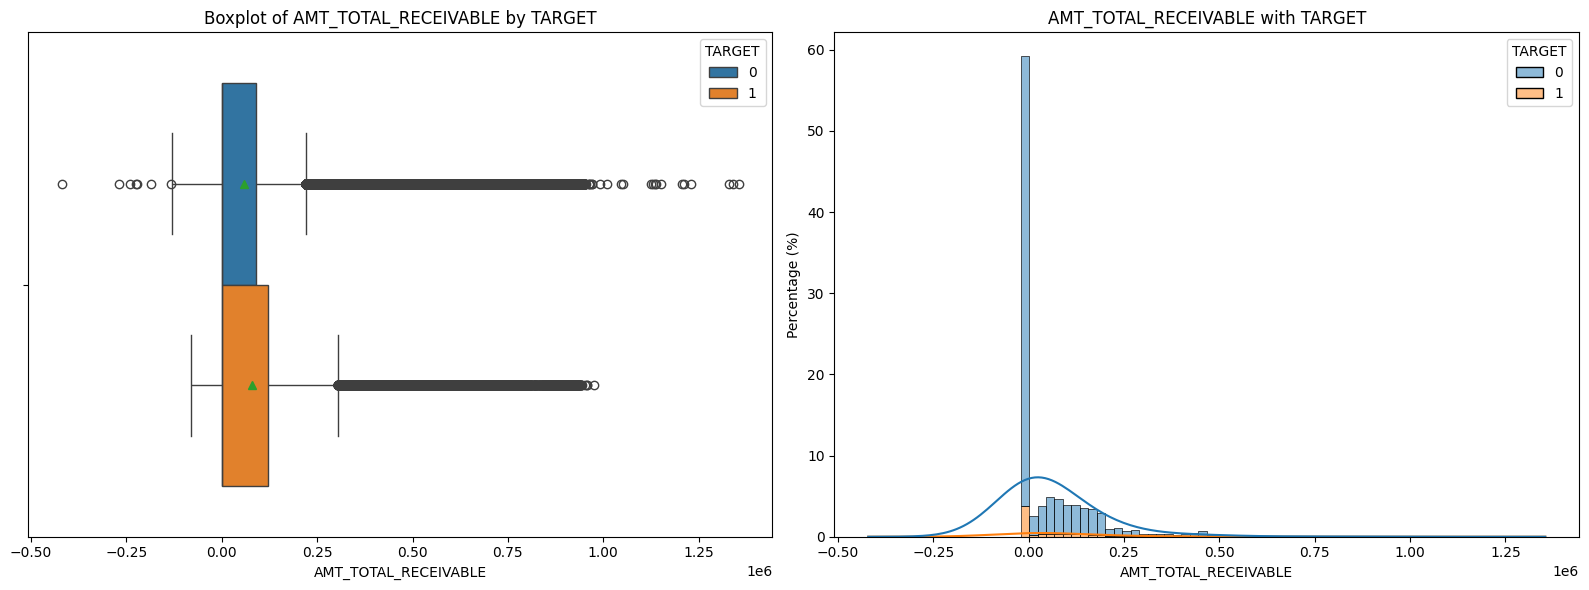

In [120]:
explore_numerical('AMT_TOTAL_RECEIVABLE', missing_credit_card, credit_card_balance_train)

Many outliers are present for this distribution, and non-defaulters have more negative outliers than defaulters. Again, quite a few zero values are present and an indicator column is added: 

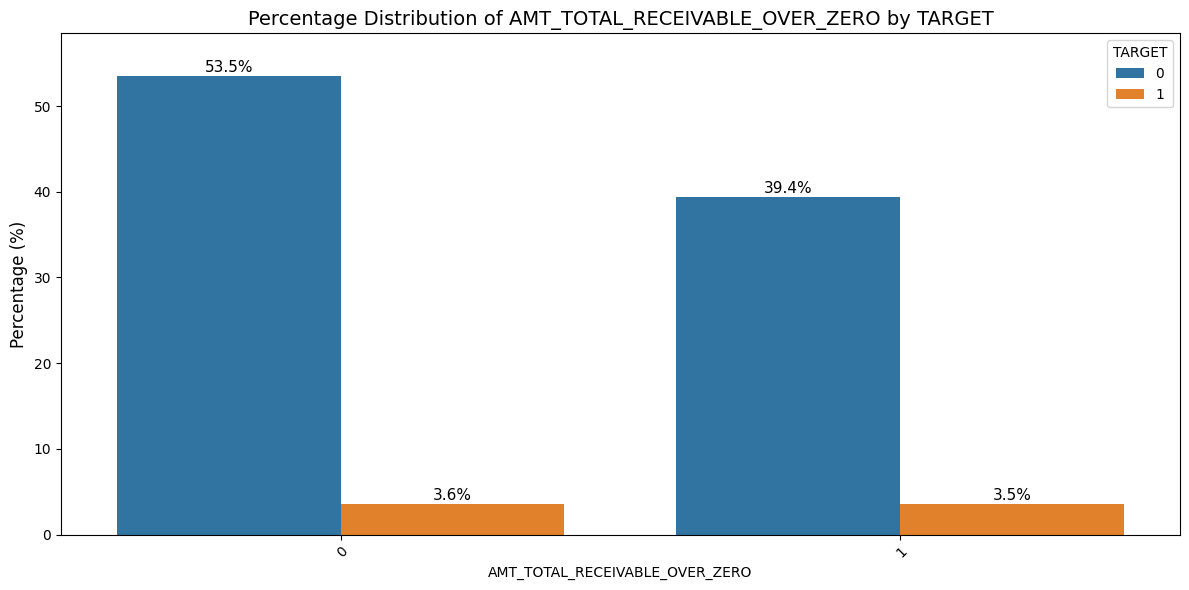

In [121]:
credit_card_balance_train['AMT_TOTAL_RECEIVABLE_OVER_ZERO'] = (credit_card_balance_train['AMT_TOTAL_RECEIVABLE'] > 0).astype(int)
plot_category(credit_card_balance_train, 'AMT_TOTAL_RECEIVABLE_OVER_ZERO')

It seems that more defaulting customers have an amt_total_receivabel over zero than non-defaulters.

#### CNT_INSTALMENT_MATURE_CUM

Exploring CNT_INSTALMENT_MATURE_CUM
Missing number        305236.000000
Missing percentage         7.948208
Name: CNT_INSTALMENT_MATURE_CUM, dtype: float64 



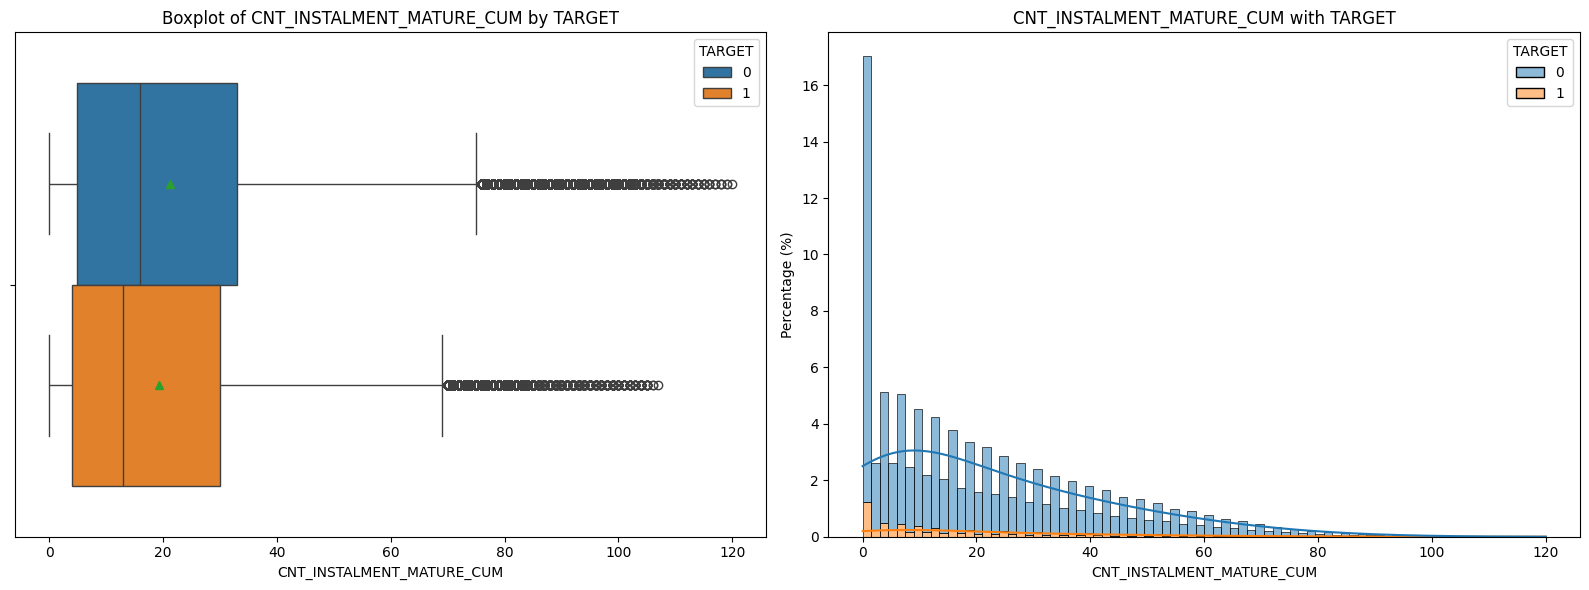

In [122]:
explore_numerical('CNT_INSTALMENT_MATURE_CUM', missing_credit_card, credit_card_balance_train)

The distribution for defaulting customers is shifted slightly to the left with respect to the distribution of non-defaulting customers. This indicates that defaulting customers have less paid installments on their previous credit than non-defaultling customers.

#### SK_DPD

Exploring SK_DPD
No missing values


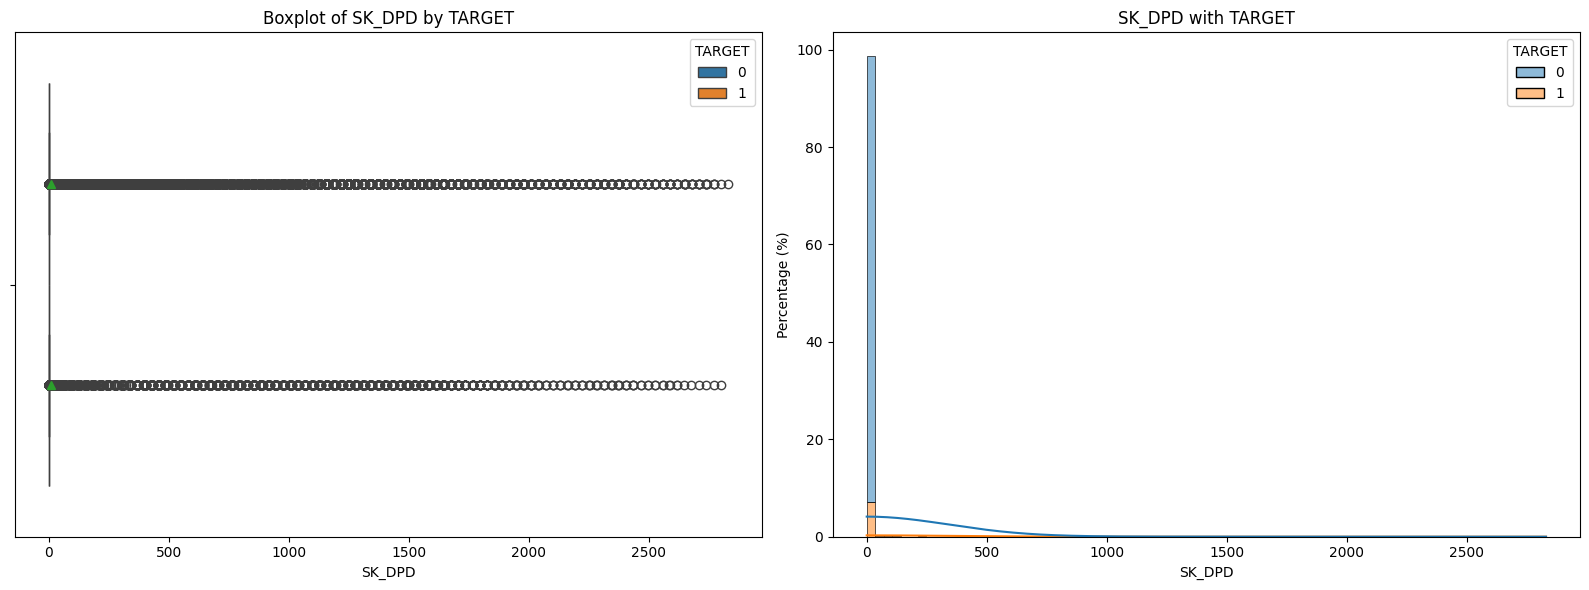

In [123]:
explore_numerical('SK_DPD', missing_credit_card, credit_card_balance_train)

In general, no customers have any days past due on their previous monthly credit, as seen when an indicator variable is added: 

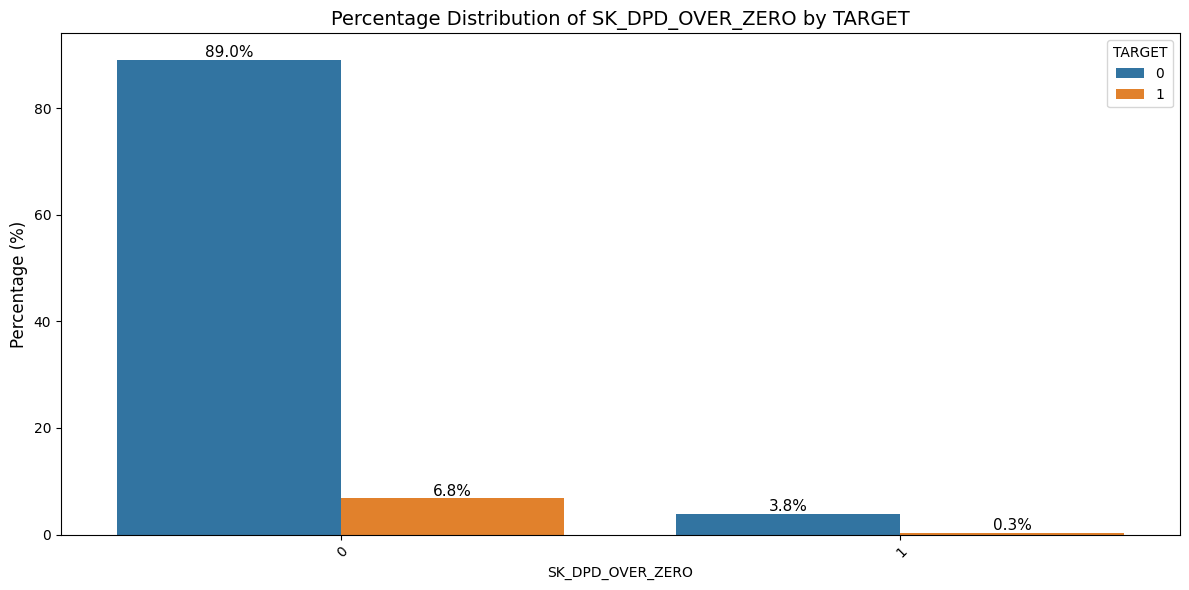

In [124]:
credit_card_balance_train['SK_DPD_OVER_ZERO'] = (credit_card_balance_train['SK_DPD'] > 0).astype(int)
plot_category(credit_card_balance_train, 'SK_DPD_OVER_ZERO')

In general, most numerical variables are highly skewed to the right with most entries equal to zero. 

## Categorical variables: 

Exploring NAME_CONTRACT_STATUS
No missing values


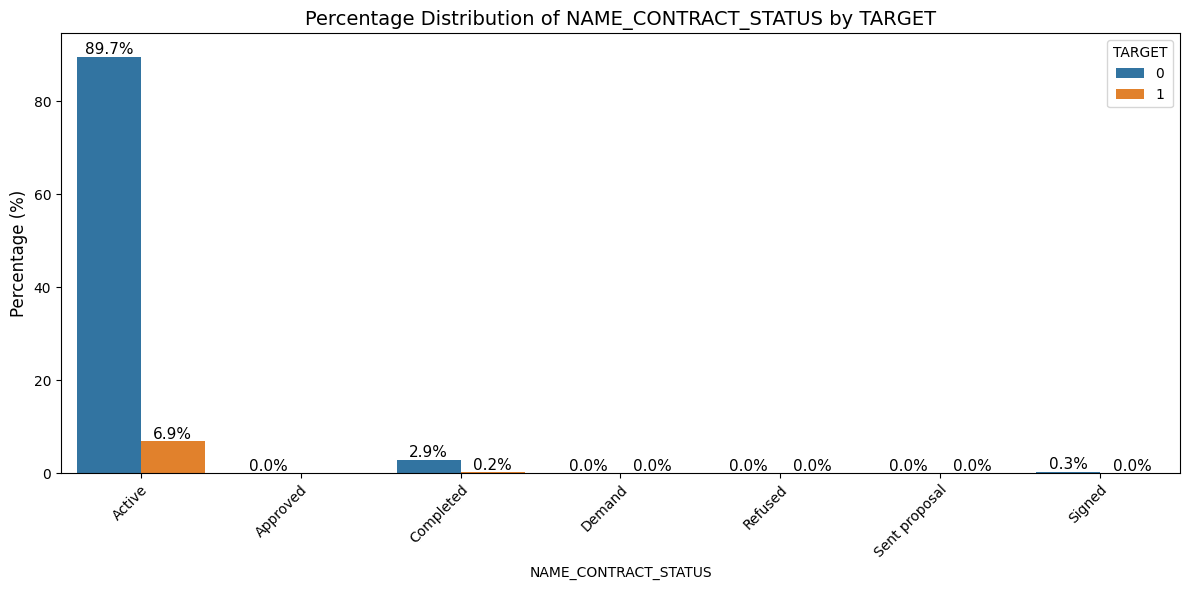

In [125]:
explore_category('NAME_CONTRACT_STATUS', missing_credit_card, credit_card_balance_train)

Most contract statuses are active. 

# Previous_application

This table shows information about a Home Credit customer's previous loan applications. 

## Initial table examination: 

In [ ]:
previous_application = pd.read_csv('../tables/previous_application.csv', sep=',')
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [127]:
prev_objects = previous_application.select_dtypes(include=['object'])

Adding in the target column: 

In [128]:
previous_application_train = previous_application.merge(
    train[['SK_ID_CURR', 'TARGET']],
    on='SK_ID_CURR',
    how='inner' 
)

As before, the SK_ID_CURR column links this table to the application_train or _test tables, and the SK_ID_PREV column is an identifier for the ID of previous credits. These ID columns can be used to link tables as shown in the table connections image. 

Looking at the basic information about this table: 

In [129]:
print_df_info(previous_application)

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT         

This table has about 1.7 million entries with 37 features. Of these features, 15 of them are of type float64, 6 of them are of type int64, and 14 of them are of type object. 

### Duplicate values

In [130]:
print_dup_info(previous_application, 'SK_ID_PREV', 'SK_ID_CURR')

Duplicated rows in dataframe: 0
Duplicated 'SK_ID_PREV' in dataframe: 0
Duplicated 'SK_ID_CURR' in dataframe: 1331357
Number of duplicate values present in dataframe excluding 'SK_ID_PREV' and 'SK_ID_CURR': 271453


Many ID_CURR values are duplicated in this table, many current loans can have previous loan applications related to them. 

Many duplicate values are present excluding the ID columns. Looking at these: 

In [131]:
previous_application_features = previous_application.drop(['SK_ID_PREV', 'SK_ID_CURR'], axis=1)
add_dup_counts(previous_application_features)

NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
553452          Cash loans          NaN              0.0         0.0   
553272          Cash loans          NaN              0.0         0.0   
553401          Cash loans          NaN              0.0         0.0   
482933          Cash loans          NaN              0.0         0.0   
553249          Cash loans          NaN              0.0         0.0   
...                    ...          ...              ...         ...   
519527          Cash loans          NaN              0.0         0.0   
519531          Cash loans          NaN              0.0         0.0   
519542          Cash loans          NaN              0.0         0.0   
519548          Cash loans          NaN              0.0         0.0   
1464518                XNA          NaN              0.0         0.0   

         AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
553452                NaN              NaN                  WEDNESDAY   
553272                NaN              NaN                  WEDNESDAY   
553401                NaN              NaN                  WEDNESDAY   
482933                NaN              NaN                     MONDAY   
553249                NaN              NaN                  WEDNESDAY   
...                   ...              ...                        ...   
519527                NaN              NaN                   THURSDAY   
519531                NaN              NaN                   THURSDAY   
519542                NaN              NaN                   THURSDAY   
519548                NaN              NaN                   THURSDAY   
1464518               NaN              NaN                    TUESDAY   

         HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
553452                        10                           Y   
553272                        10                           Y   
553401                        10                           Y   
482933                        11                           Y   
553249                        10                           Y   
...                          ...                         ...   
519527                        10                           Y   
519531                        10                           Y   
519542                        10                           Y   
519548                        10                           Y   
1464518                       16                           Y   

         NFLAG_LAST_APPL_IN_DAY  ...  CNT_PAYMENT  NAME_YIELD_GROUP  \
553452                        1  ...          NaN               XNA   
553272                        1  ...          NaN               XNA   
553401                        1  ...          NaN               XNA   
482933                        1  ...          NaN               XNA   
553249                        1  ...          NaN               XNA   
...                         ...  ...          ...               ...   
519527                        1  ...          NaN               XNA   
519531                        1  ...          NaN               XNA   
519542                        1  ...          NaN               XNA   
519548                        1  ...          NaN               XNA   
1464518                       1  ...          NaN               XNA   

         PRODUCT_COMBINATION DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
553452                  Cash                NaN            NaN   
553272                  Cash                NaN            NaN   
553401                  Cash                NaN            NaN   
482933                  Cash                NaN            NaN   
553249                  Cash                NaN            NaN   
...                      ...                ...            ...   
519527                  Cash                NaN            NaN   
519531                  Cash                NaN            NaN   
519542                  Cash                NaN   

The above dataframe shows a list of duplicate rows in the bureau table with the number of times each row is present. Most of these duplicated rows are missing a lot of values with loans of type cash.

These duplicate values (not considering the ID columns) will be kept, as it is probable that multiple customers have this same set of features in a dataset this large.

### Missing values:

Now, missing values can be examined: 

In [132]:
missing_previous_application, no_missing_previous_application = get_missing_df_info(previous_application)
missing_previous_application

Empty strings: (array([], dtype=int64), array([], dtype=int64))
XNA strings: (array([      0,       1,       1, ..., 1670213, 1670213, 1670213],
      shape=(5072473,)), array([24, 15, 18, ..., 15, 22, 27], shape=(5072473,)))
Percentage of total rows with missing values: 99.99574904772682


Missing number  Missing percentage
RATE_INTEREST_PRIVILEGED          1664263           99.643698
RATE_INTEREST_PRIMARY             1664263           99.643698
AMT_DOWN_PAYMENT                   895844           53.636480
RATE_DOWN_PAYMENT                  895844           53.636480
NAME_TYPE_SUITE                    820405           49.119754
NFLAG_INSURED_ON_APPROVAL          673065           40.298129
DAYS_TERMINATION                   673065           40.298129
DAYS_LAST_DUE                      673065           40.298129
DAYS_LAST_DUE_1ST_VERSION          673065           40.298129
DAYS_FIRST_DUE                     673065           40.298129
DAYS_FIRST_DRAWING                 673065           40.298129
AMT_GOODS_PRICE                    385515           23.081773
AMT_ANNUITY                        372235           22.286665
CNT_PAYMENT                        372230           22.286366
PRODUCT_COMBINATION                   346            0.020716
AMT_CREDIT                              1            0.000060

Essentially all rows in this dataframe have at least one missing values, and the RATE_INTEREST_PRIVELEGED and RATE_INTEREST_PRIMARY columns are essentially all missing. 

Looking at the missing values heatmap gives: 

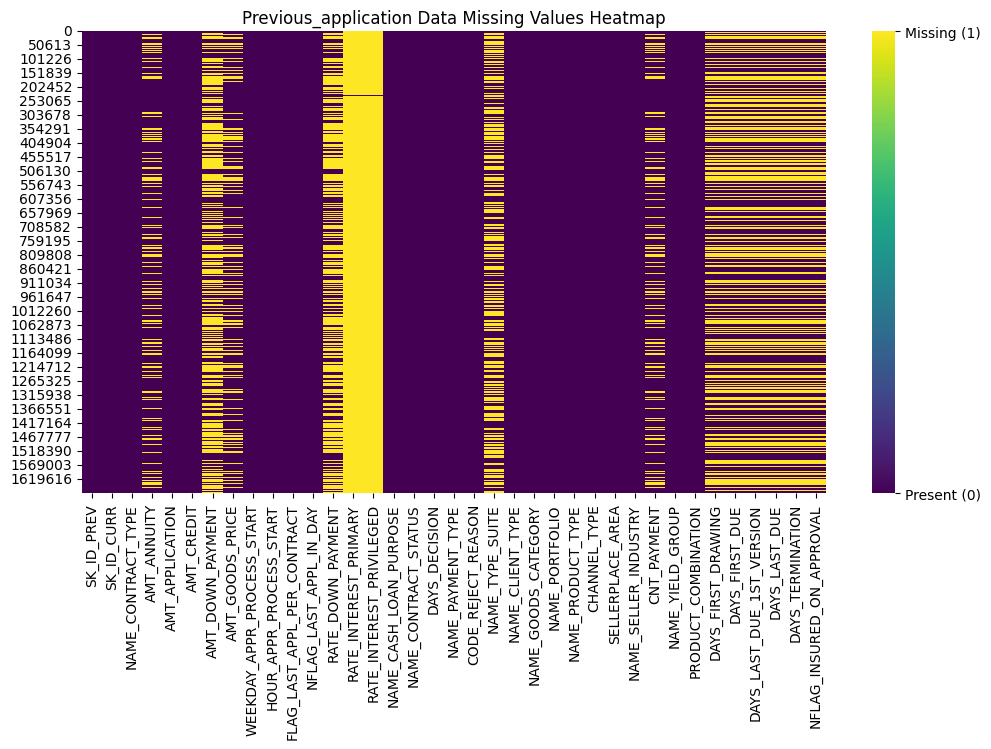

In [133]:
plt.figure(figsize=(12,6))
ax = sns.heatmap(previous_application.isnull(), cbar=True, cmap="viridis", vmin=0, vmax=1)
colorbar = ax.collections[0].colorbar

colorbar.set_ticks([0, 1])
colorbar.set_ticklabels(['Present (0)', 'Missing (1)'])
plt.title("Previous_application Data Missing Values Heatmap")
plt.show()

From this, it is obvious that the RATE_INTEREST_PRIVILEGED and RATE_INTEREST_PRIMARY columns are missing essentially all data. Quite a few columns are not missing any data, and it seems that the DAYS_* columns are missing data in the same places. 


### Chi-squared test for missing values

From these charts, it is clear that the variables with the most missing values are related to the building where a client lives. In general, no patterns are seen with these missing values. Performing a chi-squared test with null values from each category compared to the TARGET variable will tell if a correlation is present or not in the training data. 

Here the **null hypothesis** is that there is no relationship between the TARGET variable and whether a value is missing or not in a given feature. 

The **alternate hypothesis** is that there is a statistically significant relationship between the TARGET variable and a feature's absence of values. 

In addition, if a relationship is found between the presence of missing values and the TARGET, an indicator column is added to a modified dataset (train_). The chi-squared tests are done at the 95% confidence level: 

In [134]:
previous_application_indicator_cols = []

In [135]:
alpha = 0.05
train_ = previous_application_train.copy()
for x in previous_application_train.columns:
    contingency_table = pd.crosstab(previous_application_train['TARGET'], previous_application_train[f'{x}'].isnull())
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print('contingengy table \n', contingency_table)
    print(f"Chi-Squared Statistic: {chi2}")
    print(f"p-value: {p}")
    print(f"Degrees of Freedom: {dof}")
    if p < alpha:
        print(f"Reject the null hypothesis - There is a relationship between TARGET and missing {x} values.")
        train_[f'{x}_missing'] = train_[f'{x}'].isnull().astype(int)
        previous_application_indicator_cols.append(f'{x}')
    else:
        print(f"Fail to reject the null hypothesis - There is no relationship between TARGET and missing {x} values.")
    print()


contingengy table 
 SK_ID_PREV    False
TARGET             
0           1291341
1            122360
Chi-Squared Statistic: 0.0
p-value: 1.0
Degrees of Freedom: 0
Fail to reject the null hypothesis - There is no relationship between TARGET and missing SK_ID_PREV values.

contingengy table 
 SK_ID_CURR    False
TARGET             
0           1291341
1            122360
Chi-Squared Statistic: 0.0
p-value: 1.0
Degrees of Freedom: 0
Fail to reject the null hypothesis - There is no relationship between TARGET and missing SK_ID_CURR values.

contingengy table 
 NAME_CONTRACT_TYPE    False
TARGET                     
0                   1291341
1                    122360
Chi-Squared Statistic: 0.0
p-value: 1.0
Degrees of Freedom: 0
Fail to reject the null hypothesis - There is no relationship between TARGET and missing NAME_CONTRACT_TYPE values.

contingengy table 
 AMT_ANNUITY    False   True 
TARGET                      
0            1014060  277281
1              92423   29937
Chi-Squared

Looking at the columns where missing values do have a relationship with the target variable: 

In [136]:
previous_application_indicator_cols

['AMT_ANNUITY',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 'RATE_DOWN_PAYMENT',
 'NAME_TYPE_SUITE',
 'CNT_PAYMENT',
 'PRODUCT_COMBINATION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

Quite a few of the variables with missing values seem to be correlated with the TARGET variable. An indicator variable for these relationships is added to the train_ dataset where this relationship is present. The missing values will be analyzed in detail when looking at selected variables one by one. 

Looking at the modified training data: 

In [137]:
train_.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... RATE_DOWN_PAYMENT_missing  \
0                       15  ...                         0   
1                       11  ...                         1   
2                       11  ...                         1   
3                        7  ...                         1   
4                        9  ...                         1   

   NAME_TYPE_SUITE_missing  CNT_PAYMENT_missing  PRODUCT_COMBINATION_missing  \
0                        1                    0                            0   
1                        0                    0                            0   
2                        0                    0                            0   
3                        1                    0                            0   
4                        1                    0                            0   

   DAYS_FIRST_DRAWING_missing DAYS_FIRST_DUE_missing  \
0                           0                      0   
1                           0                      0   
2                           0                      0   
3                           0                      0   
4                           1                      1   

  DAYS_LAST_DUE_1ST_VERSION_missing  DAYS_LAST_DUE_missing  \
0                                 0                      0   
1                                 0                      0   
2                                 0                      0   
3                                 0                      0   
4                                 1                      1   

  DAYS_TERMINATION_missing NFLAG_INSURED_ON_APPROVAL_missing  
0                        0                                 0  
1                        0                                 0  
2                        0                                 0  
3                        0                                 0  
4                        1                                 1  

[5 rows x 51 columns]

## Correlations: 

### Phi-k correlation: 

Identifying interval columns for the phi-k matrix: 

In [138]:
previous_application_train.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [139]:
phik_vars = previous_application_train.drop(['SK_ID_CURR', 'SK_ID_PREV'], axis=1)
float_features = previous_application_train.select_dtypes(include=['float64']).columns
interval_cols = float_features.union(['SELLERPLACE_AREA', 'DAYS_DECISION', 'HOUR_APPR_PROCESS_START'])

In [140]:
phik_overview = phik_vars.phik_matrix(interval_cols=interval_cols)


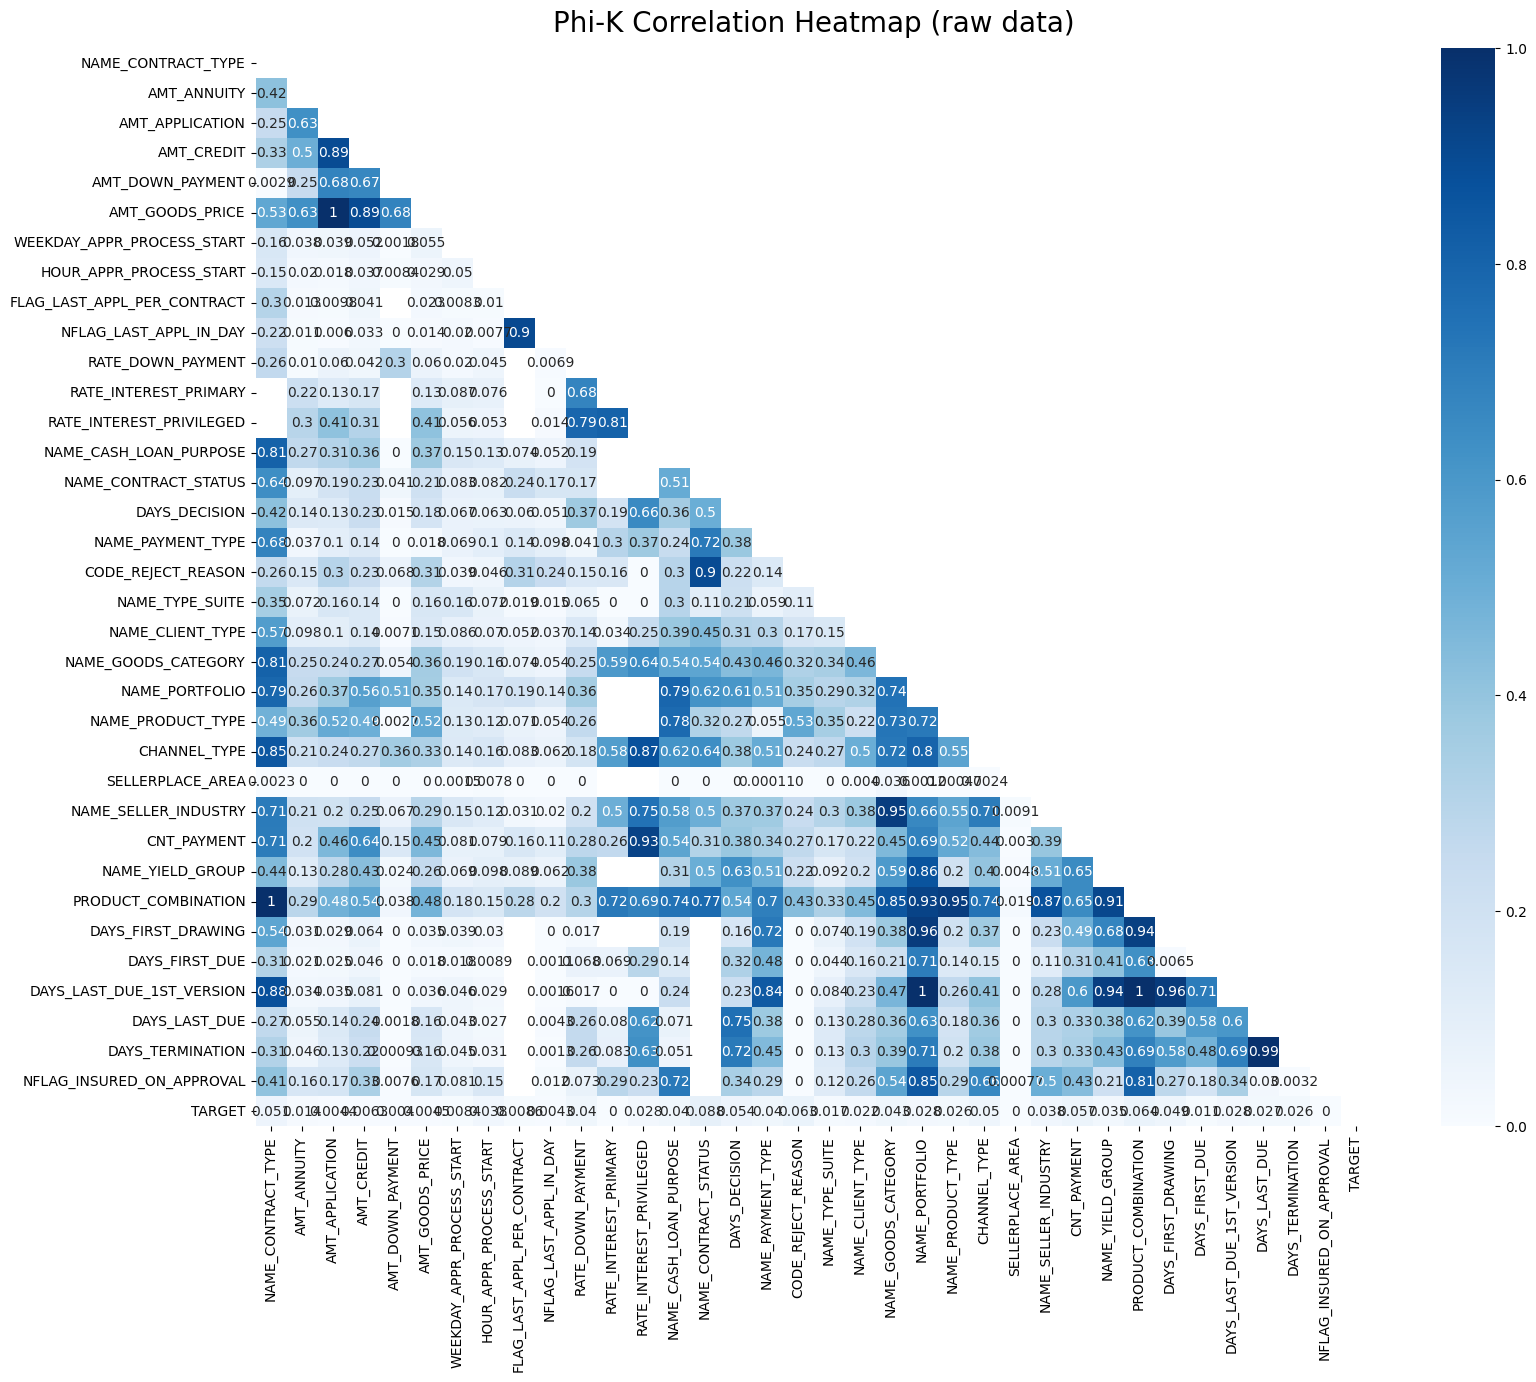

In [141]:
plt.figure(figsize=(18,14))
mask = np.triu(np.ones_like(phik_overview, dtype=bool))
heatmap = sns.heatmap(phik_overview, annot=True, mask=mask, cmap='Blues', vmin=0, vmax=1)
heatmap.set_title('Phi-K Correlation Heatmap (raw data)', fontdict={'fontsize':20}, pad=12)
plt.show()

There are too many variables present to see all relationships clearly, and some values were unable to be calculated. A couple observations include: 
- NAME_CONTRACT_TYPE seems to be correlated with quite a few other variables 
- NAME_PORTFOLIO also correlated with quite a few other variables. 
- AMT_* variables are correlated with each other, 
- DAYS_* variables also seem to be correlated with each other, and 
- SELLERPLACE_AREA, TARGET, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, FLAG_LAST_APPL_PER_CONTRACT, and NFLAG_LAST_APPL_IN_DAY are not correlated with other variables. Looking at the top correlations with the target variable: 

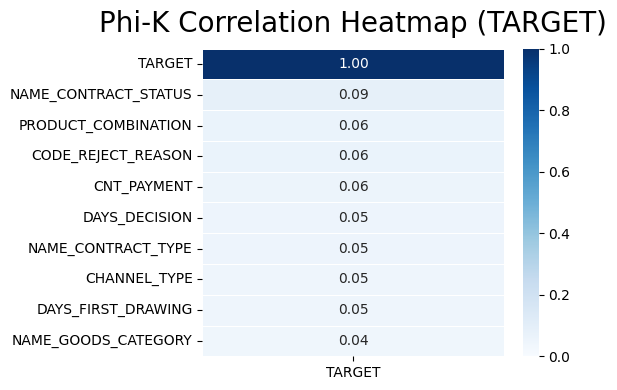

In [142]:
plt.figure(figsize=(6,4))

heatmap = sns.heatmap(phik_overview[['TARGET']].sort_values(by='TARGET', ascending=False).head(10), annot=True, cmap='Blues', vmin=0, vmax=1, cbar=True, fmt=".2f", linewidths=0.5)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=0, ha='center')
heatmap.set_title('Phi-K Correlation Heatmap (TARGET)', fontdict={'fontsize':20}, pad=12)
plt.tight_layout()
plt.show()

It seems like all variables have essentially no correlation with the target variable. 

### Spearman correlation: 

Looking at Spearman correlation for numeric variables: 

In [143]:
spearman_corr = previous_application_train.drop(['SK_ID_CURR', 'SK_ID_PREV'], axis=1).corr(method='spearman', numeric_only=True)

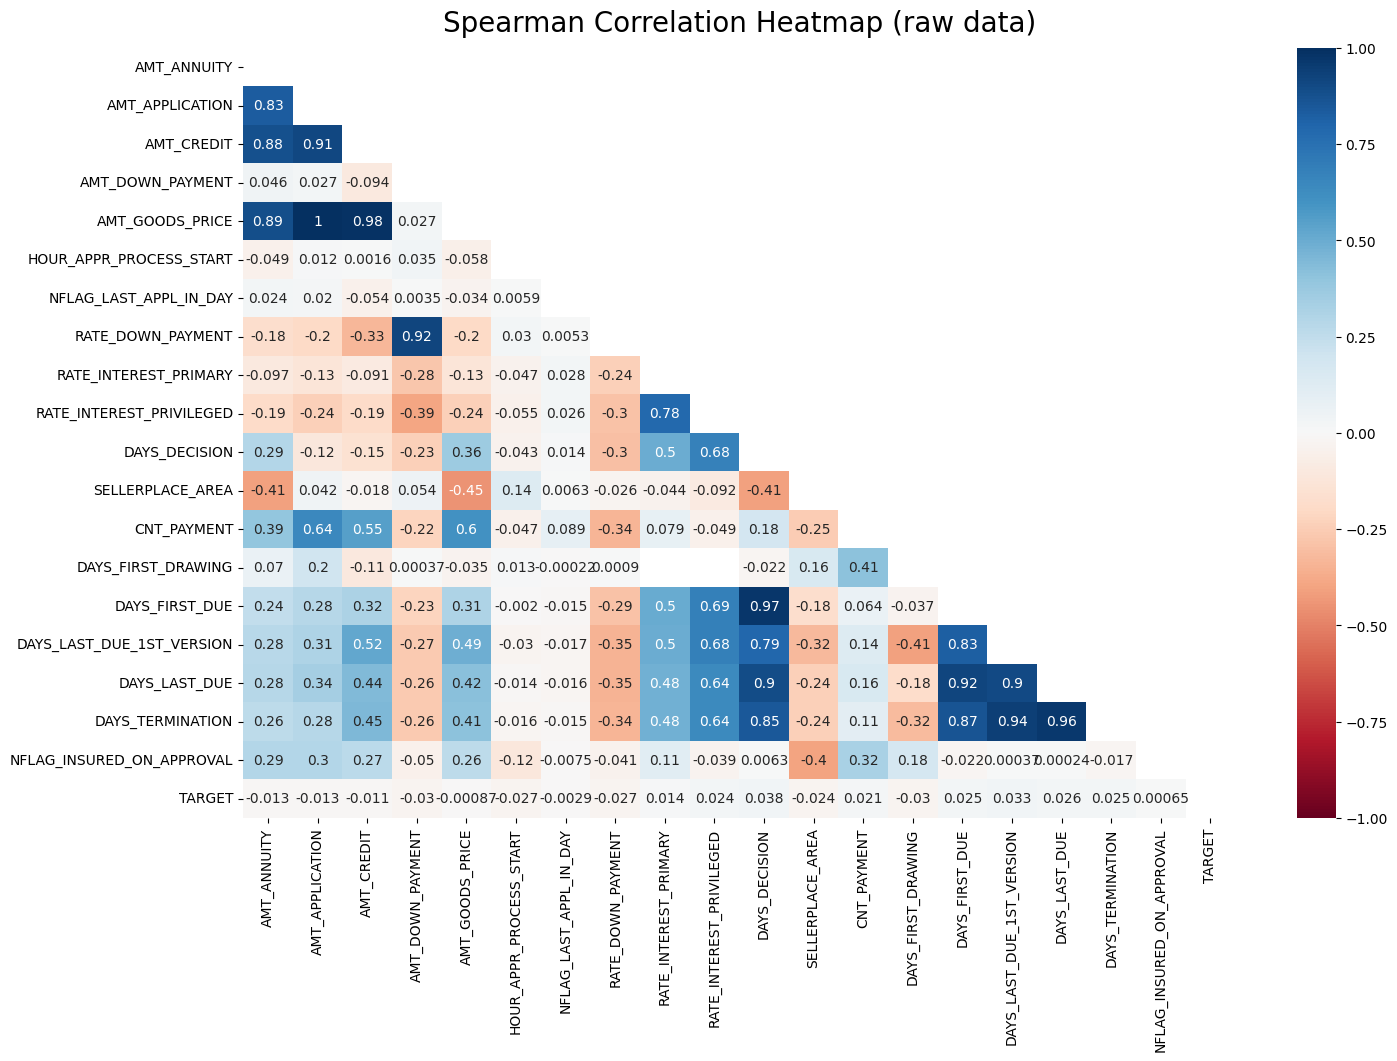

In [144]:
plt.figure(figsize=(16,10))
mask = np.triu(np.ones_like(spearman_corr, dtype=bool))
heatmap = sns.heatmap(spearman_corr, annot=True, mask=mask, cmap='RdBu', vmin=-1, vmax=1)
heatmap.set_title('Spearman Correlation Heatmap (raw data)', fontdict={'fontsize':20}, pad=12)
plt.show()

A couple observations include: 
- AMT_APPLICATION and AMT_CREDIT, and AMT_GOODS_PRICE are all strongly positively correlated with AMT_ANNUITY (0.83-0.89). 
- AMT_CREDIT and AMT_GOODS_PRICE are both strongly positively correlated with AMT_APPLICATION (0.91, 1).
- AMT_GOODS_PRICE and AMT_CREDIT have a strong positive correlation (0.98).
- DAYS_* variables are generally strongly positively correlated with most of the other DAYS_* variables (0.83-0.97).
- The strongest negative correlation is found between SELLERPLACE_AREA and AMT_GOODS_PRICE (-0.45). 


## Explore variables

Variables selected to be explored here are: 
- AMT_* variables, 
- RATE_INTEREST_PRIVILEGED, 
- DAYS_DECISION, DAYS_FIRST_DRAWING, DAYS_FIRST_DUE, 
- PRODUCT_COMBINATION, 
- NAME_CONTRACT_TYPE, 
- NAME_CASH_LOAN_PURPOSE, 
- NAME_CONTRACT_STATUS,
- NAME_GOODS_CATEGORY, 
- NAME_PORTFOLIO, and
- CHANNEL_TYPE.

### Numerical Variables

#### AMT_ANNUITY

Exploring AMT_ANNUITY
Missing number        372235.000000
Missing percentage        22.286665
Name: AMT_ANNUITY, dtype: float64 



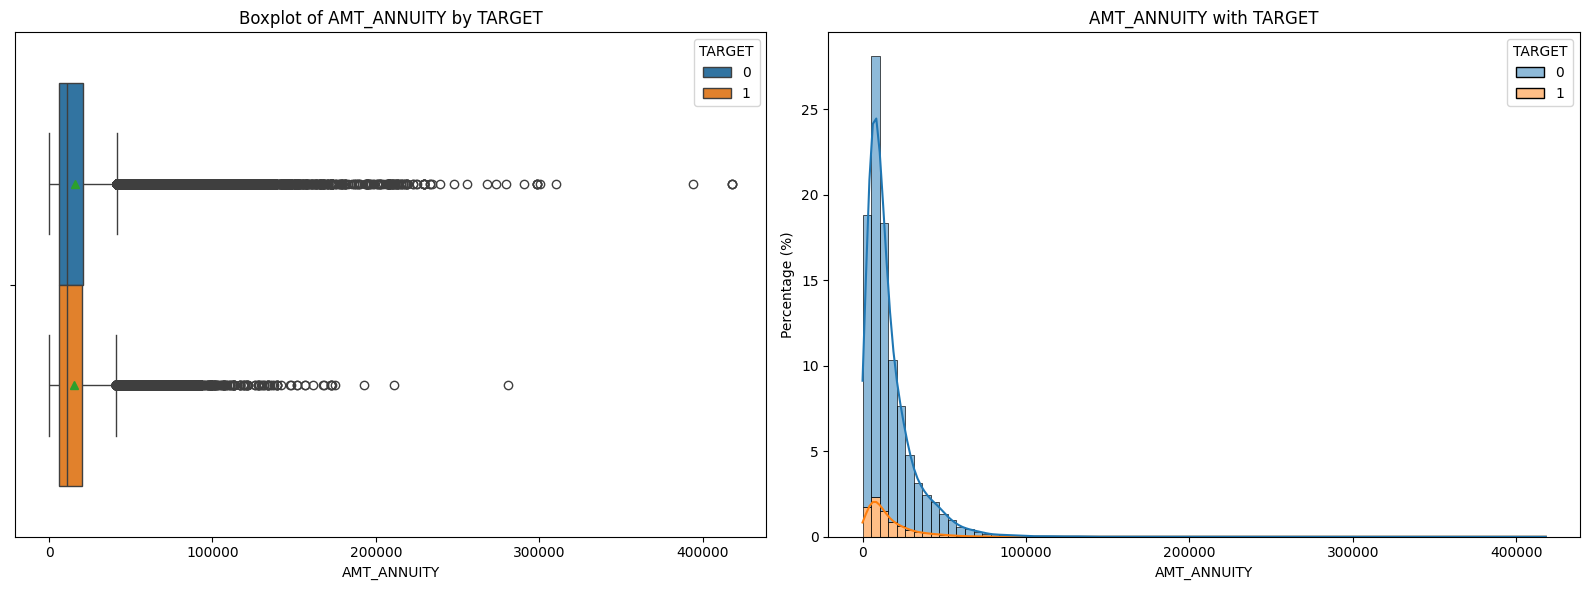

In [145]:
explore_numerical('AMT_ANNUITY', missing_previous_application, previous_application_train)

As this distribution is skewed to the right, a log transformation can be applied: 

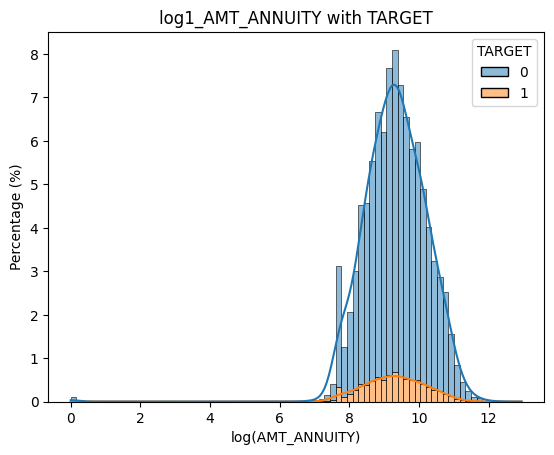

In [146]:
previous_application_train['log1_AMT_ANNUITY'] = np.log1p(previous_application_train['AMT_ANNUITY'])
plot_numerical(previous_application_train, 'log1_AMT_ANNUITY', 80, plt.gca(), 'log(AMT_ANNUITY)')

No significant difference is seen between the defaulting and non-defaulting distributions.

#### AMT_CREDIT

Exploring AMT_CREDIT
Missing number        1.00000
Missing percentage    0.00006
Name: AMT_CREDIT, dtype: float64 



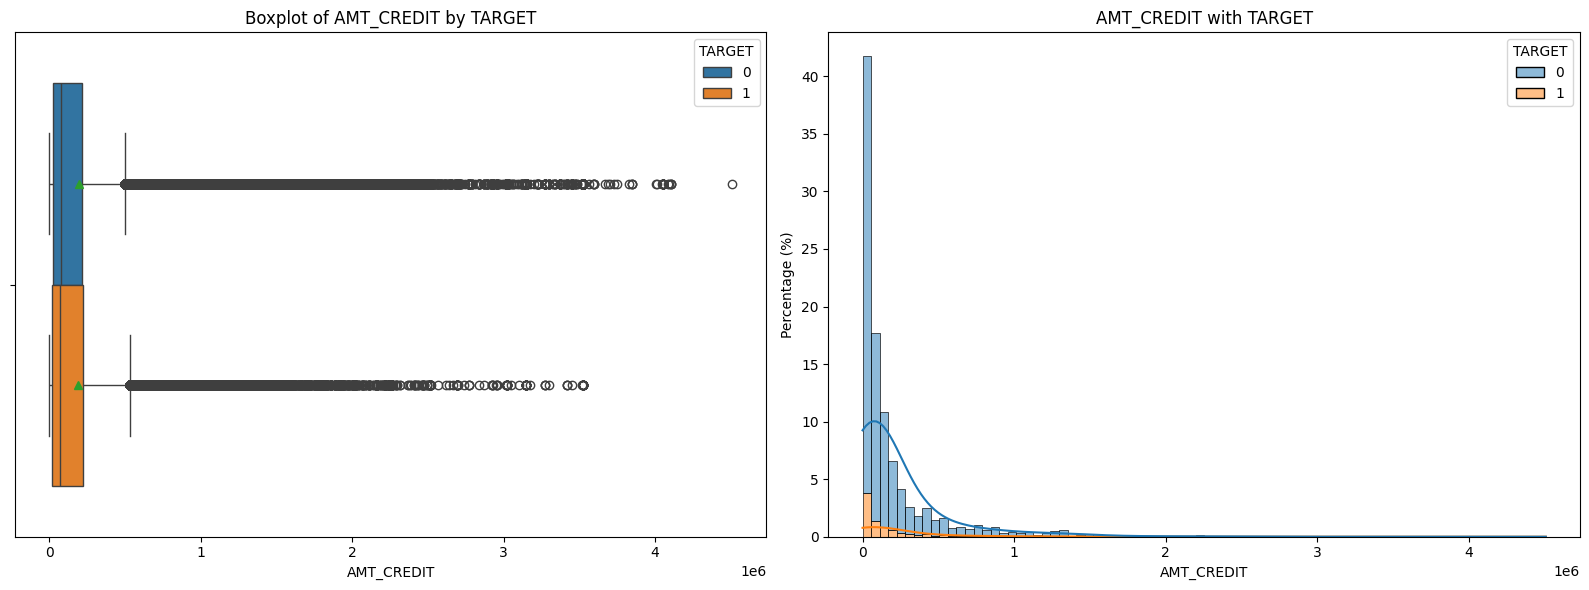

In [147]:
explore_numerical('AMT_CREDIT', missing_previous_application, previous_application_train)

This distribution also has many outliers and is skewed to the right, though many customers have no credit on their previous application. No significant difference is seen between the two target groups. 

#### AMT_DOWN_PAYMENT

Exploring AMT_DOWN_PAYMENT
Missing number        895844.00000
Missing percentage        53.63648
Name: AMT_DOWN_PAYMENT, dtype: float64 



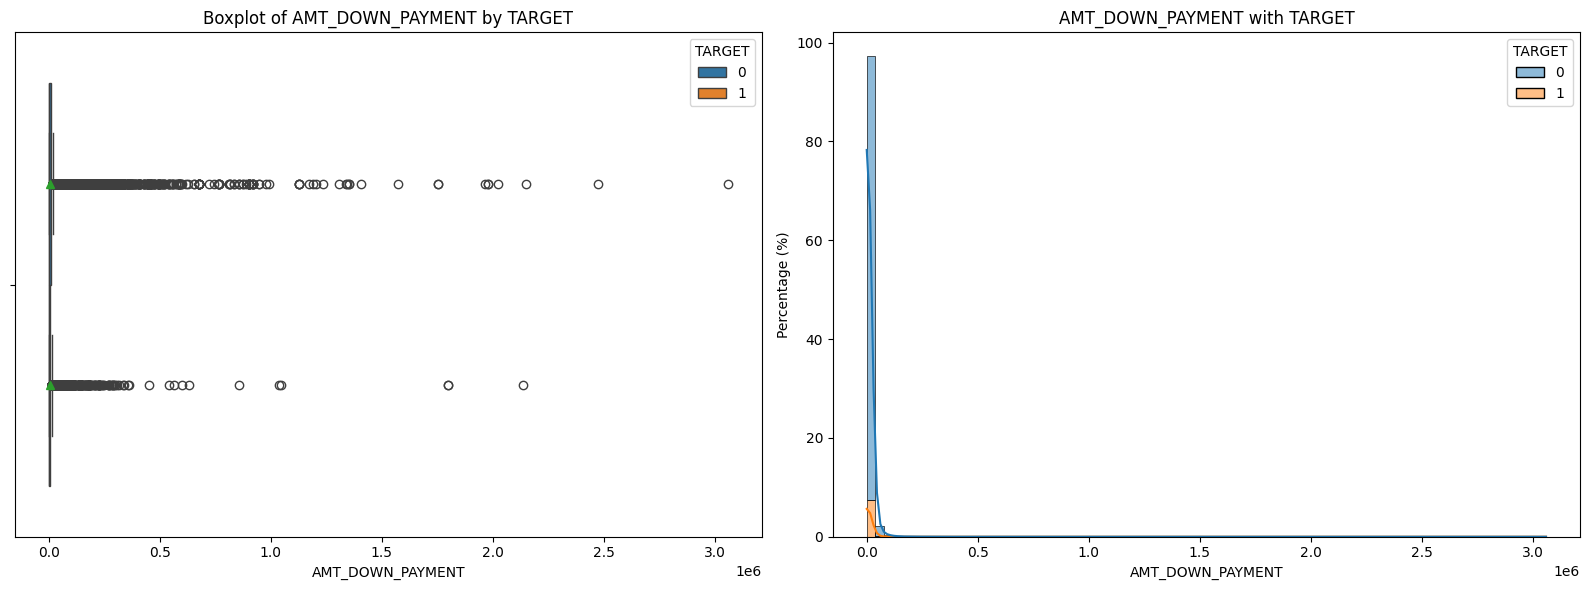

In [148]:
explore_numerical('AMT_DOWN_PAYMENT', missing_previous_application, previous_application_train)

Most customers did not put a down payment on their previous application. Looking at this as an indicator variable: 

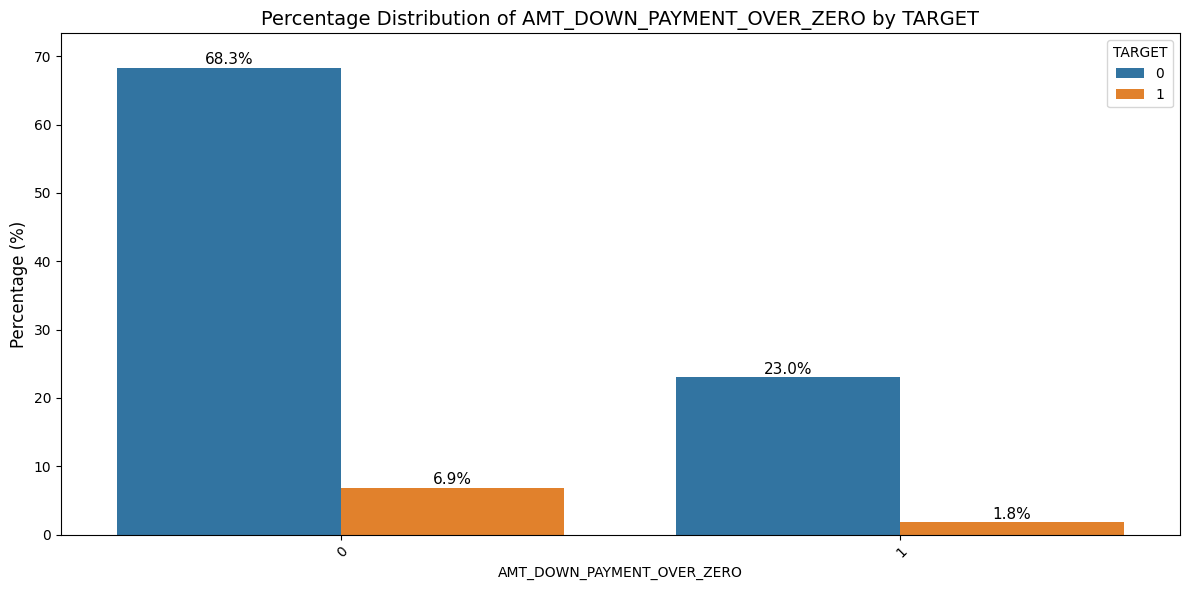

In [149]:
previous_application_train['AMT_DOWN_PAYMENT_OVER_ZERO'] = (previous_application_train['AMT_DOWN_PAYMENT'] > 0).astype(int)
plot_category(previous_application_train, 'AMT_DOWN_PAYMENT_OVER_ZERO')

No significant difference is seen between the two target groups from this graph alone.

#### AMT_GOODS_PRICE

Exploring AMT_GOODS_PRICE
Missing number        385515.000000
Missing percentage        23.081773
Name: AMT_GOODS_PRICE, dtype: float64 



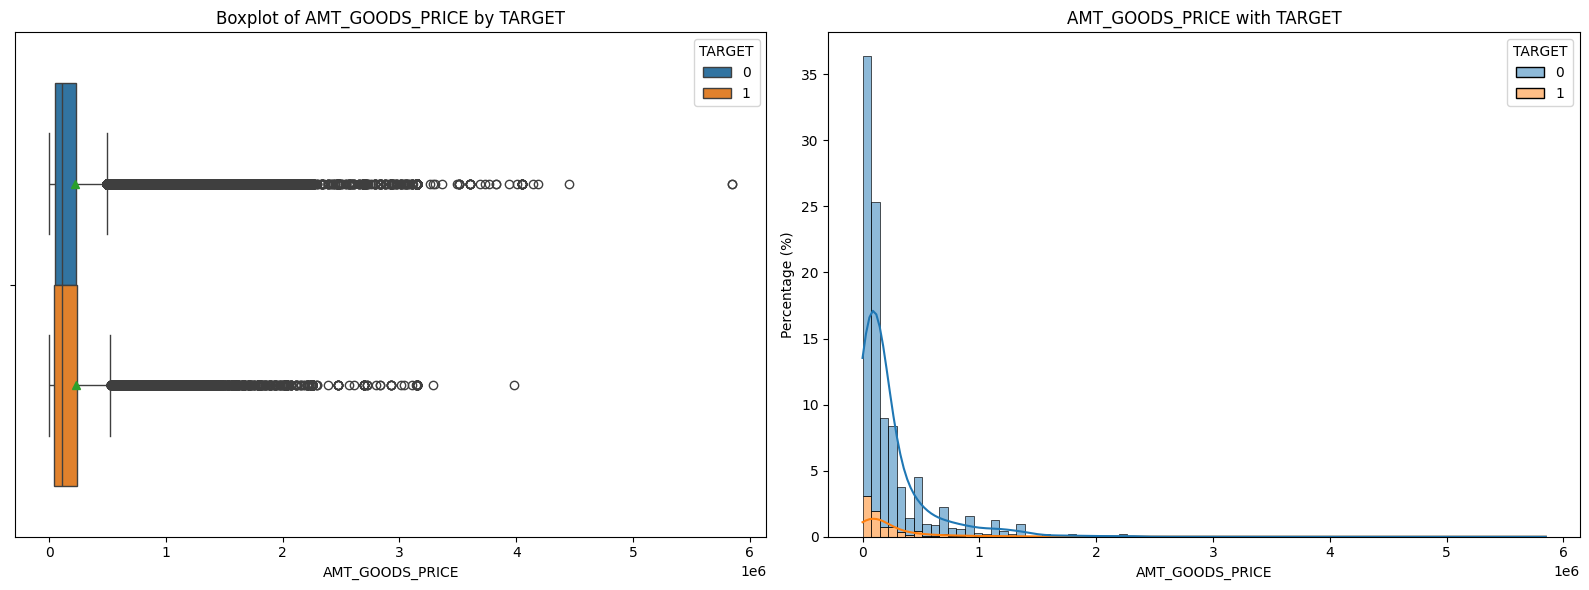

In [150]:
explore_numerical('AMT_GOODS_PRICE', missing_previous_application, previous_application_train)

This distribution is also heavily skewed to the right, and could benefit from a log transformation: 

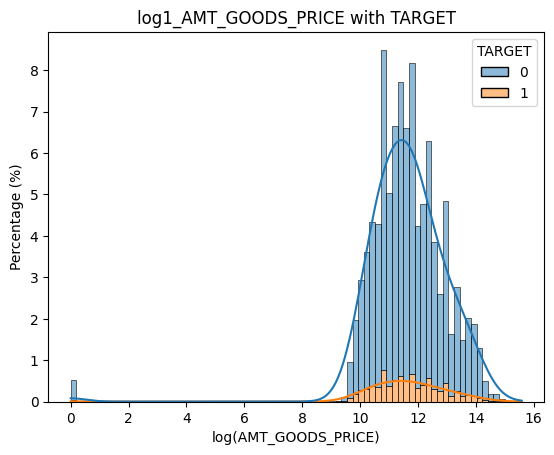

In [151]:
previous_application_train['log1_AMT_GOODS_PRICE'] = np.log1p(previous_application_train['AMT_GOODS_PRICE'])
plot_numerical(previous_application_train, 'log1_AMT_GOODS_PRICE', 80, plt.gca(), 'log(AMT_GOODS_PRICE)')

Again, no significant difference is seen between the defaulting and non defaulting customers. 

#### RATE_INTEREST_PRIVILEGED

Exploring RATE_INTEREST_PRIVILEGED
Missing number        1.664263e+06
Missing percentage    9.964370e+01
Name: RATE_INTEREST_PRIVILEGED, dtype: float64 



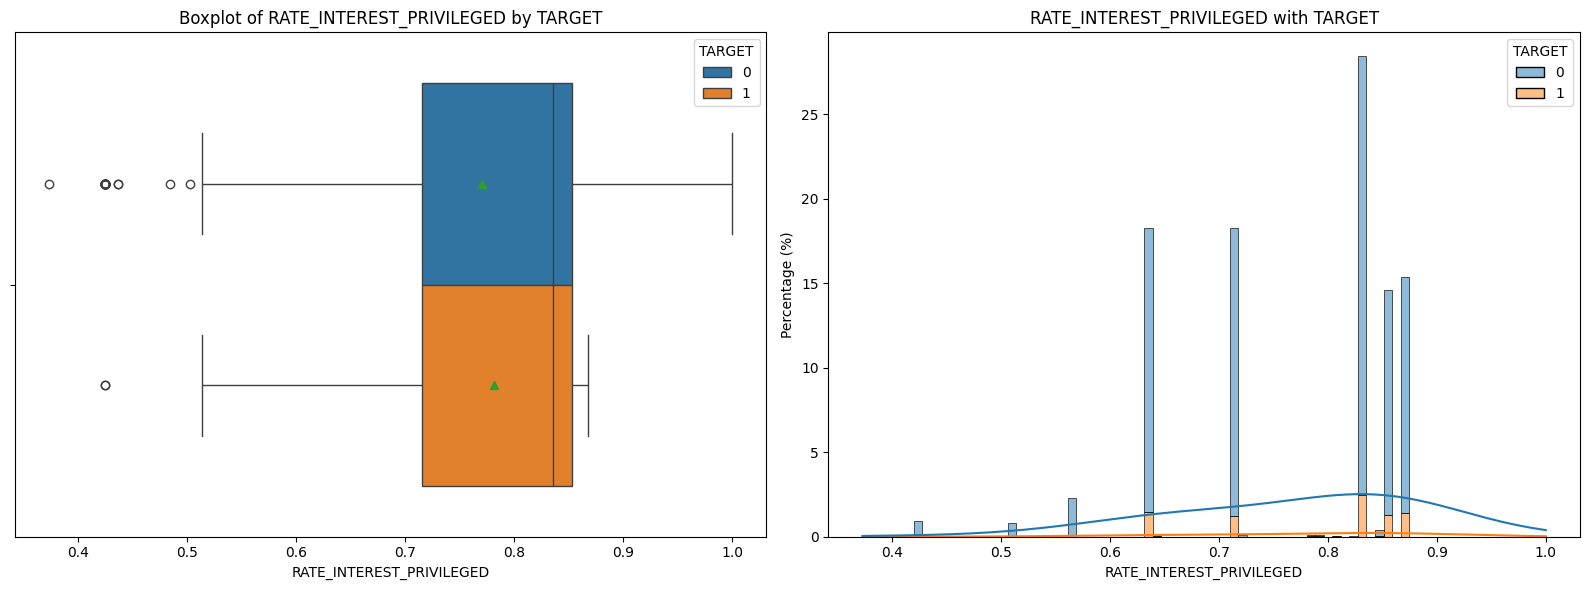

In [152]:
explore_numerical('RATE_INTEREST_PRIVILEGED', missing_previous_application, previous_application_train)

The distribution of the normalized interest rate for non-defaulting customers is wider with more outliers than that for defaulting customers.

#### DAYS_DECISION

Exploring DAYS_DECISION
No missing values


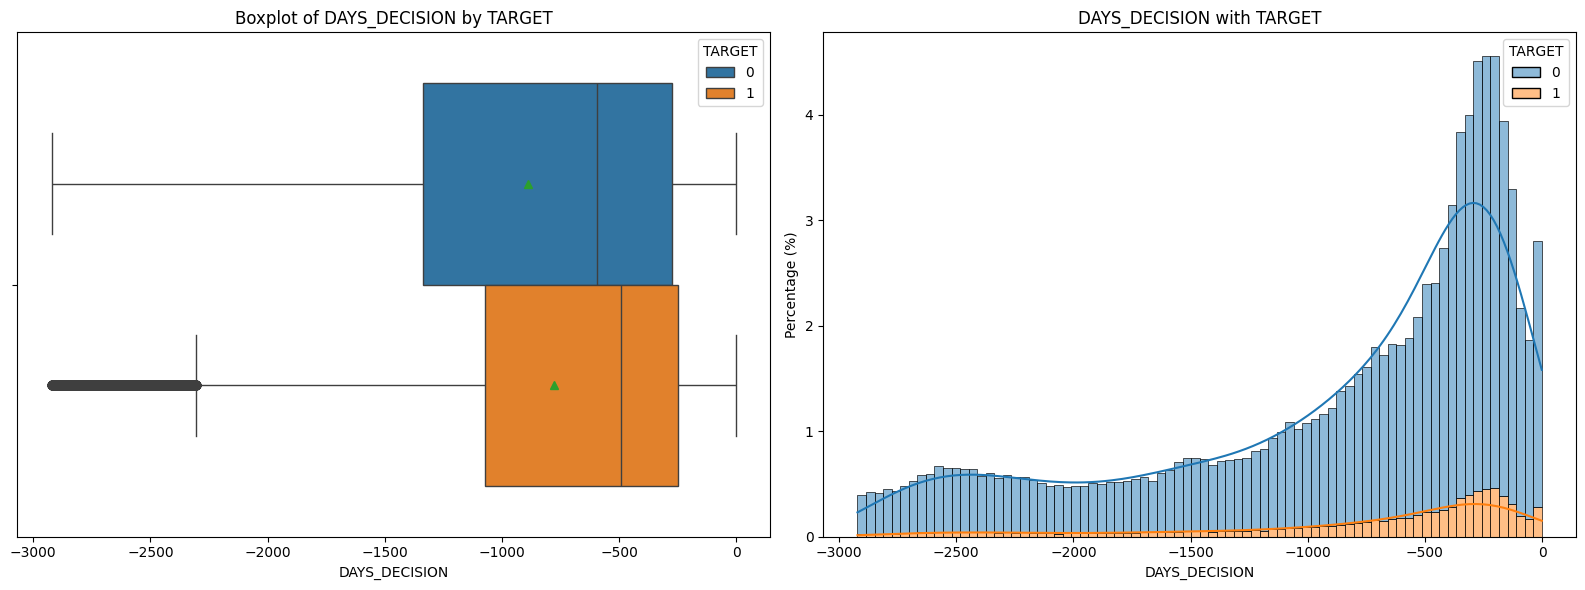

In [153]:
explore_numerical('DAYS_DECISION', missing_previous_application, previous_application_train)

The distribution for DAYS_DECISION is more narrow and shifted slightly to the right for defaulting customers. 

#### Other DAYS_* variables: 

Exploring DAYS_FIRST_DRAWING
Missing number        673065.000000
Missing percentage        40.298129
Name: DAYS_FIRST_DRAWING, dtype: float64 



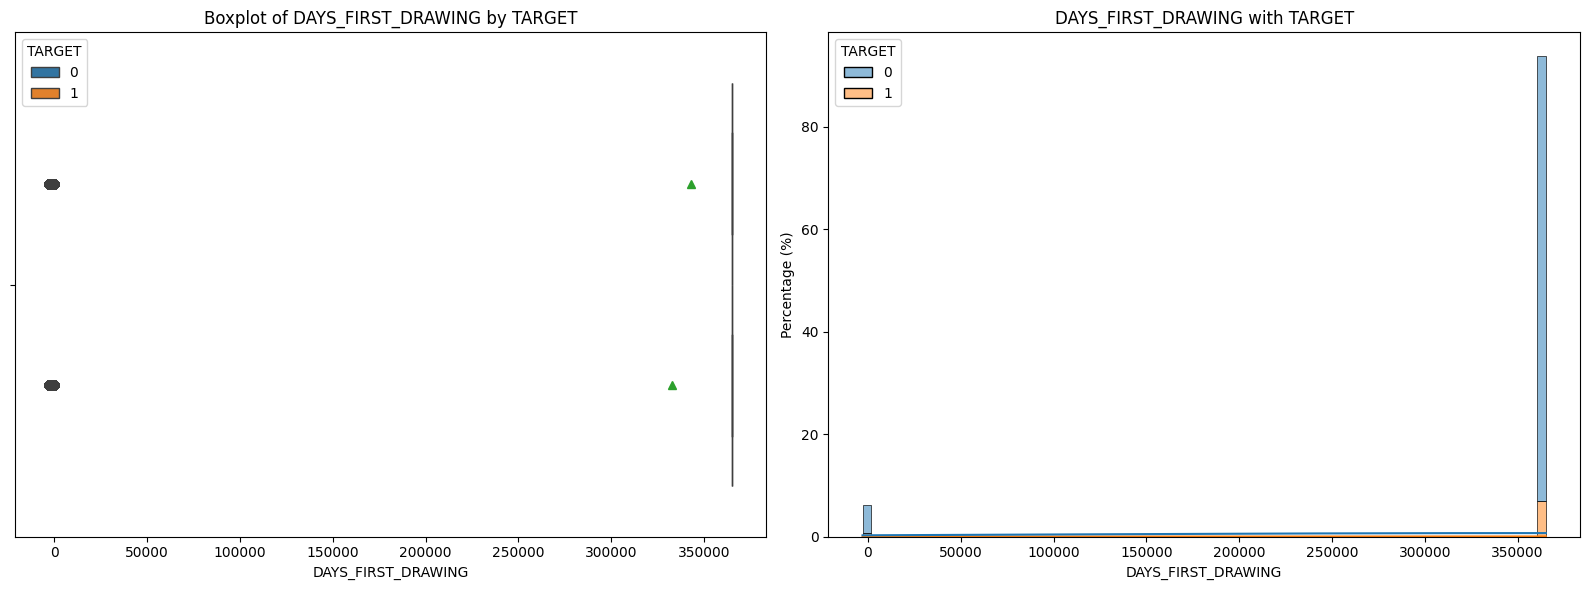

In [154]:
explore_numerical('DAYS_FIRST_DRAWING', missing_previous_application, previous_application_train)

Quite a few values over 350 000 days are present, which are not realistic (about 1000 years). These are likely unknown values, and will be set to nan: 

In [155]:
days_cols = ['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION']
for col in days_cols: 
    previous_application_train[col] = previous_application_train[col].replace(365243, np.nan)
missing_previous_application, no_missing_previous_application = get_missing_df_info(previous_application)


Empty strings: (array([], dtype=int64), array([], dtype=int64))
XNA strings: (array([      0,       1,       1, ..., 1670213, 1670213, 1670213],
      shape=(5072473,)), array([24, 15, 18, ..., 15, 22, 27], shape=(5072473,)))
Percentage of total rows with missing values: 99.99574904772682


Now, these variables can be explored: 

Exploring DAYS_FIRST_DRAWING
Missing number        673065.000000
Missing percentage        40.298129
Name: DAYS_FIRST_DRAWING, dtype: float64 



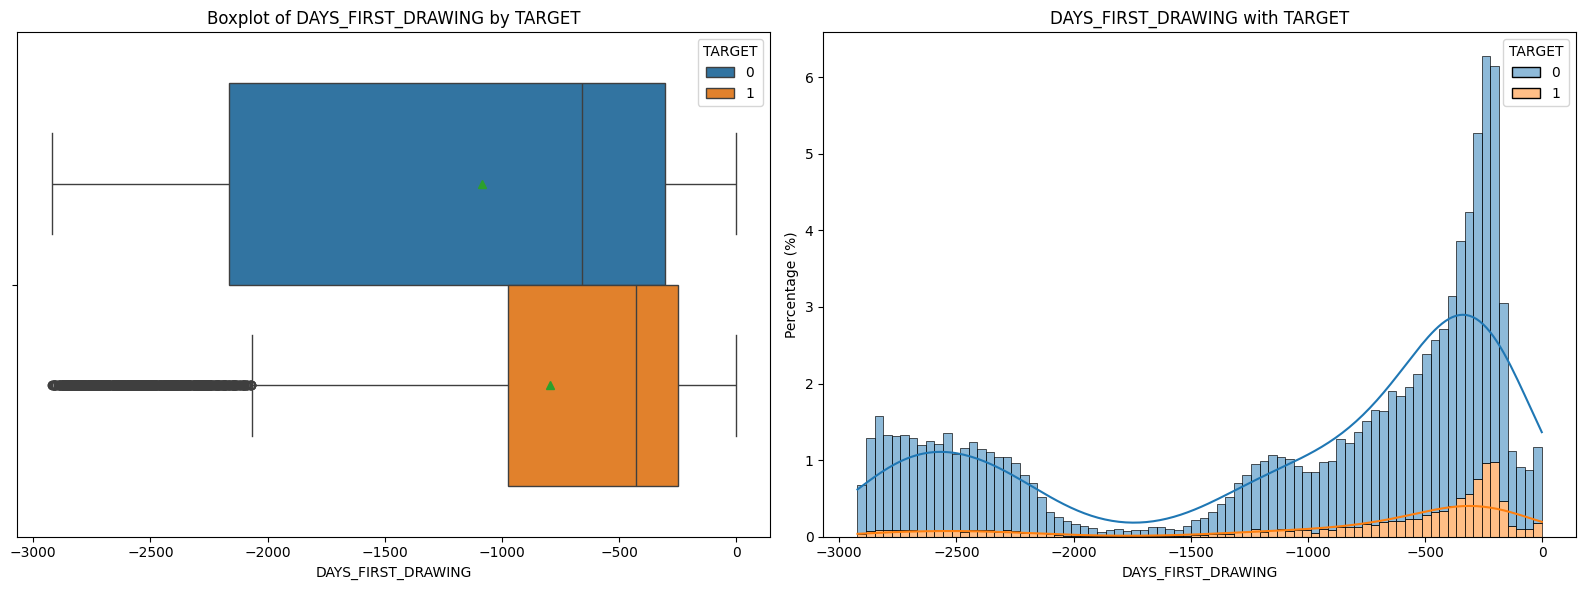

In [156]:
explore_numerical('DAYS_FIRST_DRAWING', missing_previous_application, previous_application_train)

The distribution for the first dibursement of the previous application is much more narrow and recent for defaulting customers than for non-defaulting customers.

#### DAYS_FIRST_DUE: 

Exploring DAYS_FIRST_DUE
Missing number        673065.000000
Missing percentage        40.298129
Name: DAYS_FIRST_DUE, dtype: float64 



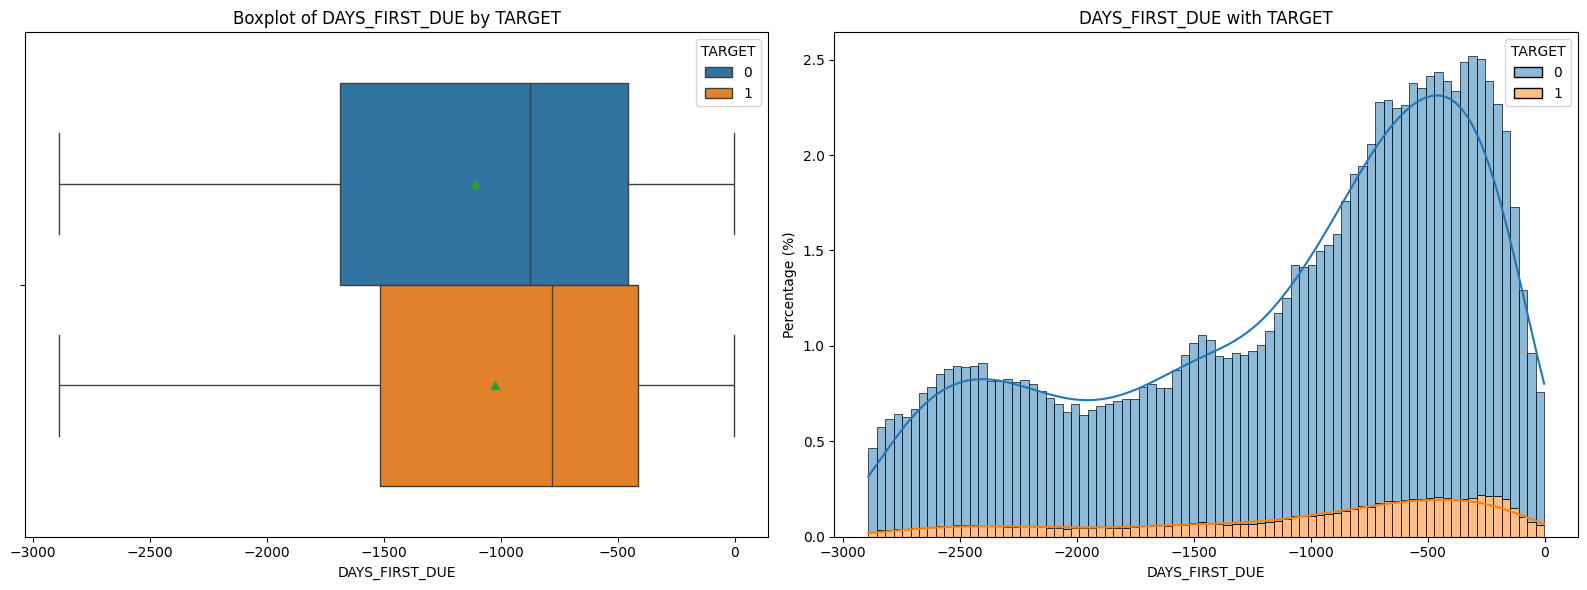

In [157]:
explore_numerical('DAYS_FIRST_DUE', missing_previous_application, previous_application_train)

This distribution looks generally bimodal, and skewed a little to the left. Generally, defaulting customers have slightly closer days_first_due to the current application. This could mean that defaulting customers tend to apply for new loans when they have existing loans.

### Categorical variables

#### PRODUCT_COMBINATION

Exploring PRODUCT_COMBINATION
Missing number        346.000000
Missing percentage      0.020716
Name: PRODUCT_COMBINATION, dtype: float64 



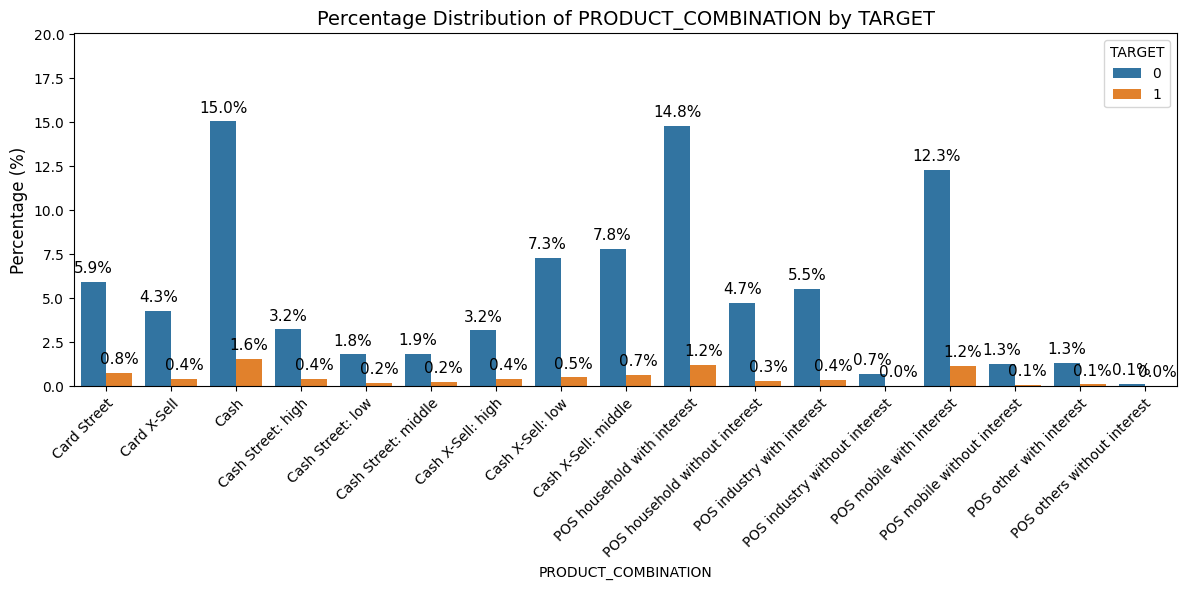

In [158]:
explore_category('PRODUCT_COMBINATION', missing_previous_application, previous_application_train)

Most customers have loans of form cash, point of sale household with interest, or point of sale mobile with interest.

#### NAME_CONTRACT_TYPE

Exploring NAME_CONTRACT_TYPE
No missing values


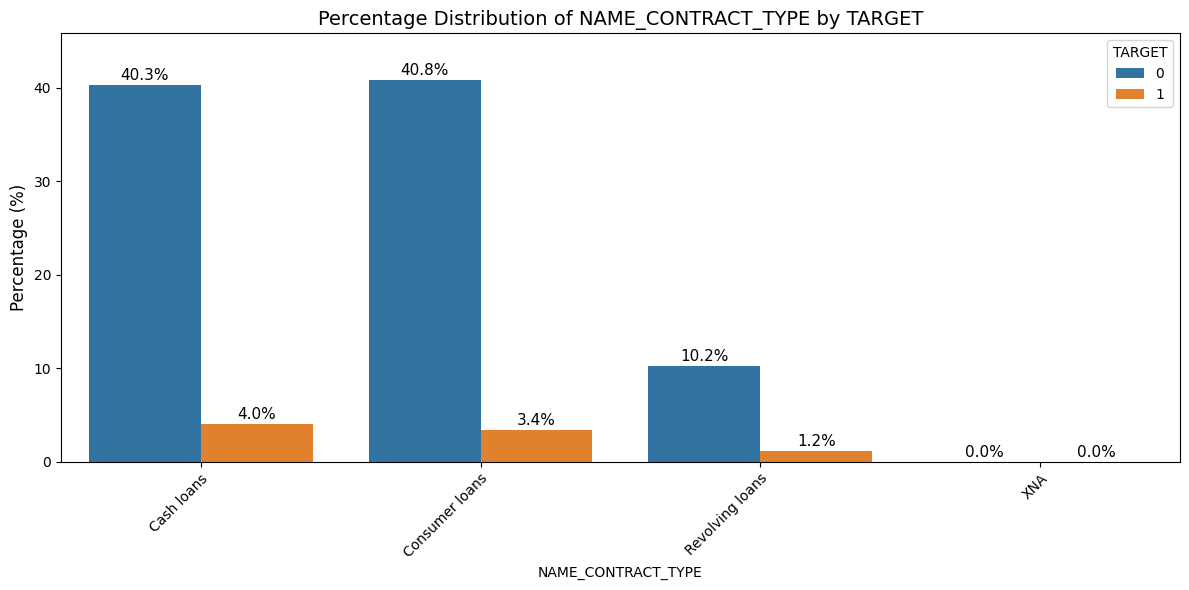

In [159]:
explore_category('NAME_CONTRACT_TYPE', missing_previous_application, previous_application_train)

Most customers had cash or consumer loans in the past.

#### NAME_CASH_LOAN_PURPOSE

Exploring NAME_CASH_LOAN_PURPOSE
No missing values


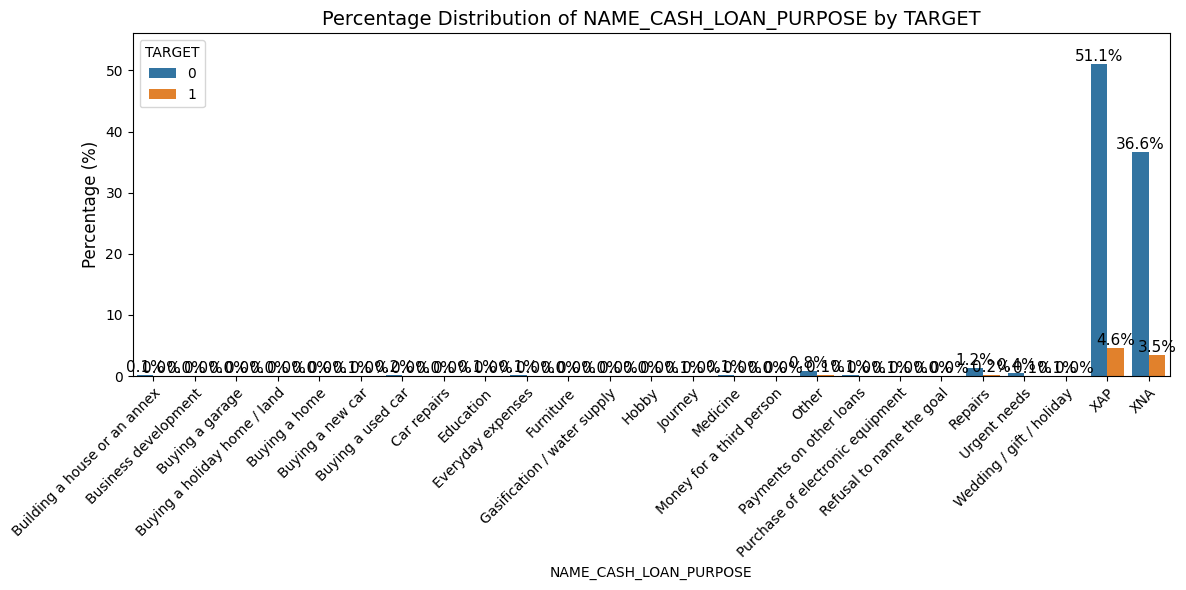

In [160]:
explore_category('NAME_CASH_LOAN_PURPOSE', missing_previous_application, previous_application_train)

This variable has many categories, and can be grouped: 

In [161]:
group_map = {
    'XAP': 'XAP',
    'XNA': 'XNA',
    'Repairs': 'Repairs',
    'Other': 'Other',
    'Urgent needs': 'Other',
    'Buying a used car': 'Other',
    'Building a house or an annex': 'Other',
    'Everyday expenses': 'Other',
    'Medicine': 'Other',
    'Payments on other loans': 'Other',
    'Education': 'Other',
    'Journey': 'Other',
    'Purchase of electronic equipment': 'Other',
    'Buying a new car': 'Other',
    'Wedding / gift / holiday': 'Other',
    'Buying a home': 'Other',
    'Car repairs': 'Repairs',
    'Furniture': 'Other',
    'Buying a holiday home / land': 'Other',
    'Business development': 'Other',
    'Gasification / water supply': 'Other',
    'Buying a garage': 'Other',
    'Hobby': 'Other',
    'Money for a third person': 'Other',
    'Refusal to name the goal': 'Other'
}
    
previous_application_train['NAME_CASH_LOAN_PURPOSE_GROUPED'] = previous_application_train['NAME_CASH_LOAN_PURPOSE'].map(group_map)

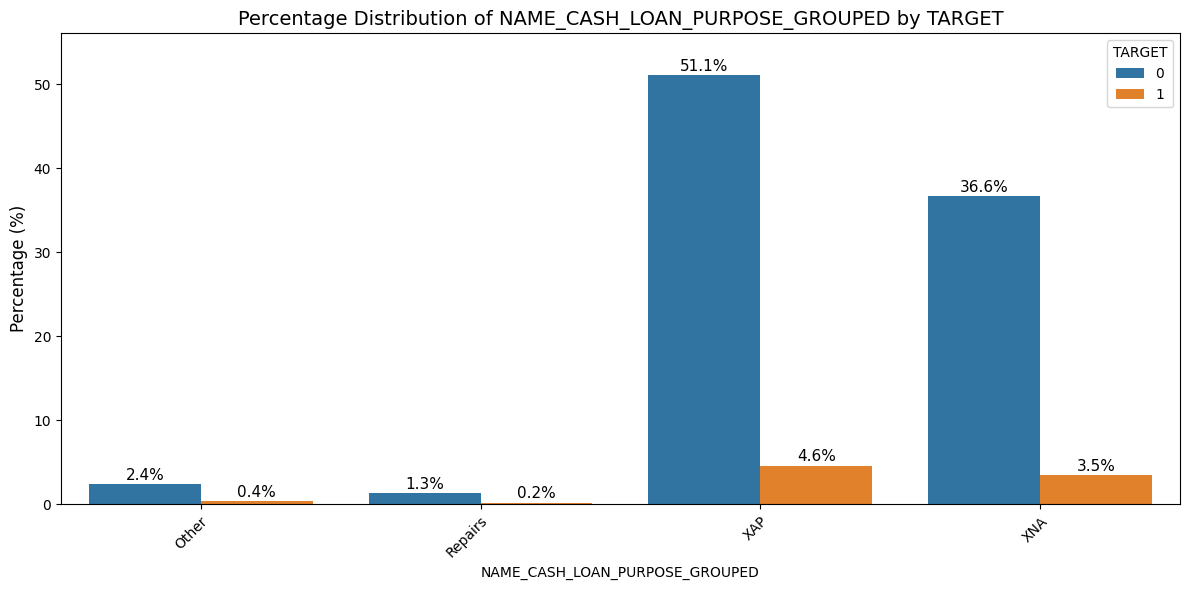

In [162]:
plot_category(previous_application_train, 'NAME_CASH_LOAN_PURPOSE_GROUPED')

Mostly, the purpose for a cash loan is unknown (XAP and XNA). In total, less than 5% of customers had a cash loan for an identified purpose.

#### NAME_CONTRACT_STATUS

Exploring NAME_CONTRACT_STATUS
No missing values


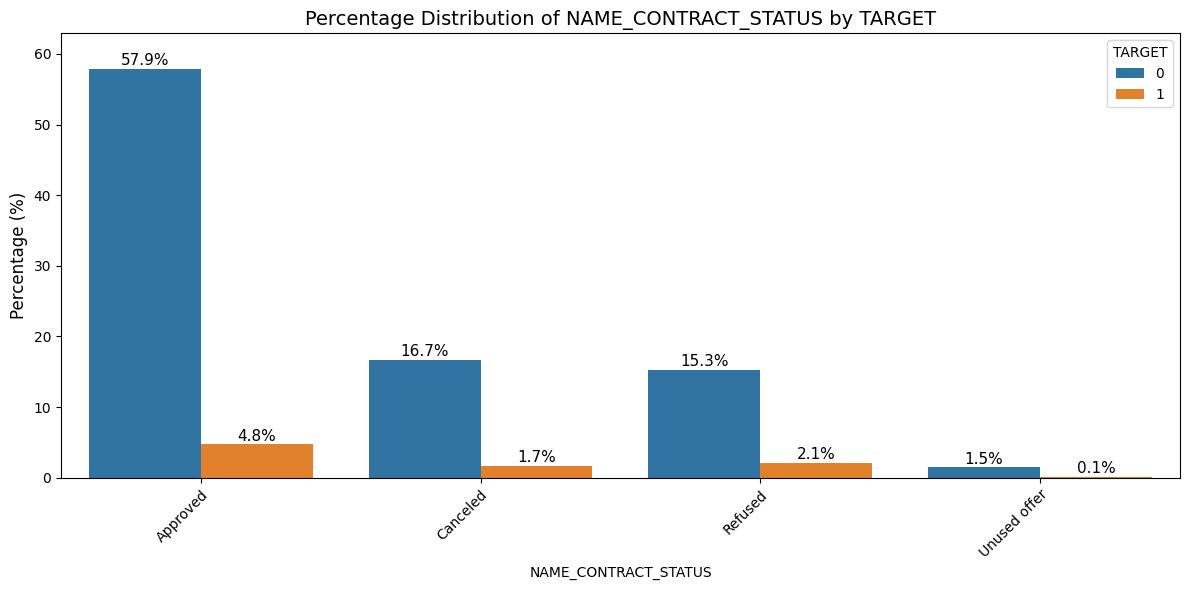

In [163]:
explore_category('NAME_CONTRACT_STATUS', missing_previous_application, previous_application_train)

Most previous contracts had been approved. Between those canceled and refused, it seems that contracts that were refused have a higher default rate than those that were cancelled. 

#### NAME_GOODS_CATEGORY

Exploring NAME_GOODS_CATEGORY
No missing values


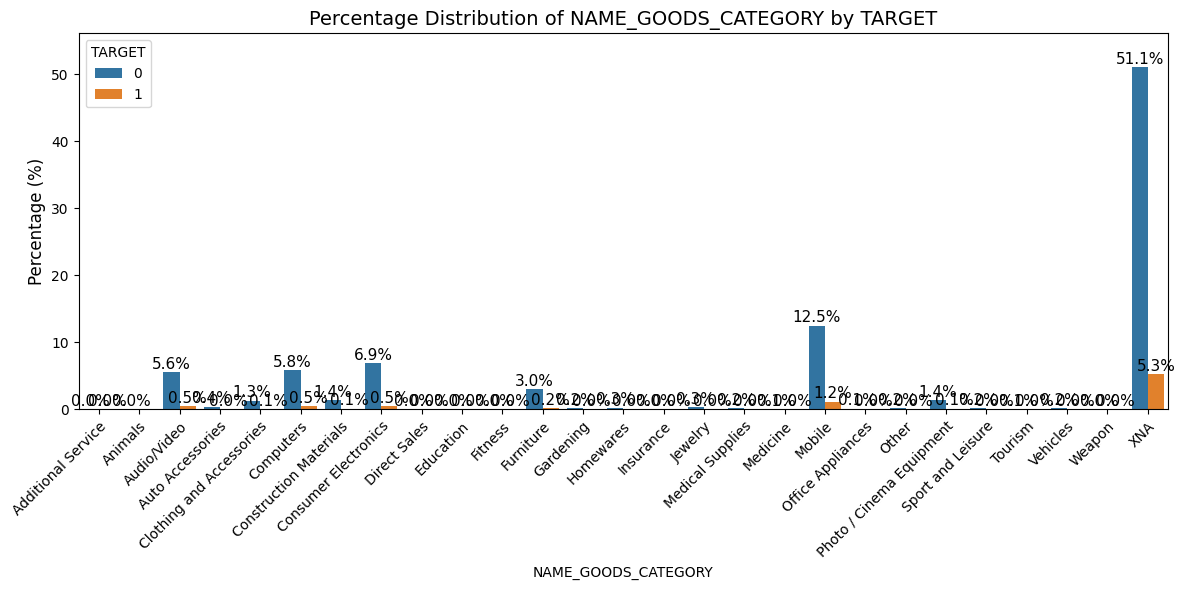

In [164]:
explore_category('NAME_GOODS_CATEGORY', missing_previous_application, previous_application_train)

This variable also has many categories and can be grouped: 

In [165]:
group_map = {
    'XNA': 'XNA',
    'Consumer electronics': 'Consumer electronics',
    'Mobile': 'Mobile',
    'Computers': 'Computers',
    'Audio/Video': 'Audio/Video',
    'Furniture': 'Furniture',
    'Photo / Cinema Equipment': 'other',
    'Construction Materials': 'other',
    'Clothing and Accessories': 'other',
    'Auto Accessories': 'other',
    'Jewelry': 'other',
    'Homewares': 'other',
    'Medical Supplies': 'other',
    'Vehicles': 'other',
    'Sport and Leisure': 'other',
    'Other': 'other',
    'Gardening': 'other',
    'Office Appliances': 'other',
    'Tourism': 'other',
    'Medicine': 'other',
    'Direct Sales': 'other',
    'Fitness': 'other',
    'Additional Service': 'other',
    'Education': 'other',
    'Weapon': 'other',
    'Insurance': 'other',
    'Animals': 'other'

}
    
previous_application_train['NAME_GOODS_CATEGORY_GROUPED'] = previous_application_train['NAME_GOODS_CATEGORY'].map(group_map)



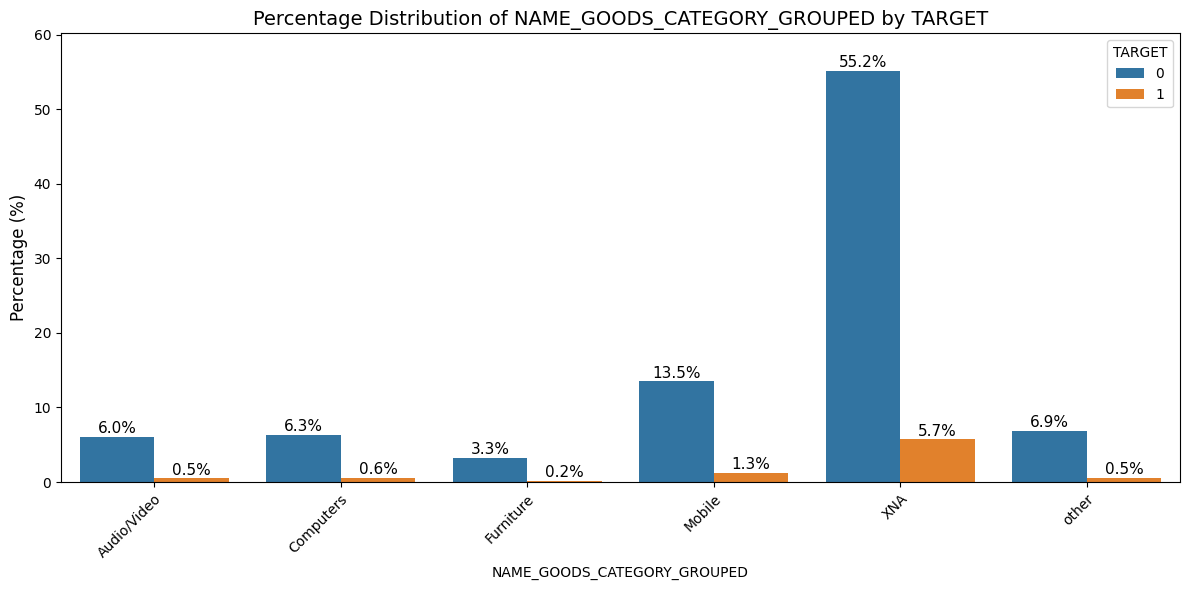

In [166]:
plot_category(previous_application_train, 'NAME_GOODS_CATEGORY_GROUPED')

Again, most goods categories are unknown. When a customer wanted a loan for material goods, they often chose the mobile sector.

#### NAME_PORTFOLIO

Exploring NAME_PORTFOLIO
No missing values


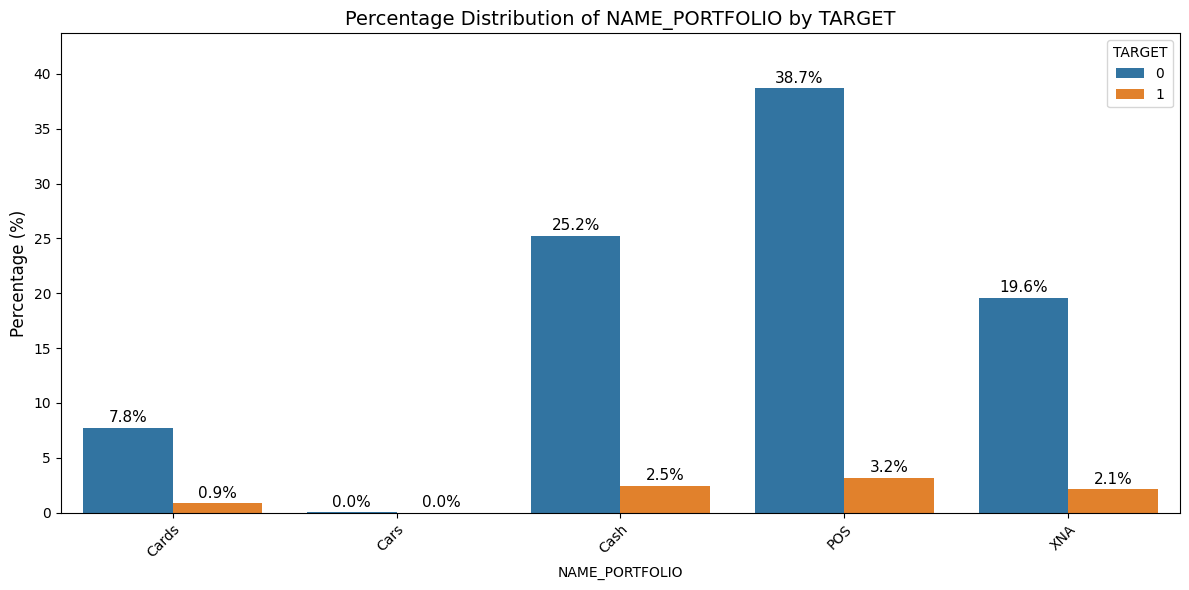

In [167]:
explore_category('NAME_PORTFOLIO', missing_previous_application, previous_application_train)

The most popular application type was for cash or point of sales.

#### CHANNEL_TYPE

Exploring CHANNEL_TYPE
No missing values


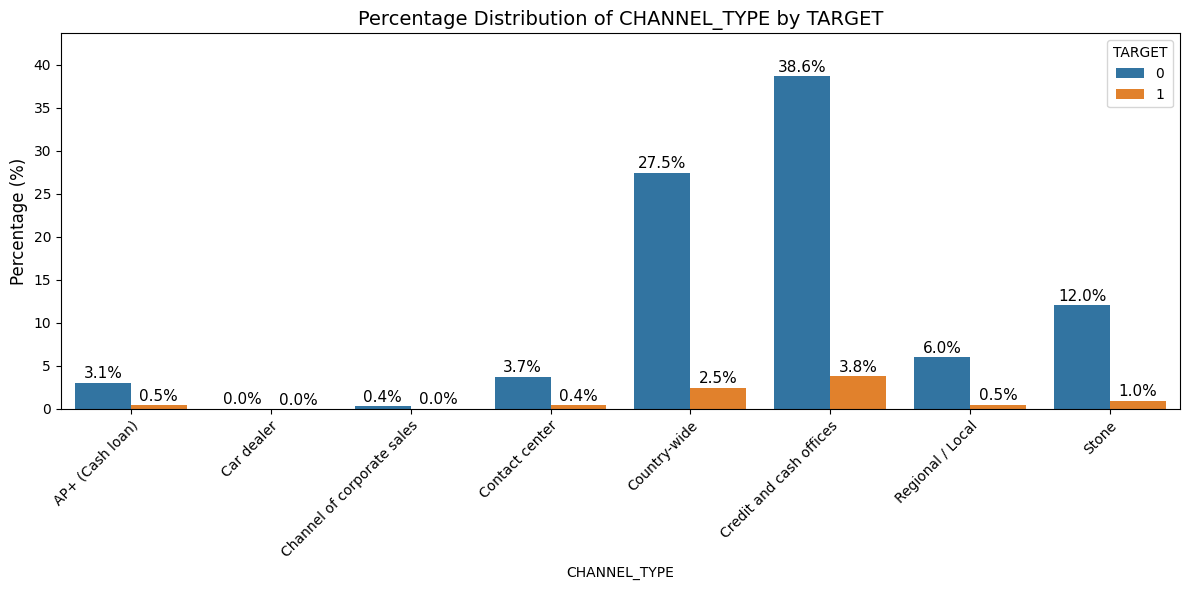

In [168]:
explore_category('CHANNEL_TYPE', missing_previous_application, previous_application_train)

Most clients were acquired through credit and cash offices or country wide channels. 

# Installments_payments

This table shows  information about a Home Credit customer's repayment history. 

## Initial table examination: 

In [ ]:
installments_payments = pd.read_csv('../tables/installments_payments.csv', sep=',')
installments_payments.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

Adding in the target variable: 

In [170]:
installments_payments_train = installments_payments.merge(
    train[['SK_ID_CURR', 'TARGET']],
    on='SK_ID_CURR',
    how='inner' 
)

As before, the SK_ID_CURR column links this table to the application_train or _test tables, and the SK_ID_PREV column is an identifier for the ID of previous credits. These ID columns can be used to link tables as shown in the table connections image. 

Looking at the basic information about this table: 

In [171]:
print_df_info(installments_payments)

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None

Size of dataframe (rows, columns): (13605401, 8)


This table has about 13.6 million entries with 8 features. Of these features, 5 of them are of type float64, and 3 of them are of type int64. 

### Duplicate values

In [172]:
print_dup_info(installments_payments, 'SK_ID_PREV', 'SK_ID_CURR')

Duplicated rows in dataframe: 0
Duplicated 'SK_ID_PREV' in dataframe: 12607649
Duplicated 'SK_ID_CURR' in dataframe: 13265814
Number of duplicate values present in dataframe excluding 'SK_ID_PREV' and 'SK_ID_CURR': 195857


Many ID values are duplicated in this table, as each previous loan can be associated with many repayments or missed payments, and each current loan can be associated with multiple previous loans.

Many duplicate values are present excluding the ID columns. Looking at these: 

In [173]:
installments_payments_features = installments_payments.drop(['SK_ID_PREV', 'SK_ID_CURR'], axis=1)
add_dup_counts(installments_payments_features)

NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  \
114012                       0.0                      2           -202.0   
114651                       0.0                      2           -195.0   
366918                       0.0                      6           -152.0   
114445                       0.0                      2           -197.0   
113281                       0.0                      2           -210.0   
...                          ...                    ...              ...   
52952                        0.0                      1           -200.0   
1174840                      0.0                     20          -2203.0   
1174839                      0.0                     20          -2203.0   
1174837                      0.0                     20          -2203.0   
13491074                    14.0                     10            -28.0   

          DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  count  
114012                -202.0         2250.00       2250.0     12  
114651                -195.0         2250.00       2250.0     11  
366918                -152.0         2250.00       2250.0     10  
114445                -197.0         2250.00       2250.0     10  
113281                -210.0         2250.00       2250.0      9  
...                      ...             ...          ...    ...  
52952                 -200.0        31500.00      31500.0      2  
1174840              -2206.0         6750.00       6750.0      2  
1174839              -2206.0         3375.00       3375.0      2  
1174837              -2212.0         9000.00       9000.0      2  
13491074               -31.0         2669.04       5850.0      2  

[92471 rows x 7 columns]

The above dataframe shows a list of duplicate rows in the bureau table with the number of times each row is present. Most frequently, the AMT_INSTALMENT and AMT_PAYMENT are both equal to 2250.0 with a credit card (0 for NUM_INSTALMENT_VERSION).

These duplicate values (not considering the ID columns) will be kept, as it is probable that multiple customers have this same set of features in a dataset this large.

### Missing values:

Now, missing values can be examined: 

In [174]:
missing_installments, no_missing_installments = get_missing_df_info(installments_payments)
missing_installments

Empty strings: (array([], dtype=int64), array([], dtype=int64))
XNA strings: (array([], dtype=int64), array([], dtype=int64))
Percentage of total rows with missing values: 0.02135181462126695


Missing number  Missing percentage
DAYS_ENTRY_PAYMENT            2905            0.021352
AMT_PAYMENT                   2905            0.021352

Barely any missing values are present in this table.

Looking at the missing values heatmap gives: 

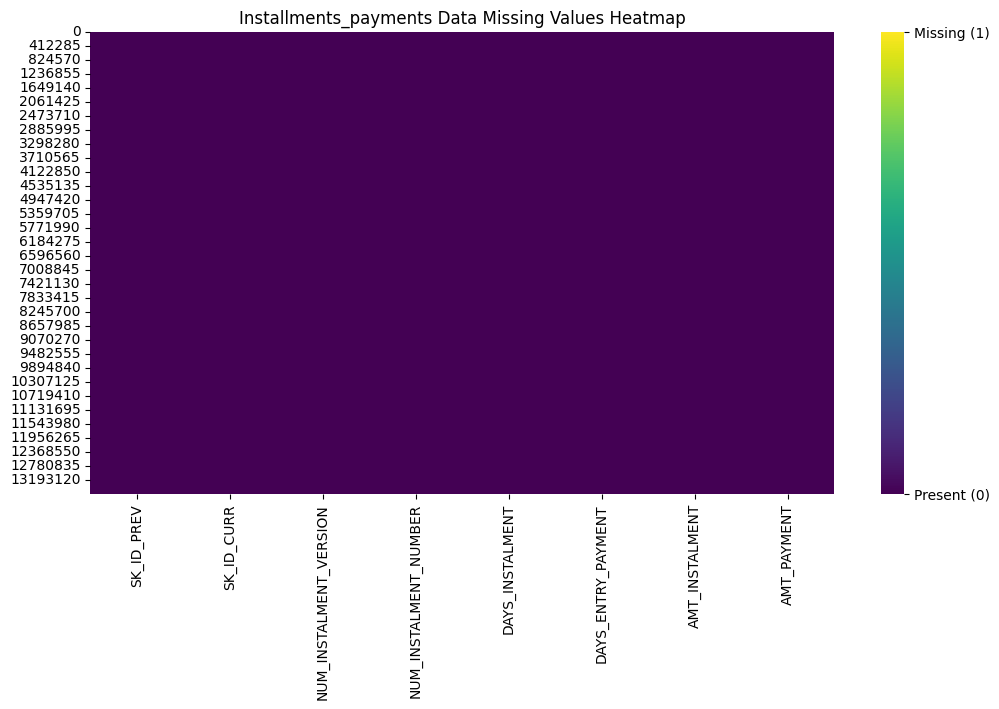

In [175]:
plt.figure(figsize=(12,6))
ax = sns.heatmap(installments_payments.isnull(), cbar=True, cmap="viridis", vmin=0, vmax=1)
colorbar = ax.collections[0].colorbar

colorbar.set_ticks([0, 1])
colorbar.set_ticklabels(['Present (0)', 'Missing (1)'])
plt.title("Installments_payments Data Missing Values Heatmap")
plt.show()

Indeed, barely any missing values are present in this table.

### Chi-squared test for missing values

From these charts, it is clear that the variables with the most missing values are related to the building where a client lives. In general, no patterns are seen with these missing values. Performing a chi-squared test with null values from each category compared to the TARGET variable will tell if a correlation is present or not in the training data. 

Here the **null hypothesis** is that there is no relationship between the TARGET variable and whether a value is missing or not in a given feature. 

The **alternate hypothesis** is that there is a statistically significant relationship between the TARGET variable and a feature's absence of values. 

In addition, if a relationship is found between the presence of missing values and the TARGET, an indicator column is added to a modified dataset (train_). The chi-squared tests are done at the 95% confidence level: 

In [176]:
installments_indicator_cols = []

In [177]:
alpha = 0.05
train_ = installments_payments_train.copy()
for x in installments_payments_train.columns:
    contingency_table = pd.crosstab(installments_payments_train['TARGET'], installments_payments_train[f'{x}'].isnull())
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print('contingengy table \n', contingency_table)
    print(f"Chi-Squared Statistic: {chi2}")
    print(f"p-value: {p}")
    print(f"Degrees of Freedom: {dof}")
    if p < alpha:
        print(f"Reject the null hypothesis - There is a relationship between TARGET and missing {x} values.")
        train_[f'{x}_missing'] = train_[f'{x}'].isnull().astype(int)
        installments_indicator_cols.append(f'{x}')
    else:
        print(f"Fail to reject the null hypothesis - There is no relationship between TARGET and missing {x} values.")
    print()


contingengy table 
 SK_ID_PREV     False
TARGET              
0           10711339
1             880253
Chi-Squared Statistic: 0.0
p-value: 1.0
Degrees of Freedom: 0
Fail to reject the null hypothesis - There is no relationship between TARGET and missing SK_ID_PREV values.

contingengy table 
 SK_ID_CURR     False
TARGET              
0           10711339
1             880253
Chi-Squared Statistic: 0.0
p-value: 1.0
Degrees of Freedom: 0
Fail to reject the null hypothesis - There is no relationship between TARGET and missing SK_ID_CURR values.

contingengy table 
 NUM_INSTALMENT_VERSION     False
TARGET                          
0                       10711339
1                         880253
Chi-Squared Statistic: 0.0
p-value: 1.0
Degrees of Freedom: 0
Fail to reject the null hypothesis - There is no relationship between TARGET and missing NUM_INSTALMENT_VERSION values.

contingengy table 
 NUM_INSTALMENT_NUMBER     False
TARGET                         
0                      10711339

In [178]:
installments_indicator_cols

['DAYS_ENTRY_PAYMENT', 'AMT_PAYMENT']

Two of the variables with missing values seem to be correlated with the TARGET variable. An indicator variable for these relationships is added to the train_ dataset where this relationship is present. The missing values will be analyzed in detail when looking at selected variables one by one. 

Looking at the modified training data: 

In [179]:
train_.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  TARGET  \
0          -1180.0             -1187.0        6948.360     6948.360       0   
1          -2156.0             -2156.0        1716.525     1716.525       0   
2            -63.0               -63.0       25425.000    25425.000       0   
3          -2418.0             -2426.0       24350.130    24350.130       0   
4          -1383.0             -1366.0        2165.040     2160.585       0   

   DAYS_ENTRY_PAYMENT_missing  AMT_PAYMENT_missing  
0                           0                    0  
1                           0                    0  
2                           0                    0  
3                           0                    0  
4                           0                    0

## Correlations: 

### Phi-k correlation: 

First, data types are examined so as to identify interval columns: 


In [180]:
installments_payments_train.dtypes

SK_ID_PREV                  int64
SK_ID_CURR                  int64
NUM_INSTALMENT_VERSION    float64
NUM_INSTALMENT_NUMBER       int64
DAYS_INSTALMENT           float64
DAYS_ENTRY_PAYMENT        float64
AMT_INSTALMENT            float64
AMT_PAYMENT               float64
TARGET                      int64
dtype: object

In [181]:
phik_vars = installments_payments_train.drop(['SK_ID_CURR', 'SK_ID_PREV'], axis=1)
float_features = installments_payments_train.select_dtypes(include=['float64']).columns
interval_cols = float_features.union(['SK_DPD_DEF', 'SK_DPD', 'CNT_DRAWINGS_CURRENT', 'AMT_CREDIT_LIMIT_ACTUAL'])

In [182]:
phik_overview = phik_vars.phik_matrix(interval_cols=interval_cols, njobs=1)


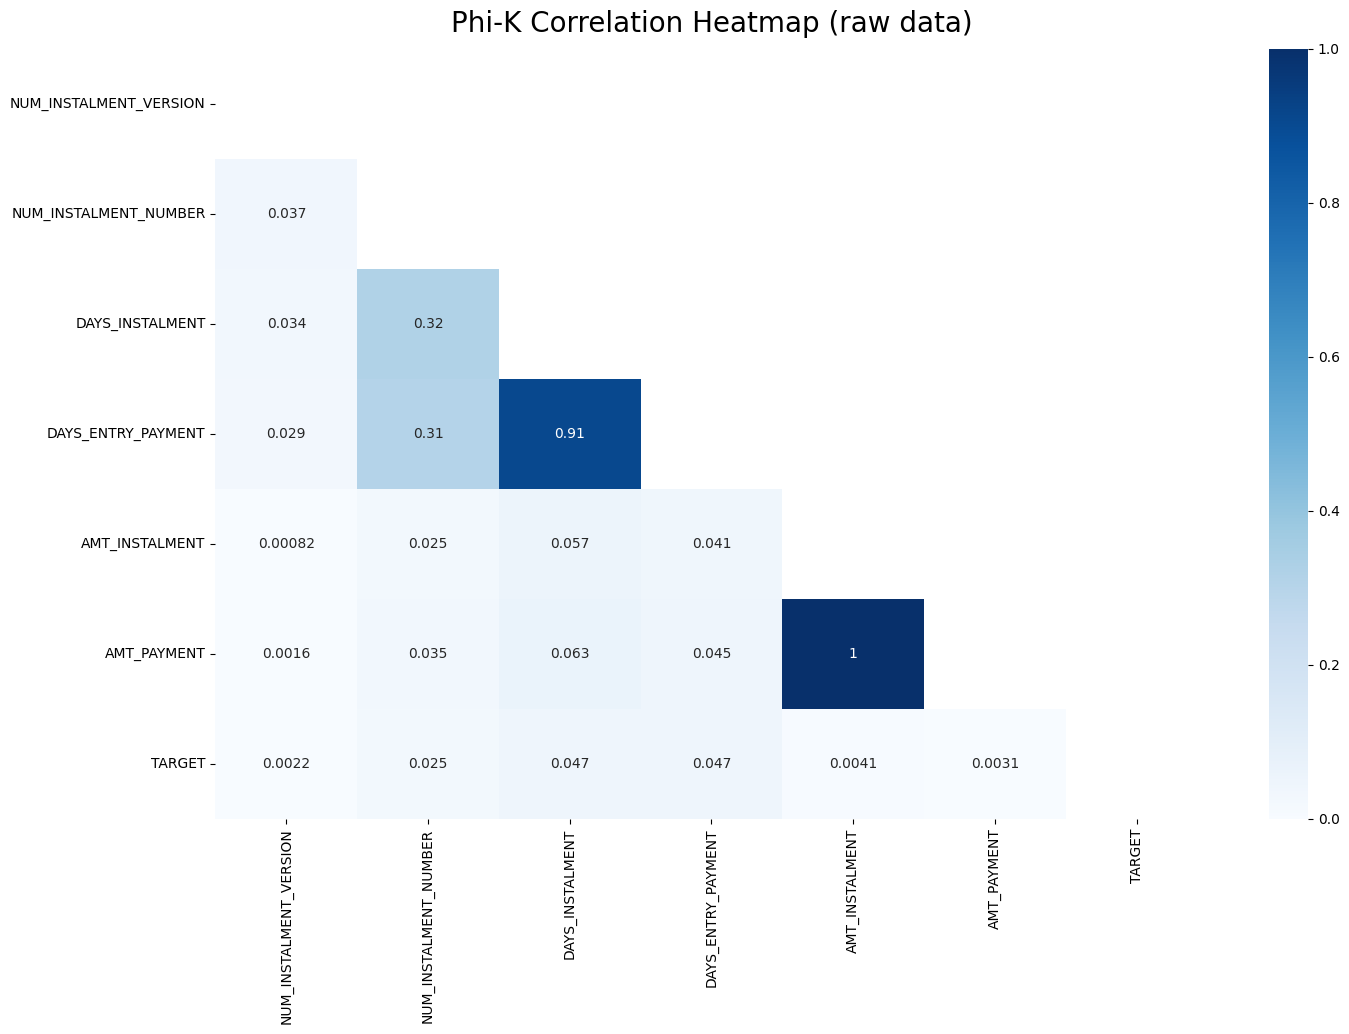

In [183]:
plt.figure(figsize=(16,10))
mask = np.triu(np.ones_like(phik_overview, dtype=bool))
heatmap = sns.heatmap(phik_overview, annot=True, mask=mask, cmap='Blues', vmin=0, vmax=1)
heatmap.set_title('Phi-K Correlation Heatmap (raw data)', fontdict={'fontsize':20}, pad=12)
plt.show()

Again, no correlations are seen between the target and any other variables. A perfect correlation is seen between AMT_INSTALMENT and AMT_PAYMENT, and a very strong correlation (0.91) is seen between DAYS_INSTALMENT and DAYS_ENTRY_PAYMENT. 

### Spearman correlation: 

In [184]:
spearman_corr = installments_payments_train.drop(['SK_ID_PREV', 'SK_ID_CURR'], axis=1).corr(method='spearman', numeric_only=True)

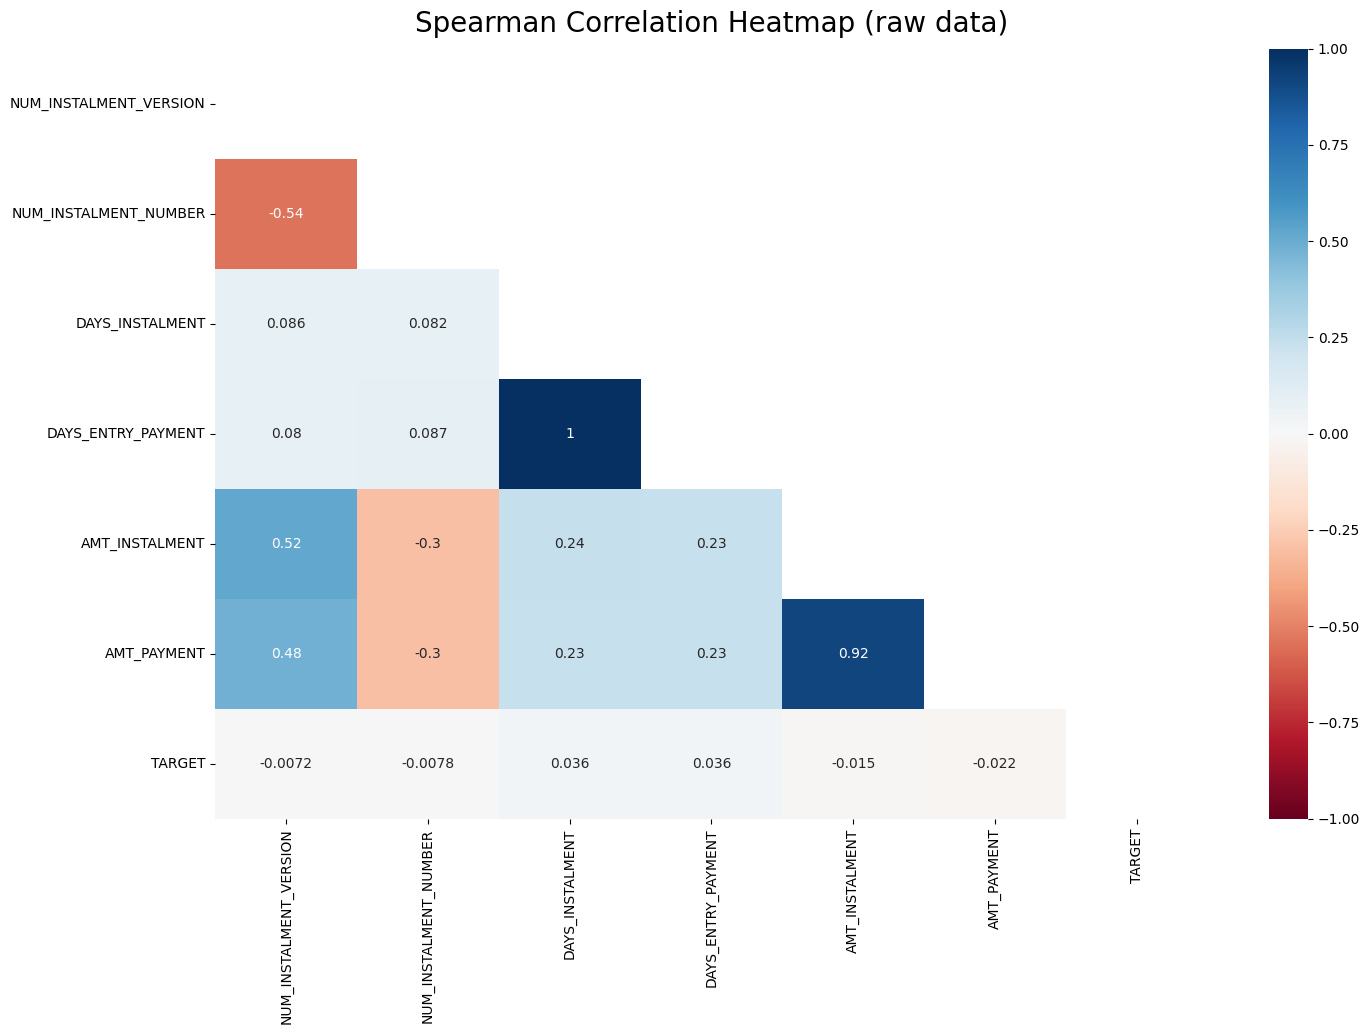

In [185]:
plt.figure(figsize=(16,10))
mask = np.triu(np.ones_like(spearman_corr, dtype=bool))
heatmap = sns.heatmap(spearman_corr, annot=True, mask=mask, cmap='RdBu', vmin=-1, vmax=1)
heatmap.set_title('Spearman Correlation Heatmap (raw data)', fontdict={'fontsize':20}, pad=12)
plt.show()

The highest negative correlation is between MIN_INSTALMENT_NUMBER and NUM_INSTALMENT_VERSION (-0.54). The two strong correlations are both positive between AMT_INSTALMENT and AMT_PAYMENT and DAYS_ENTRY_PAYMENT and DAYS_INSTALMENT. 

## Explore_variables: 

All variables in this dataset are numerical. Variables selected to explore are: 
- num_instalment_version,
- days_instalment,
- days_entry_payment, and
- amt_instalment. 


#### NUM_INSTALMENT_VERSION

Exploring NUM_INSTALMENT_VERSION
No missing values


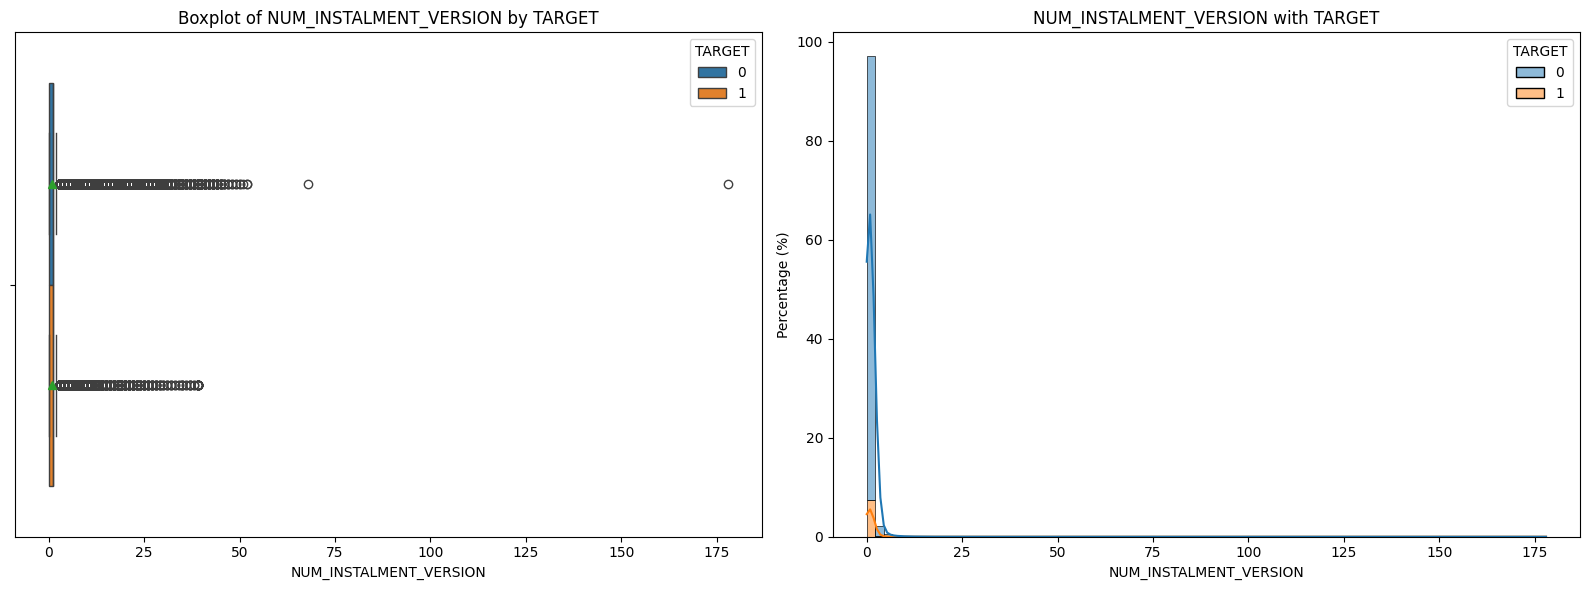

In [186]:
explore_numerical('NUM_INSTALMENT_VERSION', missing_installments, installments_payments_train)

Quite a few values are equal to zero, which indicates a credit card loan. One outlier is present with an instalment version of 175, which is clipped: 

In [187]:
upper_limit = installments_payments_train['NUM_INSTALMENT_VERSION'].quantile(0.999)
installments_payments_train['NUM_INSTALMENT_VERSION'] = installments_payments_train['NUM_INSTALMENT_VERSION'].clip(upper=upper_limit)

Exploring NUM_INSTALMENT_VERSION
No missing values


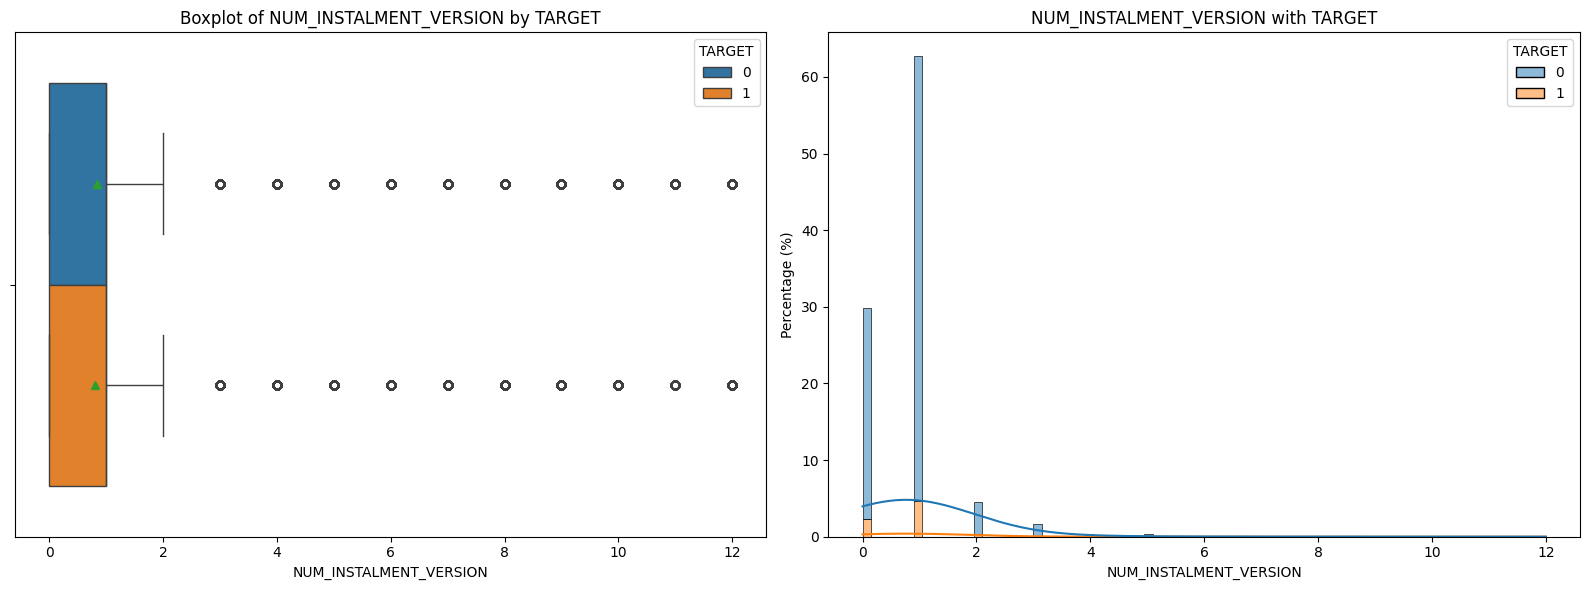

In [188]:
explore_numerical('NUM_INSTALMENT_VERSION', missing_installments, installments_payments_train)

This variable can also be binned: 

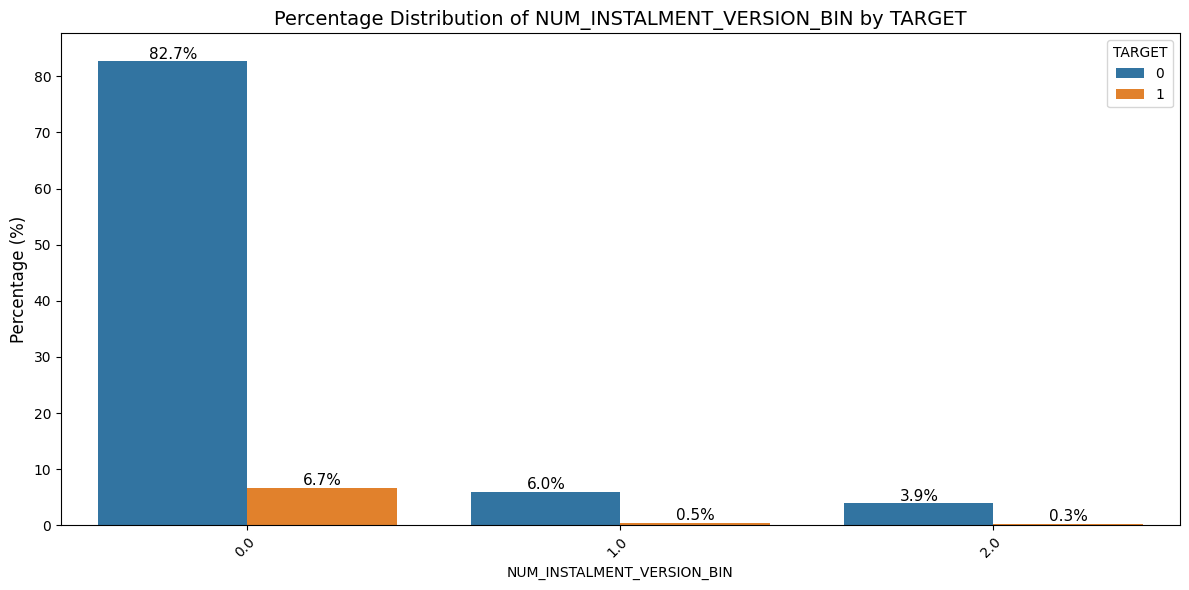

In [189]:
installments_payments_train['NUM_INSTALMENT_VERSION_BIN'] = pd.cut(installments_payments_train['NUM_INSTALMENT_VERSION'], bins=[0, 1, 2, installments_payments_train['NUM_INSTALMENT_VERSION'].max()], labels=False)
installments_payments_train['NUM_INSTALMENT_VERSION_BIN'] = installments_payments_train['NUM_INSTALMENT_VERSION_BIN'].astype('category')
plot_category(installments_payments_train, 'NUM_INSTALMENT_VERSION_BIN')

Most customers seem to have a loan on a credit card. Other than that, about 4% of customers have changed installment calendar two times or more. 

#### DAYS_INSTALMENT

Exploring DAYS_INSTALMENT
No missing values


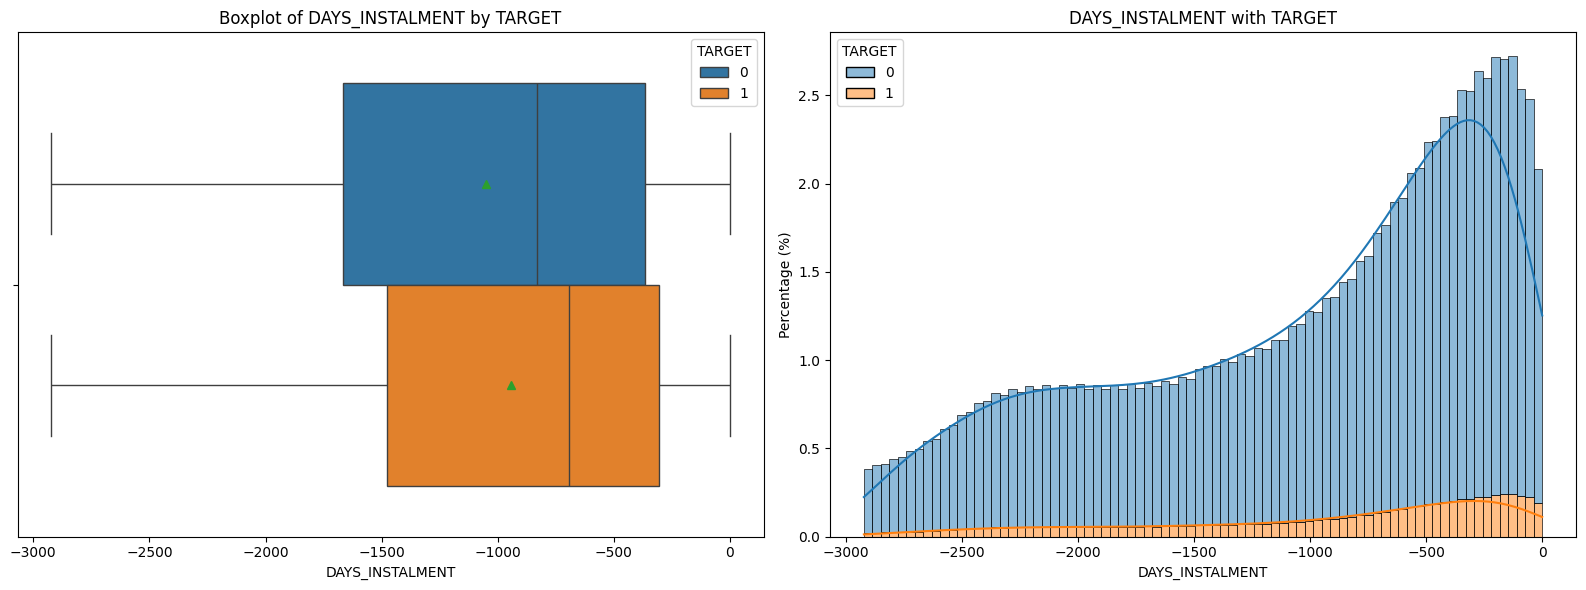

In [190]:
explore_numerical('DAYS_INSTALMENT', missing_installments, installments_payments_train)

Looking at the boxplot graphs, it seems that the middle 50% quartiles for the defaulting group are shifted slightly to the right (more recent installment dates) as compared to the non-defaulting group.

#### DAYS_ENTRY_PAYMENT

Exploring DAYS_ENTRY_PAYMENT
Missing number        2905.000000
Missing percentage       0.021352
Name: DAYS_ENTRY_PAYMENT, dtype: float64 



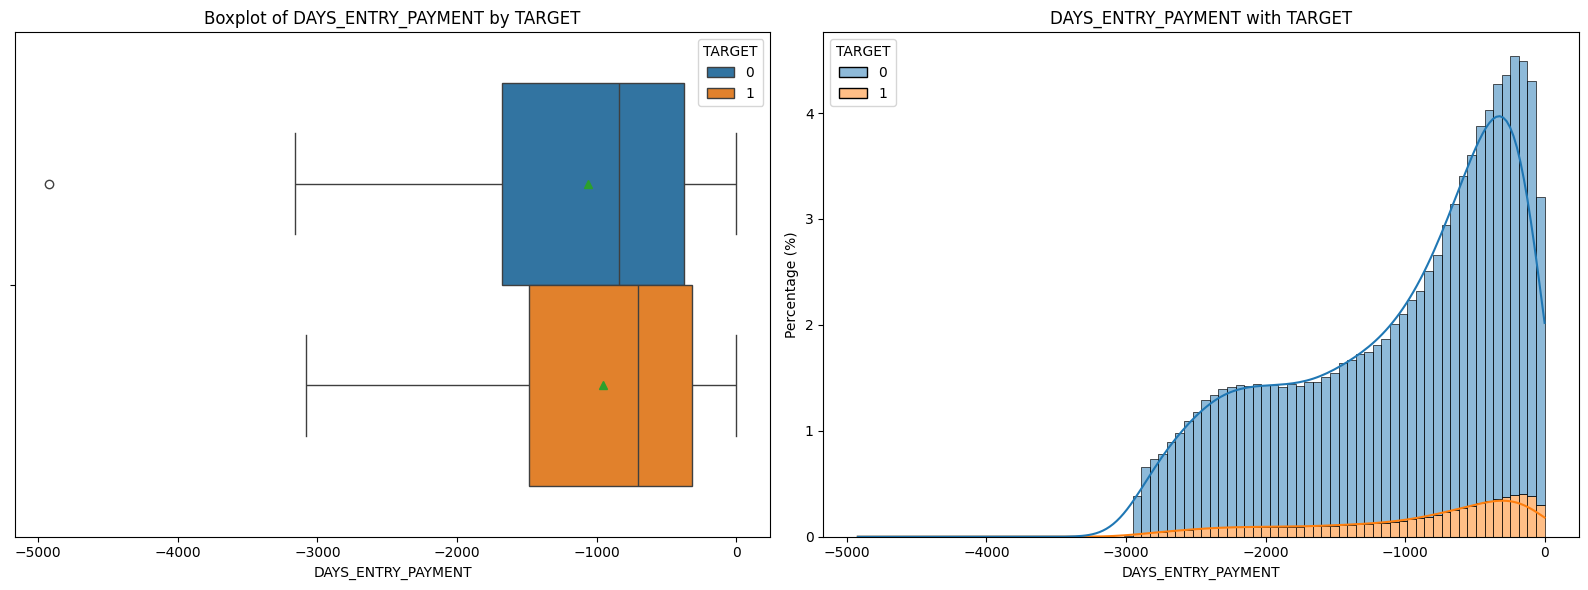

In [191]:
explore_numerical('DAYS_ENTRY_PAYMENT', missing_installments, installments_payments_train)

Clipping the one outlier: 

In [192]:
lower_limit = installments_payments_train['DAYS_ENTRY_PAYMENT'].quantile(0.0001)
installments_payments_train['DAYS_ENTRY_PAYMENT'] = installments_payments_train['DAYS_ENTRY_PAYMENT'].clip(lower=lower_limit)

Exploring DAYS_ENTRY_PAYMENT
Missing number        2905.000000
Missing percentage       0.021352
Name: DAYS_ENTRY_PAYMENT, dtype: float64 



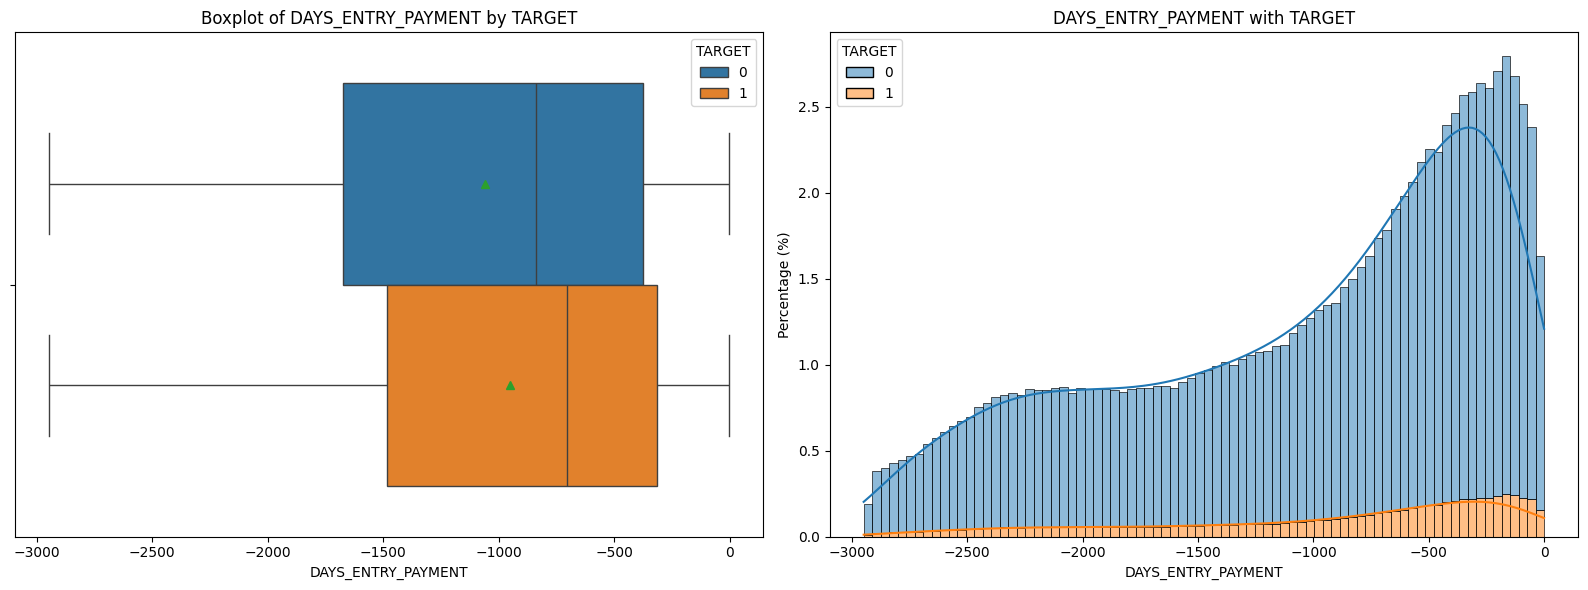

In [193]:
explore_numerical('DAYS_ENTRY_PAYMENT', missing_installments, installments_payments_train)

The same trend as with DAYS_INSTALMENT is noticed here, where the middle quartiles (25-75%) for the defaulting group are shifted slightly to the right (more recent dates for installment payments). 

#### AMT_INSTALMENT

Exploring AMT_INSTALMENT
No missing values


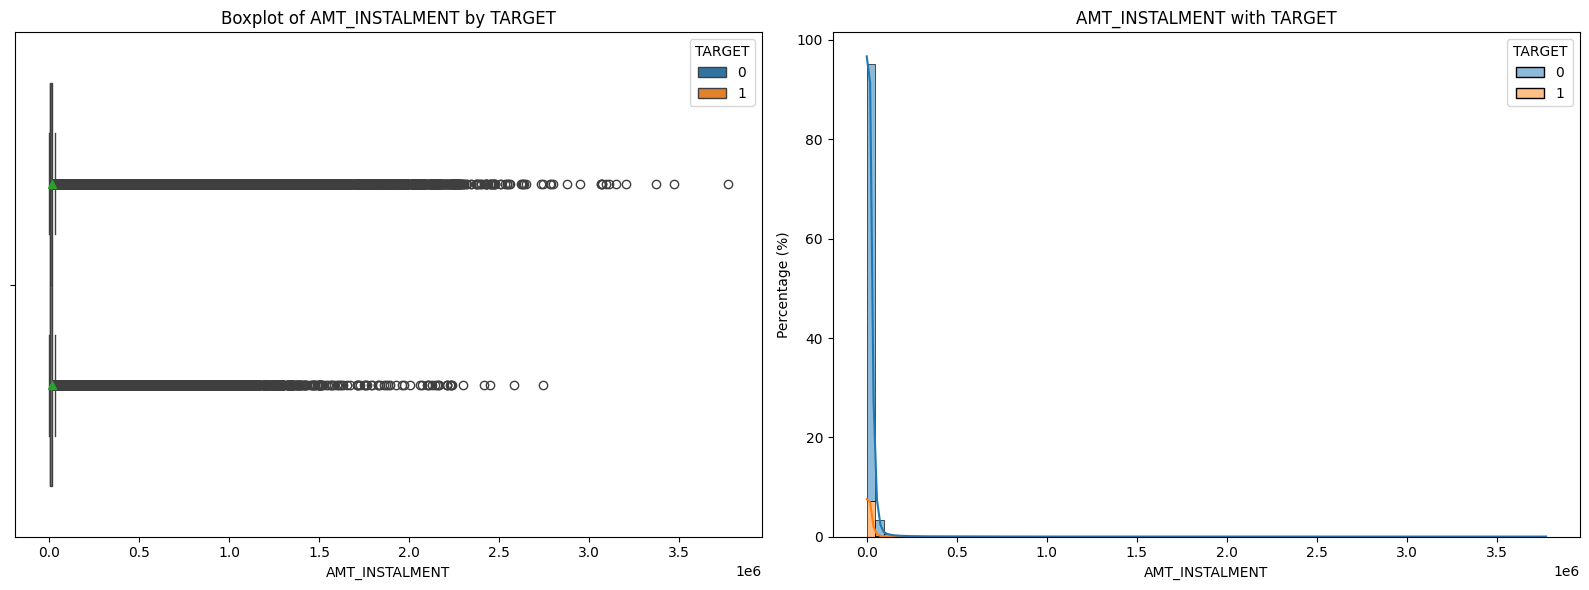

In [194]:
explore_numerical('AMT_INSTALMENT', missing_installments, installments_payments_train)

This distribution has many outliers with a long right tail. Taking the log of this variable gives: 

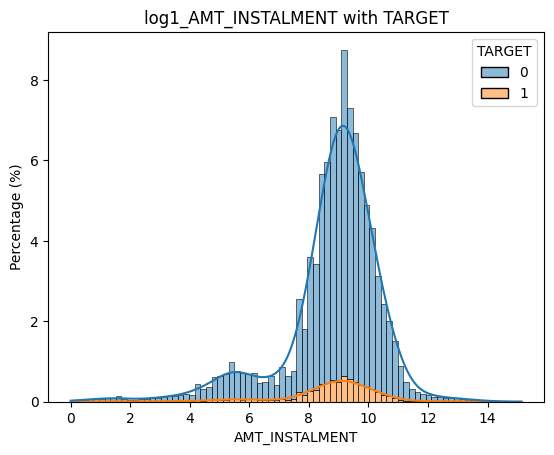

In [195]:
installments_payments_train['log1_AMT_INSTALMENT'] = np.log1p(installments_payments_train['AMT_INSTALMENT'])
plot_numerical(installments_payments_train, 'log1_AMT_INSTALMENT', 80, plt.gca(), 'AMT_INSTALMENT')

Now, the distribution seems slightly bimiodal, with a longer left tail for those who have not defaulted. 

Variables in this table are also generally skewed to the right, and no significant difference is seen between defaulting and non-defaulting customers. 